# Machine learning project

**Содержание**

1. [Definition](#definition)
2. [Анализ данных](#data_analysis)
3. [Функции для обработки данных](#functions)
4. [Визуализация данных и анализ](#visualization)
5. [Создание и применение модели](#models)
6. [Выводы](#conclusions)

## 1. Definition <a class='anchor' id='definition'>

### Метрики

В качестве метрики для прокта принята R2_score

### Выбор модели

После анализа Cat Boost был выбран в качестве основной модели для получения предсказаний

### Импорт модулей

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, RepeatedKFold

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
from random import randint, random

In [11]:
# garbage collector
import gc 

In [12]:
from catboost import CatBoostRegressor

In [13]:
import xgboost

## 2. Анализ данных <a class='anchor' id='data_analysis'>

Датасет, который был использован в данном проекте был взят по следующему адресу:
https://www.kaggle.com/c/realestatepriceprediction/data

Колонка Id может быть использована в качестве индекса при построении датафрэйма.

In [14]:
df = pd.read_csv("train.csv", index_col='Id' )
df_target = 'Price'

In [15]:
df.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

#### Признаки
- Id - идентификационный номер квартиры
- DistrictId - идентификационный номер района
- Rooms - количество комнат
- Square - площадь
- LifeSquare - жилая площадь
- KitchenSquare - площадь кухни
- Floor - этаж
- HouseFloor - количество этажей в доме
- HouseYear - год постройки дома
- Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
- Social_1, Social_2, Social_3 - социальные показатели местности
- Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
- Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
- Price - цена квартиры

In [16]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [17]:
df.shape

(10000, 19)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01
Social_1,10000.0,24.687000,17.532614,0.000000,6.000000,25.000000,36.000000,7.400000e+01


У большинства полей наблюдаются выбросы.

Распределение целевой переменной:

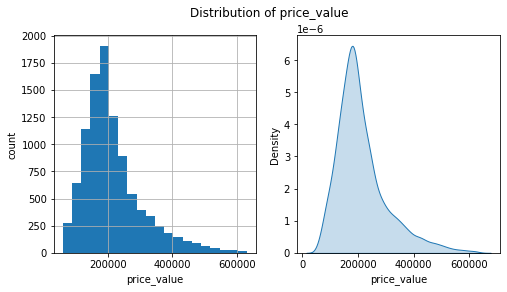

In [19]:
plt.figure(figsize = (8, 4))

plt.subplot(121)
df['Price'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('price_value')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('price_value')

plt.suptitle('Distribution of price_value')
plt.show()

In [20]:
df['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

Распределение целевой переменной по форме достаточно близко к нормальному, но со смещением.
Дополнительная обработка целевой переменной не требуется.

### Колонки с null 

In [21]:
df.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

'LifeSquare' and 'Healthcare_1' содержат null значения.

Процент null значений для 'LifeSquare' равен 21.13, для  Healthcare_1 равен 47.98.

#### Колонки с аномалиями и выбросами.

Kitchen Square или Life Square больше Square 

In [22]:
df[(df['KitchenSquare'] > df['Square']) | (df['LifeSquare'] > df['Square'])]['Square'].count()

486

Количество строк, где этаж квартиры больше, чем этаж дома.

In [23]:
df[df['Floor'] > df['HouseFloor']]['Floor'].count()

1825

#### Категориальные переменные

Категориальные переменные в текущем датасете:
- Ecology_2 
- Ecology_3
- Shops_2 

Также, потенциально, к категориальным переменным могут быть отнесены 'DistrictId', 'HouseFloor' и 'Floor'

In [24]:
df.select_dtypes(include=['object', 'category']).nunique()

Ecology_2    2
Ecology_3    2
Shops_2      2
dtype: int64

## 3. Функции для обработки данных <a class='anchor' id='functions'>

В данном разделе содержаться функции для обработки данных.

In [25]:
def evaluate_preds(true_values, pred_values, save=False):
    """Evaluation of model quality preds vs true"""
    
    print("R2:\t" + str(round(r2_score(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mean_squared_error(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mean_squared_error(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # line where true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [26]:
class Data_preprocessing():
    def __init__(self):
        # Treshold values.
        self.min_rooms_trsh = 1
        self.max_rooms_trsh = 5
        
        self.min_sq_trsh = 20
        self.max_sq_trsh = 300
        
        self.min_kitchen_trsh = 3        
        self.max_kitchen_trsh = 100
        
        self.min_ls_trsh = 5
        self.max_ls_trsh = 250
        
        self.extra_square = 3 #probably, betterr to exclude....
        
        #median values intializing
        self.kc_median = None
        self.ls_median = None
        self.yr_median = None
        self.hf_median = None
        self.rm_median = None
        
        #temporary dataframes for validation processing
        df_prices_district = None
        
        #functions that transforms dataset and add new data
    def median_calculation(self, dfr):
        """Function calculates median values and then these values can be used for gaps filling"""
        # all changes for dataframe in this function were made according to feature analysis in section 4
        # median values for dataframes. Median values will be used for data preprocessing and gaps filling.
        self.kc_median = dfr['KitchenSquare'].median()
        self.ls_median = dfr['LifeSquare'].median()
        self.yr_median = dfr['HouseYear'].median()
        self.hf_median = dfr['HouseFloor'].median()
        self.rm_median = dfr['Rooms'].median()
    
    
    def add_features(self, dfr):
        """Adds some new features"""
        # Average square per room in each appartment
        dfr = self.apprtmnt_amr_per_district(self, dfr)

        return dfr
    


    def data_clearing (self, dfr):
        """function is need to dataset processing and clearing of data"""  
        
        
        # Rooms
        dfr.loc[dfr['Rooms'] < self.min_rooms_trsh, 'Rooms'] = self.min_rooms_trsh
        dfr.loc[dfr['Rooms'] > self.max_rooms_trsh, 'Rooms'] = self.max_rooms_trsh 
        #self.rm_median #or can be set to 5? Change condition to 5 too?
        
        
        #General square
        dfr.loc[dfr['Square'] < self.min_sq_trsh, 'Square'] = self.min_sq_trsh
        dfr.loc[dfr['Square'] > self.max_sq_trsh, 'Square'] = self.max_sq_trsh 
        
        
        #life Square
        dfr = self.null_populating_ls(self,dfr)
        dfr.loc[dfr['LifeSquare'] < self.min_ls_trsh, 'LifeSquare'] = self.min_ls_trsh
        dfr.loc[dfr['LifeSquare'] > self.max_ls_trsh, 'LifeSquare'] = self.max_ls_trsh
        
        
    
        #Kitchen square
        dfr.loc[dfr['KitchenSquare'] < self.min_kitchen_trsh, 'KitchenSquare'] = self.min_kitchen_trsh
        dfr.loc[dfr['KitchenSquare'] > self.max_kitchen_trsh, 'KitchenSquare'] = self.min_kitchen_trsh #self.kc_median
        #dfr.loc[dfr['KitchenSquare'] > dfr['Square'], 'KitchenSquare'] = self.kc_median # ????????????????????????????
    
        
        #House Floor and Floor        
        dfr.loc[dfr['HouseFloor']==0, 'HouseFloor'] = dfr['Floor'] #or would be better to 1?
        dfr.loc[(dfr['Floor'] > dfr['HouseFloor']), 'Floor'] = round(dfr['HouseFloor'] * random(), 0)
    
        #House Year
        dfr.loc[dfr['HouseYear'] > 2021, 'HouseYear'] = self.yr_median
        
        
        #Healthcare_1
        dfr =  self.null_populating_hc(self, dfr)
    
        #district_id
        dfr = self.district_id_processing(self, dfr)
        
        
        return dfr
    
    
    @staticmethod
    def null_populating_ls(self, dfr, action = 'm'):
        """Fill null values for LifeSquare"""
        #LifeSquare
        #comparing_condition = ((dfr['LifeSquare'].isnull())) | (dfr['LifeSquare'] > (dfr['Square'] - dfr['KitchenSquare'])))
        #dfr.loc[comparing_condition, 'LifeSquare'] = \
        #dfr.loc[comparing_condition, 'Square'] - dfr.loc[comparing_condition, 'KitchenSquare'] - self.extra_square
        dfr['LifeSquare'] = dfr['LifeSquare'].fillna(self.ls_median)
        # or populating by median value for district id
        #Avg_life_sq_per_district = dfr.groupby(['DistrictId'], as_index = False).agg({'LifeSquare':'median'})
        
        
        return dfr
    
  

    @staticmethod
    def null_populating_hc(self, dfr, action = 'm'):
        """Function will populate null values for Healthcare_1 in dataframe based on accepted descision"""
        #Healthcare_1
        if 'Healthcare_1' in dfr.columns:
            if action == 'd':
                dfr = dfr.drop('Healthcare_1', axis = 1)
            elif action == 'm':
                healthcare_per_district = dfr.groupby(['DistrictId'], as_index = False).agg({'Healthcare_1':'median'})                
                healthcare_per_district = healthcare_per_district.rename(columns={'Healthcare_1':'hl_pd'})
                
                idx = dfr.index
                dfr = dfr.merge(healthcare_per_district, how = 'left', on='DistrictId')
                dfr = dfr.set_index(idx)
                
                #dfr['hl_pd'] = pd.to_numeric(dfr['hl_pd']downcast='float')
                
                #fill na if after merge we will have any gaps
                if dfr['Healthcare_1'].isnull().sum() != 0:
                    dfr['Healthcare_1'] = dfr.fillna(dfr['hl_pd'].median())
                    dfr['hl_pd'] = dfr.fillna(dfr['hl_pd'].median())
        
        dfr['Healthcare_1'] = dfr['Healthcare_1'].astype('int8')
        dfr['hl_pd'] = dfr['hl_pd'].astype('float32')
        return dfr

    


       
    @staticmethod
    def district_id_processing(self, dfr):
        """Function converts DistrictId to AvgPrice per district. In case of validation dataset uses Price 
            from train dataset.
        """
        if 'Price' in dfr.columns:
            self.df_prices_district = dfr[['Price', 'DistrictId']].copy()
            self.df_prices_district['Avg_Price_per_district'] = round(\
                                                         self.df_prices_district.groupby('DistrictId')['Price']\
                                                         .transform('mean'), 0)
            self.df_prices_district = self.df_prices_district.drop('Price', axis = 1)
            dfr = dfr.merge(self.df_prices_district['Avg_Price_per_district'], how = 'left', left_index=True, right_index=True)
            self.distric_price_median = self.df_prices_district['Avg_Price_per_district'].median()
                        
        else:
            df_prices_distinct = self.df_prices_district.drop_duplicates('DistrictId')
            idx = dfr.index
            dfr = dfr.merge(df_prices_distinct, how = 'left', on='DistrictId')
            dfr = dfr.set_index(idx)
            if dfr['Avg_Price_per_district'].isnull().sum() != 0:
                dfr = dfr.fillna(self.distric_price_median) #also other mothods like pad can be used
            
        
        return dfr
    
    @staticmethod
    def apprtmnt_amr_per_district(self, dfr):
        """Function calculates amount of flats for each district"""
        idx = dfr.index
        app_amt = dfr.groupby('DistrictId').agg({'DistrictId':'count'})
        app_amt = app_amt.rename(columns={'DistrictId': 'AppCount'}).astype('int')\
                                                        .reset_index()
        dfr = dfr.merge(app_amt, how='left', on='DistrictId')
        dfr = dfr.set_index(idx)
        
        if dfr['AppCount'].isnull().sum() != 0:
               dfr = dfr['AppCount'].fillna(dfr['AppCount'].median()) 
        return dfr
    


## 4. Визуализация данных и препроцессинг <a class='anchor' id='visualization'>

In [27]:
df_fill = df.copy()

In [28]:
df_num_features = df_fill.select_dtypes(include=['float64', 'float32', 'float16', 'int64', 'int32', 'int16', 'int8'])
df_num_features.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644


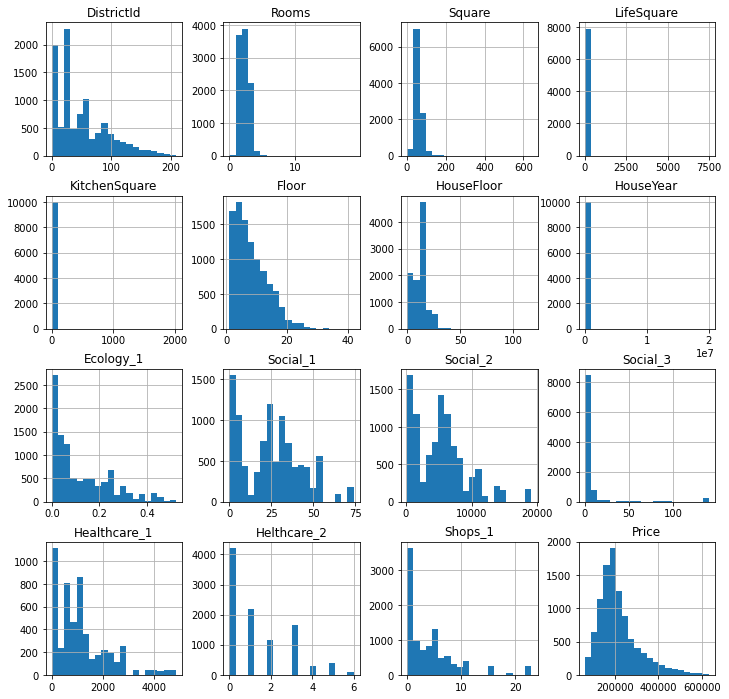

In [29]:
df_num_features.hist(figsize=(12,12), bins=20, grid=True);

### Обработка признаков

**Rooms**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


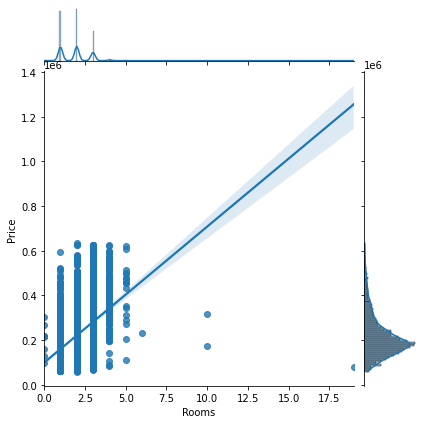

In [30]:
grid = sns.jointplot(df_fill['Rooms'], df_fill['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


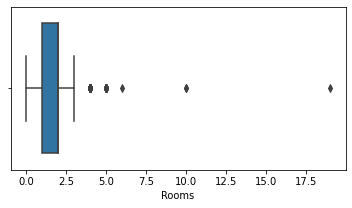

In [31]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['Rooms'])
plt.xlabel('Rooms')
plt.show()

In [32]:
df_fill['Rooms'].describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

In [33]:
df_fill['Rooms'].value_counts().sort_values()

6.0        1
19.0       1
10.0       2
0.0        8
5.0       18
4.0      150
3.0     2235
1.0     3705
2.0     3880
Name: Rooms, dtype: int64

Все параметрыдля комнат, которые эквивалентны 0 будут изменены на 1

Обработка выбросов
   - Все величины меньшие 1 будут преобразованы в 1
   - Все величины больште 5 или 6 будут конвертированы.

**Square**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


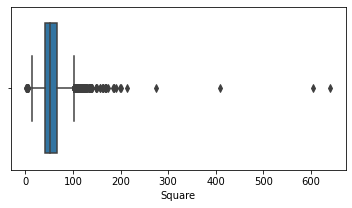

In [34]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['Square'])
plt.xlabel('Square')
plt.show()

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


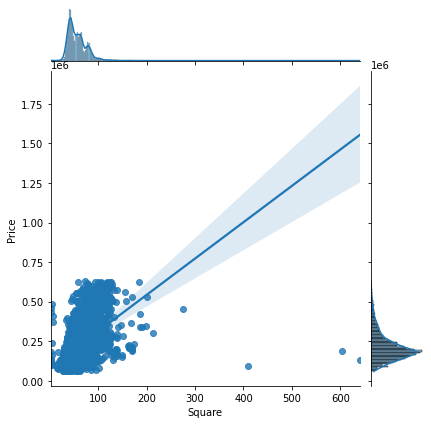

In [35]:
grid = sns.jointplot(df_num_features['Square'], df_num_features['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

In [36]:
df_num_features[df_num_features['Square'] < 20].count()

DistrictId       21
Rooms            21
Square           21
LifeSquare       20
KitchenSquare    21
Floor            21
HouseFloor       21
HouseYear        21
Ecology_1        21
Social_1         21
Social_2         21
Social_3         21
Healthcare_1     10
Helthcare_2      21
Shops_1          21
Price            21
dtype: int64

**Life square**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


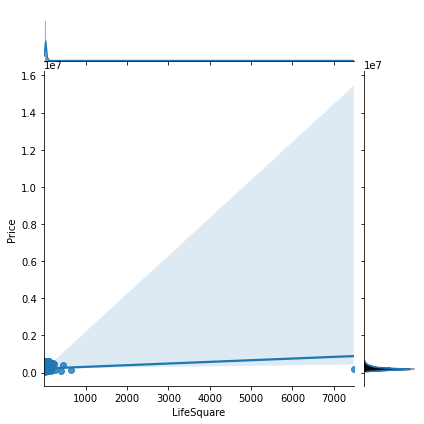

In [37]:
grid = sns.jointplot(df_num_features['LifeSquare'], df_num_features['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


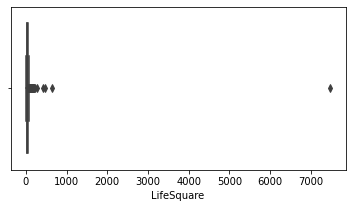

In [38]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_num_features['LifeSquare'])
plt.xlabel('LifeSquare')
plt.show()

In [39]:
df_num_features = df_num_features[df_num_features['LifeSquare'] < 250]

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


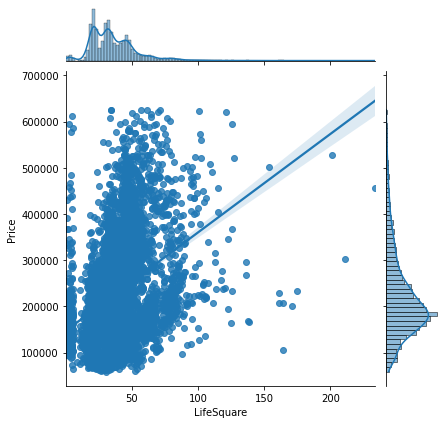

In [40]:
grid = sns.jointplot(df_num_features['LifeSquare'], df_num_features['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


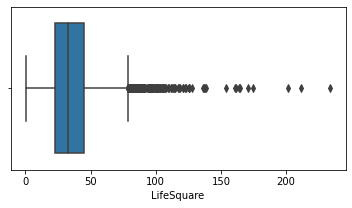

In [41]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_num_features['LifeSquare'])
plt.xlabel('LifeSquare')
plt.show()

In [42]:
df_num_features[df_num_features['LifeSquare'] < 5].count()

DistrictId       162
Rooms            162
Square           162
LifeSquare       162
KitchenSquare    162
Floor            162
HouseFloor       162
HouseYear        162
Ecology_1        162
Social_1         162
Social_2         162
Social_3         162
Healthcare_1      76
Helthcare_2      162
Shops_1          162
Price            162
dtype: int64

In [43]:
df_fill['LifeSquare'].isnull().sum()

2113

In [44]:
df_fill[df_fill['LifeSquare'] > df_fill['Square']]['LifeSquare'].count()

482

In [45]:
df_fill[df_fill['LifeSquare'] == 0]['LifeSquare'].count()

0

Обработка выбросов:
- Если LifeSquare = NaN или LifeSquare > Square, тогда LifeSquare будет изменена на медианные значения.

**Kitchen Square**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


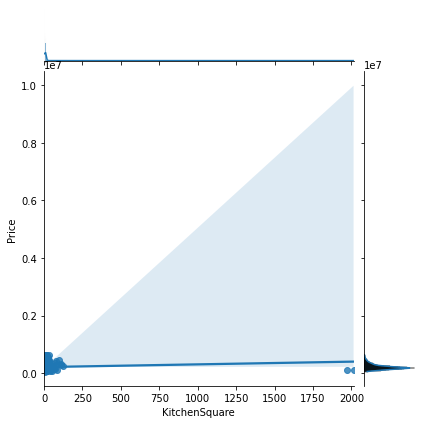

In [46]:
grid = sns.jointplot(df_fill['KitchenSquare'], df_fill['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


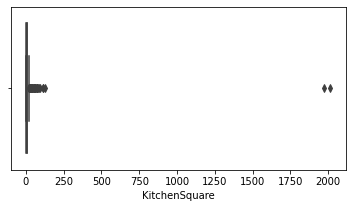

In [47]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['KitchenSquare'])
plt.xlabel('KitchenSquare')
plt.show()

In [48]:
# df_fill['KitchenSquare'].value_counts().sort_values()
df_fill['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [49]:
df_fill[(df['KitchenSquare'] > 80)]['KitchenSquare'].count()

7

In [50]:
df_fill[(df['KitchenSquare'] > df_fill['LifeSquare'])]['KitchenSquare'].count()

23

Обработка выбросов:
- если Kitchen square > 100 она будет преобразована в медианное значение
- если Kitchen square < 3 будет преобразована в 3
- если Kitchen square > general square она будет преобразорвана

**Floor and house floor**

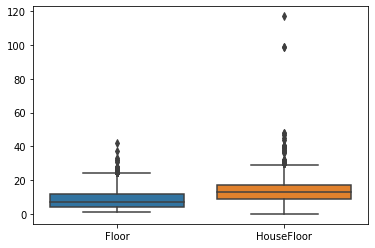

In [51]:
ax = sns.boxplot(data = df_fill[['Floor', 'HouseFloor']]                )
plt.show()

In [52]:
df_fill[df_fill['Floor'] == 0]['Floor'].count()

0

In [53]:
df_fill[df_fill['HouseFloor'] == 0]['HouseFloor'].count()

269

In [54]:
df_fill[(df_fill['HouseFloor'] < df_fill['Floor']) ]['Floor'].count()

1825

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


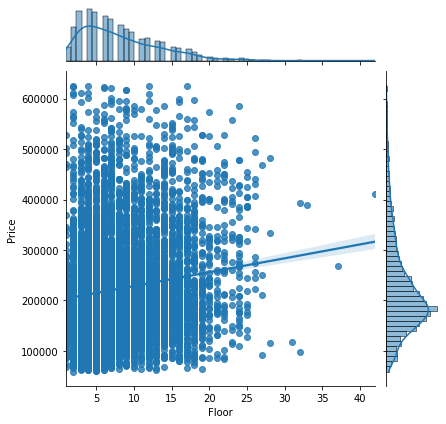

In [55]:
grid = sns.jointplot(df_num_features['Floor'], df_num_features['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

In [56]:
df_num_features['Floor'][df_num_features['Floor'] == 0].count()

0

In [57]:
df_num_features['HouseFloor'][df_num_features['HouseFloor'] == 0].count()

54

In [58]:
df_num_features['HouseFloor'][df_num_features['Floor'] > df_num_features['HouseFloor']].count()

1208

Resolvong of outliers:
- if HouseFloor == 0, value will be changed to Floor (or to median value of whole dataset - optional to be compared with result score)
- if Floor > HouseFloor, value will be changed to HouseFloor

**HouseYear**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


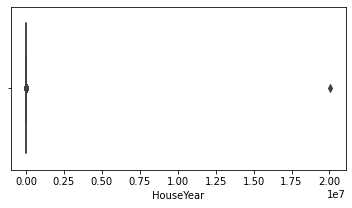

In [59]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['HouseYear'])
plt.xlabel('HouseYear')
plt.show()

In [60]:
df_fill[df_fill['HouseYear'] == 0]['HouseYear'].count()

0

In [61]:
df_fill[df_fill['HouseYear'] < 1900]['HouseYear'].count()

0

In [62]:
df_fill[df_fill['HouseYear'] > 2021]['HouseYear'].count()

2

Resolvong of outliers:
- if year > 2021 it will be changed to median year

**Healthcare_1**

Due to big amount of NaN values in Healthcare_1 column, it can be dropped

In [63]:
df_fill.shape

(10000, 19)

In [64]:
df_fill.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Сохранение датафрэйма в пикл файл.

In [65]:
df_fill.to_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill.pkl")

In [66]:
#df_fill = pd.read_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill.pkl")

### Обработка категориальных значений

В изначальном датасете содержатся три категориальных величины:
- Ecology_2
- Ecology_3
- Shops_2

Каждая из колонок имеет два возможных значения.

In [67]:
df_cat_features = df_fill.select_dtypes(include=['object', 'category'])

In [68]:
df_cat_features.head()

,Ecology_2,Ecology_3,Shops_2
Id,,,
14038,B,B,B
15053,B,B,B
4765,B,B,B
5809,B,B,B
10783,B,B,B


<ipython-input-69-e8200df81e79>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


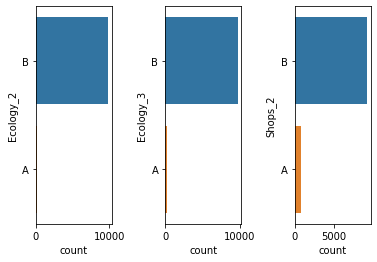

In [69]:
fig, ax =plt.subplots(1,3)
fig.subplots_adjust(wspace=0.7, hspace=0.7)
sns.countplot(y = 'Ecology_2',data = df_cat_features, ax=ax[0])
sns.countplot(y = 'Ecology_3',data = df_cat_features, ax=ax[1])
sns.countplot(y = 'Shops_2',data = df_cat_features, ax=ax[2])
fig.show()

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


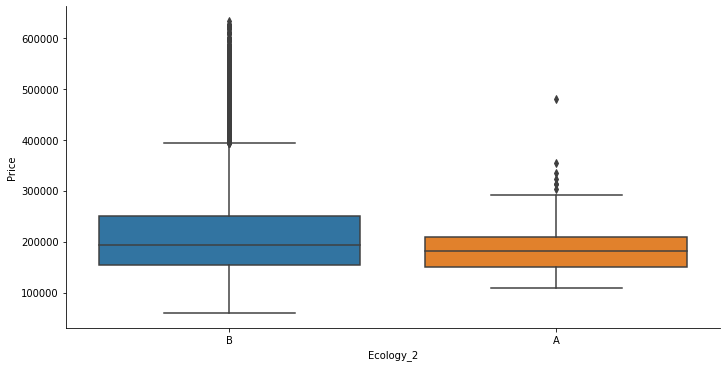

In [70]:
sns.catplot('Ecology_2', 'Price', kind="box", data=df_fill, aspect=2/1);

In [71]:
df_cat_features['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

Категориальные величины будут конвертированы в числовые используя get_dummies метод.


In [72]:
df_fill.to_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill_processed.pkl")

In [86]:
df_fill = pd.read_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill_processed.pkl")

# 5. Создание и применение моделей <a class='anchor' id='models'>

Обработка тренировочного датасета

In [87]:
dp = Data_preprocessing()

In [88]:
dp.median_calculation(df_fill)

In [89]:
df_fill = dp.data_clearing(df_fill)

In [90]:
df_fill = dp.add_features(df_fill)

In [91]:
df_fill.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,hl_pd,Avg_Price_per_district,AppCount
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,B,...,7976,5,35,0,11,B,184966.930730,35.0,219720.0,22
15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,B,...,10309,1,41,1,16,B,300009.450063,41.0,225919.0,87
4765,53,2.0,44.947953,29.197612,3.0,8.0,12.0,1968.0,0.049637,B,...,7759,0,53,1,3,B,220925.908524,53.0,255736.0,174
5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,B,...,5735,3,58,0,5,B,175616.227217,58.0,162287.0,179
10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,B,...,5776,1,99,2,4,B,150226.531644,99.0,184157.0,97


In [92]:
df_fill = df_fill.drop('DistrictId', axis = 1)

In [93]:
df_fill = df_fill.drop('hl_pd', axis = 1)

In [94]:
df_fill = pd.get_dummies(df_fill, columns = df_cat_features.columns)

In [95]:
df_fill.shape

(10000, 23)

**Импорт и обработка проверочного датасета**

In [100]:
df_real_cb = pd.read_csv("test.csv", index_col='Id')

In [101]:
df_real_cb = dp.data_clearing (df_real_cb)

In [102]:
df_real_cb = dp.add_features(df_real_cb)

In [103]:
df_real_cb = df_real_cb.drop('DistrictId', axis = 1)

In [104]:
df_real_cb = df_real_cb.drop('hl_pd', axis = 1)

In [105]:
df_real_cb = pd.get_dummies(df_real_cb, columns = df_cat_features.columns)

In [106]:
df_real_cb.shape

(5000, 22)

## CatBoost

**Подготовка тернировочного датасета**

In [96]:
X_cb = df_fill.copy()

In [97]:
y_cb = X_cb['Price']

In [98]:
X_cb = X_cb.drop('Price', axis = 1)

In [107]:
X_cb.columns == df_real_cb.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

**Выбор параметров дл я применения в модели**

In [109]:
model_cb = CatBoostRegressor(iterations = 1190
                             , depth = 8
                             , learning_rate = 0.1                             
                             , eval_metric = 'R2')

In [108]:
k_fold = KFold(n_splits=5
               , random_state=42
               , shuffle=True)

In [110]:
cv_score = cross_val_score(model_cb, X_cb, y_cb, scoring='r2', cv=k_fold, verbose = 0)

0:	learn: 0.1202107	total: 160ms	remaining: 3m 9s
1:	learn: 0.2177546	total: 169ms	remaining: 1m 40s
2:	learn: 0.3013688	total: 176ms	remaining: 1m 9s
3:	learn: 0.3691429	total: 183ms	remaining: 54.1s
4:	learn: 0.4243079	total: 189ms	remaining: 44.8s
5:	learn: 0.4743510	total: 195ms	remaining: 38.5s
6:	learn: 0.5149345	total: 201ms	remaining: 34s
7:	learn: 0.5487848	total: 208ms	remaining: 30.7s
8:	learn: 0.5784202	total: 215ms	remaining: 28.2s
9:	learn: 0.6024088	total: 221ms	remaining: 26.1s
10:	learn: 0.6239353	total: 227ms	remaining: 24.3s
11:	learn: 0.6421773	total: 234ms	remaining: 22.9s
12:	learn: 0.6577135	total: 240ms	remaining: 21.7s
13:	learn: 0.6726527	total: 246ms	remaining: 20.7s
14:	learn: 0.6852159	total: 252ms	remaining: 19.7s
15:	learn: 0.6962710	total: 258ms	remaining: 18.9s
16:	learn: 0.7048592	total: 264ms	remaining: 18.2s
17:	learn: 0.7132506	total: 270ms	remaining: 17.6s
18:	learn: 0.7196730	total: 277ms	remaining: 17.1s
19:	learn: 0.7265314	total: 283ms	remainin

187:	learn: 0.8744611	total: 1.43s	remaining: 7.6s
188:	learn: 0.8747494	total: 1.43s	remaining: 7.59s
189:	learn: 0.8752318	total: 1.44s	remaining: 7.59s
190:	learn: 0.8754367	total: 1.45s	remaining: 7.58s
191:	learn: 0.8756693	total: 1.46s	remaining: 7.57s
192:	learn: 0.8762323	total: 1.46s	remaining: 7.55s
193:	learn: 0.8765699	total: 1.47s	remaining: 7.54s
194:	learn: 0.8767674	total: 1.48s	remaining: 7.53s
195:	learn: 0.8771956	total: 1.48s	remaining: 7.51s
196:	learn: 0.8775587	total: 1.49s	remaining: 7.5s
197:	learn: 0.8778081	total: 1.49s	remaining: 7.49s
198:	learn: 0.8780437	total: 1.5s	remaining: 7.47s
199:	learn: 0.8784755	total: 1.51s	remaining: 7.46s
200:	learn: 0.8785760	total: 1.51s	remaining: 7.44s
201:	learn: 0.8789194	total: 1.52s	remaining: 7.43s
202:	learn: 0.8792859	total: 1.52s	remaining: 7.42s
203:	learn: 0.8797639	total: 1.53s	remaining: 7.4s
204:	learn: 0.8800307	total: 1.54s	remaining: 7.38s
205:	learn: 0.8803609	total: 1.54s	remaining: 7.37s
206:	learn: 0.88

350:	learn: 0.9149207	total: 2.5s	remaining: 5.99s
351:	learn: 0.9150420	total: 2.51s	remaining: 5.98s
352:	learn: 0.9151318	total: 2.52s	remaining: 5.98s
353:	learn: 0.9153276	total: 2.53s	remaining: 5.97s
354:	learn: 0.9153925	total: 2.54s	remaining: 5.96s
355:	learn: 0.9155454	total: 2.54s	remaining: 5.96s
356:	learn: 0.9157879	total: 2.55s	remaining: 5.95s
357:	learn: 0.9161257	total: 2.56s	remaining: 5.94s
358:	learn: 0.9161672	total: 2.56s	remaining: 5.93s
359:	learn: 0.9163382	total: 2.57s	remaining: 5.92s
360:	learn: 0.9164755	total: 2.58s	remaining: 5.91s
361:	learn: 0.9166435	total: 2.58s	remaining: 5.9s
362:	learn: 0.9167146	total: 2.59s	remaining: 5.89s
363:	learn: 0.9170105	total: 2.59s	remaining: 5.89s
364:	learn: 0.9170725	total: 2.6s	remaining: 5.88s
365:	learn: 0.9172605	total: 2.61s	remaining: 5.87s
366:	learn: 0.9174130	total: 2.61s	remaining: 5.86s
367:	learn: 0.9175296	total: 2.62s	remaining: 5.85s
368:	learn: 0.9176398	total: 2.63s	remaining: 5.84s
369:	learn: 0.9

516:	learn: 0.9374627	total: 3.6s	remaining: 4.68s
517:	learn: 0.9375605	total: 3.6s	remaining: 4.68s
518:	learn: 0.9377550	total: 3.61s	remaining: 4.67s
519:	learn: 0.9378131	total: 3.62s	remaining: 4.66s
520:	learn: 0.9379764	total: 3.63s	remaining: 4.66s
521:	learn: 0.9381463	total: 3.63s	remaining: 4.65s
522:	learn: 0.9381805	total: 3.64s	remaining: 4.64s
523:	learn: 0.9383598	total: 3.65s	remaining: 4.63s
524:	learn: 0.9384984	total: 3.65s	remaining: 4.63s
525:	learn: 0.9386570	total: 3.66s	remaining: 4.62s
526:	learn: 0.9387444	total: 3.67s	remaining: 4.61s
527:	learn: 0.9388706	total: 3.67s	remaining: 4.6s
528:	learn: 0.9389477	total: 3.68s	remaining: 4.6s
529:	learn: 0.9390691	total: 3.69s	remaining: 4.59s
530:	learn: 0.9392348	total: 3.69s	remaining: 4.58s
531:	learn: 0.9394191	total: 3.7s	remaining: 4.58s
532:	learn: 0.9395138	total: 3.71s	remaining: 4.57s
533:	learn: 0.9395714	total: 3.71s	remaining: 4.56s
534:	learn: 0.9396995	total: 3.72s	remaining: 4.55s
535:	learn: 0.939

681:	learn: 0.9520635	total: 4.68s	remaining: 3.48s
682:	learn: 0.9521494	total: 4.69s	remaining: 3.48s
683:	learn: 0.9522130	total: 4.7s	remaining: 3.47s
684:	learn: 0.9522394	total: 4.7s	remaining: 3.47s
685:	learn: 0.9523550	total: 4.71s	remaining: 3.46s
686:	learn: 0.9524351	total: 4.72s	remaining: 3.45s
687:	learn: 0.9525088	total: 4.72s	remaining: 3.44s
688:	learn: 0.9525557	total: 4.73s	remaining: 3.44s
689:	learn: 0.9525811	total: 4.74s	remaining: 3.43s
690:	learn: 0.9527287	total: 4.74s	remaining: 3.42s
691:	learn: 0.9527492	total: 4.75s	remaining: 3.42s
692:	learn: 0.9528073	total: 4.75s	remaining: 3.41s
693:	learn: 0.9528530	total: 4.76s	remaining: 3.4s
694:	learn: 0.9529860	total: 4.77s	remaining: 3.4s
695:	learn: 0.9530702	total: 4.77s	remaining: 3.39s
696:	learn: 0.9531290	total: 4.78s	remaining: 3.38s
697:	learn: 0.9531842	total: 4.79s	remaining: 3.37s
698:	learn: 0.9532052	total: 4.79s	remaining: 3.37s
699:	learn: 0.9533029	total: 4.8s	remaining: 3.36s
700:	learn: 0.953

851:	learn: 0.9622404	total: 5.79s	remaining: 2.3s
852:	learn: 0.9622851	total: 5.8s	remaining: 2.29s
853:	learn: 0.9622970	total: 5.81s	remaining: 2.28s
854:	learn: 0.9623229	total: 5.81s	remaining: 2.28s
855:	learn: 0.9623674	total: 5.82s	remaining: 2.27s
856:	learn: 0.9623994	total: 5.83s	remaining: 2.26s
857:	learn: 0.9624436	total: 5.83s	remaining: 2.26s
858:	learn: 0.9624581	total: 5.84s	remaining: 2.25s
859:	learn: 0.9625009	total: 5.84s	remaining: 2.24s
860:	learn: 0.9625255	total: 5.85s	remaining: 2.24s
861:	learn: 0.9625834	total: 5.86s	remaining: 2.23s
862:	learn: 0.9626171	total: 5.86s	remaining: 2.22s
863:	learn: 0.9626859	total: 5.87s	remaining: 2.21s
864:	learn: 0.9627062	total: 5.88s	remaining: 2.21s
865:	learn: 0.9627363	total: 5.88s	remaining: 2.2s
866:	learn: 0.9627574	total: 5.89s	remaining: 2.19s
867:	learn: 0.9628309	total: 5.89s	remaining: 2.19s
868:	learn: 0.9628732	total: 5.9s	remaining: 2.18s
869:	learn: 0.9629100	total: 5.91s	remaining: 2.17s
870:	learn: 0.96

1016:	learn: 0.9695961	total: 6.87s	remaining: 1.17s
1017:	learn: 0.9696064	total: 6.88s	remaining: 1.16s
1018:	learn: 0.9696519	total: 6.89s	remaining: 1.16s
1019:	learn: 0.9696968	total: 6.9s	remaining: 1.15s
1020:	learn: 0.9697369	total: 6.9s	remaining: 1.14s
1021:	learn: 0.9697654	total: 6.91s	remaining: 1.14s
1022:	learn: 0.9697907	total: 6.92s	remaining: 1.13s
1023:	learn: 0.9698107	total: 6.92s	remaining: 1.12s
1024:	learn: 0.9698397	total: 6.93s	remaining: 1.11s
1025:	learn: 0.9698896	total: 6.93s	remaining: 1.11s
1026:	learn: 0.9699073	total: 6.94s	remaining: 1.1s
1027:	learn: 0.9699327	total: 6.95s	remaining: 1.09s
1028:	learn: 0.9699628	total: 6.96s	remaining: 1.09s
1029:	learn: 0.9700024	total: 6.96s	remaining: 1.08s
1030:	learn: 0.9700705	total: 6.97s	remaining: 1.07s
1031:	learn: 0.9701283	total: 6.97s	remaining: 1.07s
1032:	learn: 0.9701823	total: 6.98s	remaining: 1.06s
1033:	learn: 0.9702063	total: 6.99s	remaining: 1.05s
1034:	learn: 0.9702519	total: 6.99s	remaining: 1.

1181:	learn: 0.9747525	total: 7.95s	remaining: 53.8ms
1182:	learn: 0.9747701	total: 7.95s	remaining: 47.1ms
1183:	learn: 0.9747980	total: 7.96s	remaining: 40.4ms
1184:	learn: 0.9748074	total: 7.97s	remaining: 33.6ms
1185:	learn: 0.9748345	total: 7.98s	remaining: 26.9ms
1186:	learn: 0.9748930	total: 7.98s	remaining: 20.2ms
1187:	learn: 0.9749516	total: 7.99s	remaining: 13.4ms
1188:	learn: 0.9749855	total: 8s	remaining: 6.73ms
1189:	learn: 0.9750151	total: 8s	remaining: 0us
0:	learn: 0.1184490	total: 7.13ms	remaining: 8.47s
1:	learn: 0.2141713	total: 13.4ms	remaining: 7.96s
2:	learn: 0.2996030	total: 19.7ms	remaining: 7.8s
3:	learn: 0.3701015	total: 25.8ms	remaining: 7.64s
4:	learn: 0.4280647	total: 32.5ms	remaining: 7.71s
5:	learn: 0.4738207	total: 38.9ms	remaining: 7.68s
6:	learn: 0.5118894	total: 45.5ms	remaining: 7.7s
7:	learn: 0.5454293	total: 52.5ms	remaining: 7.76s
8:	learn: 0.5760797	total: 58.8ms	remaining: 7.71s
9:	learn: 0.6015465	total: 67.6ms	remaining: 7.97s
10:	learn: 0.62

163:	learn: 0.8663491	total: 1.09s	remaining: 6.84s
164:	learn: 0.8669487	total: 1.1s	remaining: 6.85s
165:	learn: 0.8672171	total: 1.11s	remaining: 6.85s
166:	learn: 0.8680112	total: 1.12s	remaining: 6.85s
167:	learn: 0.8681460	total: 1.12s	remaining: 6.84s
168:	learn: 0.8684099	total: 1.13s	remaining: 6.83s
169:	learn: 0.8689551	total: 1.14s	remaining: 6.83s
170:	learn: 0.8693741	total: 1.14s	remaining: 6.82s
171:	learn: 0.8699625	total: 1.15s	remaining: 6.81s
172:	learn: 0.8703061	total: 1.16s	remaining: 6.8s
173:	learn: 0.8706999	total: 1.16s	remaining: 6.79s
174:	learn: 0.8709681	total: 1.17s	remaining: 6.79s
175:	learn: 0.8713982	total: 1.18s	remaining: 6.77s
176:	learn: 0.8720263	total: 1.18s	remaining: 6.76s
177:	learn: 0.8724532	total: 1.19s	remaining: 6.75s
178:	learn: 0.8730471	total: 1.19s	remaining: 6.75s
179:	learn: 0.8735868	total: 1.2s	remaining: 6.75s
180:	learn: 0.8738426	total: 1.21s	remaining: 6.74s
181:	learn: 0.8741267	total: 1.21s	remaining: 6.73s
182:	learn: 0.8

328:	learn: 0.9126875	total: 2.17s	remaining: 5.68s
329:	learn: 0.9129794	total: 2.18s	remaining: 5.68s
330:	learn: 0.9131971	total: 2.19s	remaining: 5.67s
331:	learn: 0.9133964	total: 2.19s	remaining: 5.67s
332:	learn: 0.9136321	total: 2.2s	remaining: 5.67s
333:	learn: 0.9137805	total: 2.21s	remaining: 5.66s
334:	learn: 0.9139030	total: 2.21s	remaining: 5.65s
335:	learn: 0.9140569	total: 2.22s	remaining: 5.64s
336:	learn: 0.9141518	total: 2.23s	remaining: 5.64s
337:	learn: 0.9144914	total: 2.23s	remaining: 5.63s
338:	learn: 0.9146765	total: 2.24s	remaining: 5.62s
339:	learn: 0.9148618	total: 2.25s	remaining: 5.61s
340:	learn: 0.9149542	total: 2.25s	remaining: 5.6s
341:	learn: 0.9152393	total: 2.26s	remaining: 5.6s
342:	learn: 0.9154042	total: 2.26s	remaining: 5.59s
343:	learn: 0.9154857	total: 2.27s	remaining: 5.58s
344:	learn: 0.9155159	total: 2.27s	remaining: 5.57s
345:	learn: 0.9156601	total: 2.28s	remaining: 5.57s
346:	learn: 0.9156822	total: 2.29s	remaining: 5.56s
347:	learn: 0.9

494:	learn: 0.9366044	total: 3.25s	remaining: 4.56s
495:	learn: 0.9367940	total: 3.26s	remaining: 4.56s
496:	learn: 0.9369252	total: 3.27s	remaining: 4.55s
497:	learn: 0.9370048	total: 3.27s	remaining: 4.55s
498:	learn: 0.9371103	total: 3.28s	remaining: 4.54s
499:	learn: 0.9371462	total: 3.29s	remaining: 4.54s
500:	learn: 0.9371935	total: 3.29s	remaining: 4.53s
501:	learn: 0.9373048	total: 3.3s	remaining: 4.52s
502:	learn: 0.9374110	total: 3.31s	remaining: 4.51s
503:	learn: 0.9374797	total: 3.31s	remaining: 4.51s
504:	learn: 0.9376038	total: 3.32s	remaining: 4.5s
505:	learn: 0.9377477	total: 3.32s	remaining: 4.49s
506:	learn: 0.9377865	total: 3.33s	remaining: 4.49s
507:	learn: 0.9378783	total: 3.34s	remaining: 4.48s
508:	learn: 0.9380475	total: 3.34s	remaining: 4.47s
509:	learn: 0.9381106	total: 3.35s	remaining: 4.46s
510:	learn: 0.9381664	total: 3.35s	remaining: 4.46s
511:	learn: 0.9382774	total: 3.36s	remaining: 4.45s
512:	learn: 0.9383756	total: 3.37s	remaining: 4.44s
513:	learn: 0.

661:	learn: 0.9519162	total: 4.34s	remaining: 3.46s
662:	learn: 0.9520161	total: 4.34s	remaining: 3.45s
663:	learn: 0.9520547	total: 4.35s	remaining: 3.45s
664:	learn: 0.9521241	total: 4.36s	remaining: 3.44s
665:	learn: 0.9522355	total: 4.37s	remaining: 3.44s
666:	learn: 0.9522942	total: 4.37s	remaining: 3.43s
667:	learn: 0.9524206	total: 4.38s	remaining: 3.42s
668:	learn: 0.9524739	total: 4.38s	remaining: 3.42s
669:	learn: 0.9525092	total: 4.39s	remaining: 3.41s
670:	learn: 0.9526031	total: 4.4s	remaining: 3.4s
671:	learn: 0.9526966	total: 4.4s	remaining: 3.39s
672:	learn: 0.9527698	total: 4.41s	remaining: 3.39s
673:	learn: 0.9528581	total: 4.42s	remaining: 3.38s
674:	learn: 0.9529133	total: 4.42s	remaining: 3.37s
675:	learn: 0.9530124	total: 4.43s	remaining: 3.37s
676:	learn: 0.9530840	total: 4.43s	remaining: 3.36s
677:	learn: 0.9531486	total: 4.44s	remaining: 3.35s
678:	learn: 0.9531897	total: 4.45s	remaining: 3.35s
679:	learn: 0.9532472	total: 4.45s	remaining: 3.34s
680:	learn: 0.9

828:	learn: 0.9627123	total: 5.42s	remaining: 2.36s
829:	learn: 0.9627670	total: 5.43s	remaining: 2.36s
830:	learn: 0.9627858	total: 5.44s	remaining: 2.35s
831:	learn: 0.9628402	total: 5.45s	remaining: 2.34s
832:	learn: 0.9629169	total: 5.46s	remaining: 2.34s
833:	learn: 0.9629576	total: 5.46s	remaining: 2.33s
834:	learn: 0.9629997	total: 5.47s	remaining: 2.33s
835:	learn: 0.9630336	total: 5.47s	remaining: 2.32s
836:	learn: 0.9630788	total: 5.48s	remaining: 2.31s
837:	learn: 0.9631376	total: 5.49s	remaining: 2.31s
838:	learn: 0.9631698	total: 5.49s	remaining: 2.3s
839:	learn: 0.9632369	total: 5.5s	remaining: 2.29s
840:	learn: 0.9632683	total: 5.51s	remaining: 2.29s
841:	learn: 0.9632865	total: 5.51s	remaining: 2.28s
842:	learn: 0.9633209	total: 5.52s	remaining: 2.27s
843:	learn: 0.9633894	total: 5.53s	remaining: 2.27s
844:	learn: 0.9634361	total: 5.53s	remaining: 2.26s
845:	learn: 0.9634998	total: 5.54s	remaining: 2.25s
846:	learn: 0.9635467	total: 5.55s	remaining: 2.25s
847:	learn: 0.

994:	learn: 0.9699251	total: 6.5s	remaining: 1.27s
995:	learn: 0.9699630	total: 6.51s	remaining: 1.27s
996:	learn: 0.9699924	total: 6.52s	remaining: 1.26s
997:	learn: 0.9700192	total: 6.53s	remaining: 1.26s
998:	learn: 0.9700717	total: 6.54s	remaining: 1.25s
999:	learn: 0.9700920	total: 6.54s	remaining: 1.24s
1000:	learn: 0.9701094	total: 6.55s	remaining: 1.24s
1001:	learn: 0.9701790	total: 6.56s	remaining: 1.23s
1002:	learn: 0.9702108	total: 6.56s	remaining: 1.22s
1003:	learn: 0.9702527	total: 6.57s	remaining: 1.22s
1004:	learn: 0.9702668	total: 6.57s	remaining: 1.21s
1005:	learn: 0.9703067	total: 6.58s	remaining: 1.2s
1006:	learn: 0.9703595	total: 6.59s	remaining: 1.2s
1007:	learn: 0.9703851	total: 6.59s	remaining: 1.19s
1008:	learn: 0.9704074	total: 6.6s	remaining: 1.18s
1009:	learn: 0.9704411	total: 6.61s	remaining: 1.18s
1010:	learn: 0.9704720	total: 6.61s	remaining: 1.17s
1011:	learn: 0.9705110	total: 6.62s	remaining: 1.16s
1012:	learn: 0.9705650	total: 6.62s	remaining: 1.16s
101

1167:	learn: 0.9753694	total: 7.76s	remaining: 146ms
1168:	learn: 0.9753946	total: 7.76s	remaining: 139ms
1169:	learn: 0.9754228	total: 7.77s	remaining: 133ms
1170:	learn: 0.9754584	total: 7.78s	remaining: 126ms
1171:	learn: 0.9754868	total: 7.79s	remaining: 120ms
1172:	learn: 0.9755267	total: 7.79s	remaining: 113ms
1173:	learn: 0.9755486	total: 7.8s	remaining: 106ms
1174:	learn: 0.9755743	total: 7.81s	remaining: 99.7ms
1175:	learn: 0.9756039	total: 7.81s	remaining: 93ms
1176:	learn: 0.9756393	total: 7.82s	remaining: 86.4ms
1177:	learn: 0.9756636	total: 7.83s	remaining: 79.7ms
1178:	learn: 0.9756843	total: 7.83s	remaining: 73.1ms
1179:	learn: 0.9756952	total: 7.84s	remaining: 66.4ms
1180:	learn: 0.9757345	total: 7.84s	remaining: 59.8ms
1181:	learn: 0.9757442	total: 7.85s	remaining: 53.1ms
1182:	learn: 0.9757714	total: 7.86s	remaining: 46.5ms
1183:	learn: 0.9757868	total: 7.86s	remaining: 39.8ms
1184:	learn: 0.9758110	total: 7.87s	remaining: 33.2ms
1185:	learn: 0.9758372	total: 7.88s	re

149:	learn: 0.8616582	total: 1.08s	remaining: 7.52s
150:	learn: 0.8623303	total: 1.09s	remaining: 7.51s
151:	learn: 0.8632153	total: 1.1s	remaining: 7.53s
152:	learn: 0.8636396	total: 1.11s	remaining: 7.53s
153:	learn: 0.8644347	total: 1.12s	remaining: 7.52s
154:	learn: 0.8646901	total: 1.12s	remaining: 7.51s
155:	learn: 0.8650016	total: 1.13s	remaining: 7.49s
156:	learn: 0.8655374	total: 1.14s	remaining: 7.48s
157:	learn: 0.8658127	total: 1.14s	remaining: 7.47s
158:	learn: 0.8662236	total: 1.15s	remaining: 7.46s
159:	learn: 0.8666450	total: 1.16s	remaining: 7.44s
160:	learn: 0.8669176	total: 1.16s	remaining: 7.43s
161:	learn: 0.8676123	total: 1.17s	remaining: 7.41s
162:	learn: 0.8681549	total: 1.17s	remaining: 7.4s
163:	learn: 0.8685897	total: 1.18s	remaining: 7.39s
164:	learn: 0.8692015	total: 1.19s	remaining: 7.38s
165:	learn: 0.8695877	total: 1.19s	remaining: 7.36s
166:	learn: 0.8696289	total: 1.2s	remaining: 7.34s
167:	learn: 0.8701432	total: 1.2s	remaining: 7.32s
168:	learn: 0.87

312:	learn: 0.9122795	total: 2.16s	remaining: 6.06s
313:	learn: 0.9124396	total: 2.17s	remaining: 6.05s
314:	learn: 0.9125421	total: 2.18s	remaining: 6.05s
315:	learn: 0.9127516	total: 2.19s	remaining: 6.05s
316:	learn: 0.9129094	total: 2.19s	remaining: 6.04s
317:	learn: 0.9130797	total: 2.2s	remaining: 6.03s
318:	learn: 0.9130880	total: 2.2s	remaining: 6.01s
319:	learn: 0.9132714	total: 2.21s	remaining: 6s
320:	learn: 0.9135208	total: 2.22s	remaining: 6s
321:	learn: 0.9138950	total: 2.22s	remaining: 5.99s
322:	learn: 0.9141780	total: 2.23s	remaining: 5.98s
323:	learn: 0.9143092	total: 2.23s	remaining: 5.97s
324:	learn: 0.9145202	total: 2.24s	remaining: 5.97s
325:	learn: 0.9146889	total: 2.25s	remaining: 5.96s
326:	learn: 0.9148369	total: 2.26s	remaining: 5.96s
327:	learn: 0.9150053	total: 2.26s	remaining: 5.95s
328:	learn: 0.9152257	total: 2.27s	remaining: 5.94s
329:	learn: 0.9153468	total: 2.28s	remaining: 5.93s
330:	learn: 0.9155448	total: 2.28s	remaining: 5.92s
331:	learn: 0.915725

476:	learn: 0.9351519	total: 3.24s	remaining: 4.85s
477:	learn: 0.9352732	total: 3.25s	remaining: 4.84s
478:	learn: 0.9354081	total: 3.26s	remaining: 4.83s
479:	learn: 0.9354686	total: 3.27s	remaining: 4.83s
480:	learn: 0.9356138	total: 3.27s	remaining: 4.83s
481:	learn: 0.9356632	total: 3.28s	remaining: 4.82s
482:	learn: 0.9357976	total: 3.29s	remaining: 4.81s
483:	learn: 0.9359850	total: 3.29s	remaining: 4.8s
484:	learn: 0.9360633	total: 3.3s	remaining: 4.8s
485:	learn: 0.9362629	total: 3.31s	remaining: 4.79s
486:	learn: 0.9363179	total: 3.31s	remaining: 4.78s
487:	learn: 0.9363968	total: 3.32s	remaining: 4.77s
488:	learn: 0.9365326	total: 3.32s	remaining: 4.76s
489:	learn: 0.9366823	total: 3.33s	remaining: 4.76s
490:	learn: 0.9367800	total: 3.34s	remaining: 4.75s
491:	learn: 0.9368537	total: 3.34s	remaining: 4.74s
492:	learn: 0.9369449	total: 3.35s	remaining: 4.73s
493:	learn: 0.9371257	total: 3.35s	remaining: 4.73s
494:	learn: 0.9371470	total: 3.36s	remaining: 4.72s
495:	learn: 0.9

635:	learn: 0.9512705	total: 4.34s	remaining: 3.78s
636:	learn: 0.9513486	total: 4.34s	remaining: 3.77s
637:	learn: 0.9514268	total: 4.35s	remaining: 3.77s
638:	learn: 0.9515127	total: 4.36s	remaining: 3.76s
639:	learn: 0.9515768	total: 4.37s	remaining: 3.75s
640:	learn: 0.9516268	total: 4.37s	remaining: 3.75s
641:	learn: 0.9517236	total: 4.38s	remaining: 3.74s
642:	learn: 0.9517941	total: 4.39s	remaining: 3.73s
643:	learn: 0.9518133	total: 4.39s	remaining: 3.72s
644:	learn: 0.9519332	total: 4.4s	remaining: 3.72s
645:	learn: 0.9519726	total: 4.41s	remaining: 3.71s
646:	learn: 0.9520697	total: 4.41s	remaining: 3.7s
647:	learn: 0.9522090	total: 4.42s	remaining: 3.69s
648:	learn: 0.9522816	total: 4.42s	remaining: 3.69s
649:	learn: 0.9523062	total: 4.43s	remaining: 3.68s
650:	learn: 0.9523955	total: 4.44s	remaining: 3.67s
651:	learn: 0.9524886	total: 4.44s	remaining: 3.67s
652:	learn: 0.9525505	total: 4.45s	remaining: 3.66s
653:	learn: 0.9526659	total: 4.46s	remaining: 3.65s
654:	learn: 0.

800:	learn: 0.9617790	total: 5.43s	remaining: 2.64s
801:	learn: 0.9618455	total: 5.44s	remaining: 2.63s
802:	learn: 0.9618875	total: 5.44s	remaining: 2.62s
803:	learn: 0.9618957	total: 5.45s	remaining: 2.62s
804:	learn: 0.9619470	total: 5.46s	remaining: 2.61s
805:	learn: 0.9620136	total: 5.47s	remaining: 2.6s
806:	learn: 0.9620875	total: 5.47s	remaining: 2.6s
807:	learn: 0.9621220	total: 5.48s	remaining: 2.59s
808:	learn: 0.9622123	total: 5.49s	remaining: 2.58s
809:	learn: 0.9622514	total: 5.49s	remaining: 2.58s
810:	learn: 0.9623151	total: 5.5s	remaining: 2.57s
811:	learn: 0.9623662	total: 5.5s	remaining: 2.56s
812:	learn: 0.9624224	total: 5.51s	remaining: 2.56s
813:	learn: 0.9624676	total: 5.52s	remaining: 2.55s
814:	learn: 0.9625139	total: 5.52s	remaining: 2.54s
815:	learn: 0.9626527	total: 5.53s	remaining: 2.53s
816:	learn: 0.9626698	total: 5.54s	remaining: 2.53s
817:	learn: 0.9627362	total: 5.54s	remaining: 2.52s
818:	learn: 0.9627986	total: 5.55s	remaining: 2.51s
819:	learn: 0.96

962:	learn: 0.9693183	total: 6.51s	remaining: 1.53s
963:	learn: 0.9693602	total: 6.52s	remaining: 1.53s
964:	learn: 0.9694213	total: 6.53s	remaining: 1.52s
965:	learn: 0.9694554	total: 6.54s	remaining: 1.51s
966:	learn: 0.9694885	total: 6.54s	remaining: 1.51s
967:	learn: 0.9695303	total: 6.55s	remaining: 1.5s
968:	learn: 0.9695523	total: 6.56s	remaining: 1.5s
969:	learn: 0.9695886	total: 6.56s	remaining: 1.49s
970:	learn: 0.9696149	total: 6.57s	remaining: 1.48s
971:	learn: 0.9696399	total: 6.58s	remaining: 1.48s
972:	learn: 0.9696599	total: 6.58s	remaining: 1.47s
973:	learn: 0.9696807	total: 6.59s	remaining: 1.46s
974:	learn: 0.9697287	total: 6.6s	remaining: 1.45s
975:	learn: 0.9697640	total: 6.6s	remaining: 1.45s
976:	learn: 0.9698042	total: 6.61s	remaining: 1.44s
977:	learn: 0.9698310	total: 6.61s	remaining: 1.43s
978:	learn: 0.9698668	total: 6.62s	remaining: 1.43s
979:	learn: 0.9699091	total: 6.63s	remaining: 1.42s
980:	learn: 0.9699555	total: 6.63s	remaining: 1.41s
981:	learn: 0.96

1126:	learn: 0.9748092	total: 7.6s	remaining: 425ms
1127:	learn: 0.9748621	total: 7.61s	remaining: 418ms
1128:	learn: 0.9748849	total: 7.61s	remaining: 411ms
1129:	learn: 0.9749125	total: 7.62s	remaining: 405ms
1130:	learn: 0.9749562	total: 7.63s	remaining: 398ms
1131:	learn: 0.9749891	total: 7.64s	remaining: 391ms
1132:	learn: 0.9750238	total: 7.64s	remaining: 385ms
1133:	learn: 0.9750542	total: 7.65s	remaining: 378ms
1134:	learn: 0.9750671	total: 7.66s	remaining: 371ms
1135:	learn: 0.9751052	total: 7.67s	remaining: 364ms
1136:	learn: 0.9751492	total: 7.67s	remaining: 358ms
1137:	learn: 0.9751584	total: 7.68s	remaining: 351ms
1138:	learn: 0.9751774	total: 7.69s	remaining: 344ms
1139:	learn: 0.9751999	total: 7.69s	remaining: 337ms
1140:	learn: 0.9752256	total: 7.7s	remaining: 331ms
1141:	learn: 0.9752587	total: 7.71s	remaining: 324ms
1142:	learn: 0.9752875	total: 7.71s	remaining: 317ms
1143:	learn: 0.9753049	total: 7.72s	remaining: 310ms
1144:	learn: 0.9753452	total: 7.72s	remaining: 3

108:	learn: 0.8414780	total: 730ms	remaining: 7.24s
109:	learn: 0.8420718	total: 737ms	remaining: 7.24s
110:	learn: 0.8428493	total: 745ms	remaining: 7.24s
111:	learn: 0.8432664	total: 752ms	remaining: 7.24s
112:	learn: 0.8436023	total: 760ms	remaining: 7.24s
113:	learn: 0.8444605	total: 766ms	remaining: 7.23s
114:	learn: 0.8451231	total: 772ms	remaining: 7.22s
115:	learn: 0.8456302	total: 779ms	remaining: 7.21s
116:	learn: 0.8460656	total: 785ms	remaining: 7.2s
117:	learn: 0.8467553	total: 791ms	remaining: 7.18s
118:	learn: 0.8473264	total: 797ms	remaining: 7.18s
119:	learn: 0.8481310	total: 804ms	remaining: 7.16s
120:	learn: 0.8487087	total: 810ms	remaining: 7.16s
121:	learn: 0.8492149	total: 816ms	remaining: 7.14s
122:	learn: 0.8497931	total: 822ms	remaining: 7.13s
123:	learn: 0.8504607	total: 828ms	remaining: 7.12s
124:	learn: 0.8511033	total: 834ms	remaining: 7.11s
125:	learn: 0.8516822	total: 841ms	remaining: 7.1s
126:	learn: 0.8525838	total: 847ms	remaining: 7.09s
127:	learn: 0.

290:	learn: 0.9066058	total: 2.01s	remaining: 6.2s
291:	learn: 0.9069503	total: 2.01s	remaining: 6.19s
292:	learn: 0.9071319	total: 2.02s	remaining: 6.19s
293:	learn: 0.9073483	total: 2.03s	remaining: 6.19s
294:	learn: 0.9075360	total: 2.04s	remaining: 6.18s
295:	learn: 0.9077190	total: 2.04s	remaining: 6.17s
296:	learn: 0.9080602	total: 2.05s	remaining: 6.17s
297:	learn: 0.9083047	total: 2.06s	remaining: 6.16s
298:	learn: 0.9086025	total: 2.06s	remaining: 6.15s
299:	learn: 0.9088548	total: 2.07s	remaining: 6.14s
300:	learn: 0.9089673	total: 2.08s	remaining: 6.14s
301:	learn: 0.9091089	total: 2.08s	remaining: 6.13s
302:	learn: 0.9092624	total: 2.09s	remaining: 6.12s
303:	learn: 0.9093775	total: 2.1s	remaining: 6.11s
304:	learn: 0.9095274	total: 2.1s	remaining: 6.1s
305:	learn: 0.9096969	total: 2.11s	remaining: 6.09s
306:	learn: 0.9099971	total: 2.11s	remaining: 6.08s
307:	learn: 0.9101520	total: 2.12s	remaining: 6.07s
308:	learn: 0.9103077	total: 2.13s	remaining: 6.06s
309:	learn: 0.91

454:	learn: 0.9321621	total: 3.08s	remaining: 4.98s
455:	learn: 0.9321821	total: 3.09s	remaining: 4.98s
456:	learn: 0.9322608	total: 3.1s	remaining: 4.97s
457:	learn: 0.9323743	total: 3.11s	remaining: 4.97s
458:	learn: 0.9324160	total: 3.11s	remaining: 4.96s
459:	learn: 0.9325433	total: 3.12s	remaining: 4.95s
460:	learn: 0.9326360	total: 3.13s	remaining: 4.95s
461:	learn: 0.9327040	total: 3.13s	remaining: 4.94s
462:	learn: 0.9328284	total: 3.14s	remaining: 4.93s
463:	learn: 0.9329866	total: 3.15s	remaining: 4.92s
464:	learn: 0.9331142	total: 3.15s	remaining: 4.91s
465:	learn: 0.9332366	total: 3.16s	remaining: 4.91s
466:	learn: 0.9333862	total: 3.16s	remaining: 4.9s
467:	learn: 0.9335214	total: 3.17s	remaining: 4.89s
468:	learn: 0.9336990	total: 3.18s	remaining: 4.88s
469:	learn: 0.9337773	total: 3.18s	remaining: 4.88s
470:	learn: 0.9339398	total: 3.19s	remaining: 4.87s
471:	learn: 0.9340221	total: 3.2s	remaining: 4.86s
472:	learn: 0.9341886	total: 3.2s	remaining: 4.86s
473:	learn: 0.93

618:	learn: 0.9479894	total: 4.16s	remaining: 3.84s
619:	learn: 0.9480291	total: 4.17s	remaining: 3.83s
620:	learn: 0.9481081	total: 4.18s	remaining: 3.83s
621:	learn: 0.9481768	total: 4.19s	remaining: 3.82s
622:	learn: 0.9482708	total: 4.19s	remaining: 3.82s
623:	learn: 0.9483306	total: 4.2s	remaining: 3.81s
624:	learn: 0.9484666	total: 4.21s	remaining: 3.81s
625:	learn: 0.9484878	total: 4.22s	remaining: 3.8s
626:	learn: 0.9485616	total: 4.23s	remaining: 3.8s
627:	learn: 0.9486310	total: 4.24s	remaining: 3.79s
628:	learn: 0.9487569	total: 4.24s	remaining: 3.79s
629:	learn: 0.9488335	total: 4.25s	remaining: 3.78s
630:	learn: 0.9488948	total: 4.26s	remaining: 3.77s
631:	learn: 0.9489988	total: 4.27s	remaining: 3.77s
632:	learn: 0.9490386	total: 4.28s	remaining: 3.76s
633:	learn: 0.9490487	total: 4.29s	remaining: 3.76s
634:	learn: 0.9491096	total: 4.29s	remaining: 3.75s
635:	learn: 0.9491546	total: 4.3s	remaining: 3.75s
636:	learn: 0.9492492	total: 4.31s	remaining: 3.74s
637:	learn: 0.94

794:	learn: 0.9597547	total: 5.44s	remaining: 2.7s
795:	learn: 0.9597955	total: 5.44s	remaining: 2.69s
796:	learn: 0.9598844	total: 5.45s	remaining: 2.69s
797:	learn: 0.9599332	total: 5.46s	remaining: 2.68s
798:	learn: 0.9599669	total: 5.47s	remaining: 2.67s
799:	learn: 0.9600313	total: 5.47s	remaining: 2.67s
800:	learn: 0.9600922	total: 5.48s	remaining: 2.66s
801:	learn: 0.9601571	total: 5.49s	remaining: 2.65s
802:	learn: 0.9601948	total: 5.49s	remaining: 2.65s
803:	learn: 0.9602466	total: 5.5s	remaining: 2.64s
804:	learn: 0.9602824	total: 5.5s	remaining: 2.63s
805:	learn: 0.9603025	total: 5.51s	remaining: 2.63s
806:	learn: 0.9603424	total: 5.52s	remaining: 2.62s
807:	learn: 0.9603905	total: 5.52s	remaining: 2.61s
808:	learn: 0.9604522	total: 5.53s	remaining: 2.6s
809:	learn: 0.9605058	total: 5.54s	remaining: 2.6s
810:	learn: 0.9605367	total: 5.54s	remaining: 2.59s
811:	learn: 0.9605916	total: 5.55s	remaining: 2.58s
812:	learn: 0.9606202	total: 5.55s	remaining: 2.58s
813:	learn: 0.960

975:	learn: 0.9678401	total: 6.71s	remaining: 1.47s
976:	learn: 0.9678825	total: 6.72s	remaining: 1.47s
977:	learn: 0.9679294	total: 6.73s	remaining: 1.46s
978:	learn: 0.9679730	total: 6.74s	remaining: 1.45s
979:	learn: 0.9680093	total: 6.75s	remaining: 1.45s
980:	learn: 0.9680896	total: 6.75s	remaining: 1.44s
981:	learn: 0.9681288	total: 6.76s	remaining: 1.43s
982:	learn: 0.9681616	total: 6.76s	remaining: 1.42s
983:	learn: 0.9682015	total: 6.77s	remaining: 1.42s
984:	learn: 0.9682713	total: 6.78s	remaining: 1.41s
985:	learn: 0.9682959	total: 6.78s	remaining: 1.4s
986:	learn: 0.9683462	total: 6.79s	remaining: 1.4s
987:	learn: 0.9683954	total: 6.79s	remaining: 1.39s
988:	learn: 0.9684325	total: 6.8s	remaining: 1.38s
989:	learn: 0.9684814	total: 6.81s	remaining: 1.38s
990:	learn: 0.9685451	total: 6.82s	remaining: 1.37s
991:	learn: 0.9685809	total: 6.82s	remaining: 1.36s
992:	learn: 0.9686297	total: 6.83s	remaining: 1.35s
993:	learn: 0.9686766	total: 6.83s	remaining: 1.35s
994:	learn: 0.9

1134:	learn: 0.9735315	total: 7.81s	remaining: 378ms
1135:	learn: 0.9735819	total: 7.82s	remaining: 372ms
1136:	learn: 0.9735968	total: 7.83s	remaining: 365ms
1137:	learn: 0.9736343	total: 7.83s	remaining: 358ms
1138:	learn: 0.9736809	total: 7.84s	remaining: 351ms
1139:	learn: 0.9737025	total: 7.85s	remaining: 344ms
1140:	learn: 0.9737473	total: 7.86s	remaining: 337ms
1141:	learn: 0.9737815	total: 7.86s	remaining: 330ms
1142:	learn: 0.9738056	total: 7.87s	remaining: 324ms
1143:	learn: 0.9738303	total: 7.87s	remaining: 317ms
1144:	learn: 0.9738378	total: 7.88s	remaining: 310ms
1145:	learn: 0.9738431	total: 7.89s	remaining: 303ms
1146:	learn: 0.9738970	total: 7.89s	remaining: 296ms
1147:	learn: 0.9739330	total: 7.9s	remaining: 289ms
1148:	learn: 0.9739669	total: 7.91s	remaining: 282ms
1149:	learn: 0.9739946	total: 7.91s	remaining: 275ms
1150:	learn: 0.9740325	total: 7.92s	remaining: 268ms
1151:	learn: 0.9740485	total: 7.92s	remaining: 261ms
1152:	learn: 0.9740722	total: 7.93s	remaining: 

111:	learn: 0.8350656	total: 728ms	remaining: 7s
112:	learn: 0.8354544	total: 736ms	remaining: 7.02s
113:	learn: 0.8364522	total: 745ms	remaining: 7.04s
114:	learn: 0.8368792	total: 753ms	remaining: 7.04s
115:	learn: 0.8372850	total: 760ms	remaining: 7.04s
116:	learn: 0.8377949	total: 766ms	remaining: 7.02s
117:	learn: 0.8383062	total: 772ms	remaining: 7.02s
118:	learn: 0.8387791	total: 778ms	remaining: 7s
119:	learn: 0.8391716	total: 785ms	remaining: 7s
120:	learn: 0.8399141	total: 791ms	remaining: 6.99s
121:	learn: 0.8409210	total: 797ms	remaining: 6.98s
122:	learn: 0.8412934	total: 805ms	remaining: 6.98s
123:	learn: 0.8417671	total: 811ms	remaining: 6.97s
124:	learn: 0.8421535	total: 817ms	remaining: 6.96s
125:	learn: 0.8425909	total: 824ms	remaining: 6.96s
126:	learn: 0.8434826	total: 831ms	remaining: 6.95s
127:	learn: 0.8438392	total: 837ms	remaining: 6.95s
128:	learn: 0.8451600	total: 844ms	remaining: 6.94s
129:	learn: 0.8456590	total: 849ms	remaining: 6.93s
130:	learn: 0.8464899

275:	learn: 0.8986102	total: 1.81s	remaining: 5.98s
276:	learn: 0.8990358	total: 1.81s	remaining: 5.98s
277:	learn: 0.8995837	total: 1.82s	remaining: 5.98s
278:	learn: 0.8996463	total: 1.83s	remaining: 5.98s
279:	learn: 0.8998589	total: 1.84s	remaining: 5.98s
280:	learn: 0.9000727	total: 1.84s	remaining: 5.97s
281:	learn: 0.9002100	total: 1.85s	remaining: 5.96s
282:	learn: 0.9003122	total: 1.86s	remaining: 5.95s
283:	learn: 0.9006022	total: 1.86s	remaining: 5.95s
284:	learn: 0.9009316	total: 1.87s	remaining: 5.94s
285:	learn: 0.9009602	total: 1.88s	remaining: 5.94s
286:	learn: 0.9011606	total: 1.88s	remaining: 5.93s
287:	learn: 0.9012411	total: 1.89s	remaining: 5.91s
288:	learn: 0.9015457	total: 1.89s	remaining: 5.9s
289:	learn: 0.9017457	total: 1.9s	remaining: 5.9s
290:	learn: 0.9018132	total: 1.91s	remaining: 5.89s
291:	learn: 0.9021812	total: 1.91s	remaining: 5.88s
292:	learn: 0.9022877	total: 1.92s	remaining: 5.87s
293:	learn: 0.9025119	total: 1.93s	remaining: 5.87s
294:	learn: 0.9

438:	learn: 0.9280035	total: 2.89s	remaining: 4.94s
439:	learn: 0.9281712	total: 2.9s	remaining: 4.94s
440:	learn: 0.9283003	total: 2.9s	remaining: 4.93s
441:	learn: 0.9284998	total: 2.91s	remaining: 4.93s
442:	learn: 0.9286245	total: 2.92s	remaining: 4.92s
443:	learn: 0.9287156	total: 2.92s	remaining: 4.91s
444:	learn: 0.9288428	total: 2.93s	remaining: 4.91s
445:	learn: 0.9289718	total: 2.94s	remaining: 4.9s
446:	learn: 0.9291369	total: 2.94s	remaining: 4.89s
447:	learn: 0.9292871	total: 2.95s	remaining: 4.89s
448:	learn: 0.9294079	total: 2.96s	remaining: 4.88s
449:	learn: 0.9294796	total: 2.96s	remaining: 4.87s
450:	learn: 0.9295925	total: 2.97s	remaining: 4.86s
451:	learn: 0.9298089	total: 2.98s	remaining: 4.86s
452:	learn: 0.9299218	total: 2.98s	remaining: 4.85s
453:	learn: 0.9300069	total: 2.99s	remaining: 4.84s
454:	learn: 0.9300884	total: 2.99s	remaining: 4.83s
455:	learn: 0.9301523	total: 3s	remaining: 4.83s
456:	learn: 0.9303113	total: 3s	remaining: 4.82s
457:	learn: 0.9304851

605:	learn: 0.9458412	total: 3.98s	remaining: 3.84s
606:	learn: 0.9460013	total: 3.99s	remaining: 3.83s
607:	learn: 0.9460809	total: 4s	remaining: 3.83s
608:	learn: 0.9461042	total: 4.01s	remaining: 3.82s
609:	learn: 0.9462268	total: 4.01s	remaining: 3.82s
610:	learn: 0.9463563	total: 4.02s	remaining: 3.81s
611:	learn: 0.9463567	total: 4.03s	remaining: 3.81s
612:	learn: 0.9464791	total: 4.04s	remaining: 3.8s
613:	learn: 0.9465335	total: 4.04s	remaining: 3.79s
614:	learn: 0.9466350	total: 4.05s	remaining: 3.79s
615:	learn: 0.9467167	total: 4.05s	remaining: 3.78s
616:	learn: 0.9467887	total: 4.06s	remaining: 3.77s
617:	learn: 0.9469101	total: 4.07s	remaining: 3.77s
618:	learn: 0.9469266	total: 4.07s	remaining: 3.76s
619:	learn: 0.9470212	total: 4.08s	remaining: 3.75s
620:	learn: 0.9470845	total: 4.09s	remaining: 3.74s
621:	learn: 0.9471536	total: 4.09s	remaining: 3.74s
622:	learn: 0.9472083	total: 4.1s	remaining: 3.73s
623:	learn: 0.9473563	total: 4.11s	remaining: 3.72s
624:	learn: 0.947

766:	learn: 0.9568389	total: 5.06s	remaining: 2.79s
767:	learn: 0.9568959	total: 5.07s	remaining: 2.79s
768:	learn: 0.9569493	total: 5.08s	remaining: 2.78s
769:	learn: 0.9569786	total: 5.09s	remaining: 2.78s
770:	learn: 0.9569991	total: 5.09s	remaining: 2.77s
771:	learn: 0.9570482	total: 5.1s	remaining: 2.76s
772:	learn: 0.9571030	total: 5.11s	remaining: 2.75s
773:	learn: 0.9571813	total: 5.11s	remaining: 2.75s
774:	learn: 0.9572198	total: 5.12s	remaining: 2.74s
775:	learn: 0.9572444	total: 5.13s	remaining: 2.73s
776:	learn: 0.9573064	total: 5.13s	remaining: 2.73s
777:	learn: 0.9573605	total: 5.14s	remaining: 2.72s
778:	learn: 0.9574424	total: 5.14s	remaining: 2.71s
779:	learn: 0.9574779	total: 5.15s	remaining: 2.71s
780:	learn: 0.9575425	total: 5.16s	remaining: 2.7s
781:	learn: 0.9575778	total: 5.17s	remaining: 2.69s
782:	learn: 0.9576674	total: 5.17s	remaining: 2.69s
783:	learn: 0.9577738	total: 5.18s	remaining: 2.68s
784:	learn: 0.9578317	total: 5.18s	remaining: 2.67s
785:	learn: 0.

932:	learn: 0.9651978	total: 6.16s	remaining: 1.7s
933:	learn: 0.9652208	total: 6.17s	remaining: 1.69s
934:	learn: 0.9652547	total: 6.17s	remaining: 1.68s
935:	learn: 0.9652941	total: 6.18s	remaining: 1.68s
936:	learn: 0.9653219	total: 6.19s	remaining: 1.67s
937:	learn: 0.9653543	total: 6.2s	remaining: 1.66s
938:	learn: 0.9654385	total: 6.2s	remaining: 1.66s
939:	learn: 0.9654612	total: 6.21s	remaining: 1.65s
940:	learn: 0.9655206	total: 6.21s	remaining: 1.64s
941:	learn: 0.9655585	total: 6.22s	remaining: 1.64s
942:	learn: 0.9655773	total: 6.23s	remaining: 1.63s
943:	learn: 0.9656288	total: 6.23s	remaining: 1.62s
944:	learn: 0.9656348	total: 6.24s	remaining: 1.62s
945:	learn: 0.9656544	total: 6.25s	remaining: 1.61s
946:	learn: 0.9656960	total: 6.25s	remaining: 1.6s
947:	learn: 0.9657500	total: 6.26s	remaining: 1.6s
948:	learn: 0.9657690	total: 6.26s	remaining: 1.59s
949:	learn: 0.9657975	total: 6.27s	remaining: 1.58s
950:	learn: 0.9658422	total: 6.28s	remaining: 1.58s
951:	learn: 0.965

1096:	learn: 0.9711974	total: 7.24s	remaining: 614ms
1097:	learn: 0.9712174	total: 7.25s	remaining: 607ms
1098:	learn: 0.9712492	total: 7.25s	remaining: 601ms
1099:	learn: 0.9712685	total: 7.26s	remaining: 594ms
1100:	learn: 0.9712795	total: 7.27s	remaining: 588ms
1101:	learn: 0.9713691	total: 7.28s	remaining: 581ms
1102:	learn: 0.9713867	total: 7.28s	remaining: 574ms
1103:	learn: 0.9714251	total: 7.29s	remaining: 568ms
1104:	learn: 0.9714532	total: 7.29s	remaining: 561ms
1105:	learn: 0.9714920	total: 7.3s	remaining: 554ms
1106:	learn: 0.9715158	total: 7.31s	remaining: 548ms
1107:	learn: 0.9715280	total: 7.31s	remaining: 541ms
1108:	learn: 0.9715720	total: 7.32s	remaining: 535ms
1109:	learn: 0.9716126	total: 7.33s	remaining: 528ms
1110:	learn: 0.9716603	total: 7.33s	remaining: 521ms
1111:	learn: 0.9716827	total: 7.34s	remaining: 515ms
1112:	learn: 0.9717226	total: 7.34s	remaining: 508ms
1113:	learn: 0.9717424	total: 7.35s	remaining: 501ms
1114:	learn: 0.9717708	total: 7.36s	remaining: 

In [111]:
print('R2: {:.5f}'.format(cv_score.mean()))

R2: 0.75867


In [112]:
model_cb.fit(X_cb, y_cb)

0:	learn: 0.1229902	total: 9.2ms	remaining: 10.9s
1:	learn: 0.2185830	total: 17.1ms	remaining: 10.2s
2:	learn: 0.3026297	total: 25.2ms	remaining: 9.97s
3:	learn: 0.3699870	total: 34.7ms	remaining: 10.3s
4:	learn: 0.4260441	total: 45ms	remaining: 10.7s
5:	learn: 0.4724356	total: 54.3ms	remaining: 10.7s
6:	learn: 0.5126555	total: 62.4ms	remaining: 10.6s
7:	learn: 0.5465715	total: 74.2ms	remaining: 11s
8:	learn: 0.5744295	total: 82.2ms	remaining: 10.8s
9:	learn: 0.5993949	total: 90.5ms	remaining: 10.7s
10:	learn: 0.6210163	total: 97.9ms	remaining: 10.5s
11:	learn: 0.6377264	total: 106ms	remaining: 10.4s
12:	learn: 0.6528825	total: 113ms	remaining: 10.3s
13:	learn: 0.6660341	total: 121ms	remaining: 10.1s
14:	learn: 0.6770096	total: 128ms	remaining: 10.1s
15:	learn: 0.6879026	total: 136ms	remaining: 9.99s
16:	learn: 0.6969025	total: 144ms	remaining: 9.9s
17:	learn: 0.7054325	total: 152ms	remaining: 9.89s
18:	learn: 0.7139759	total: 160ms	remaining: 9.86s
19:	learn: 0.7207289	total: 168ms	re

161:	learn: 0.8590668	total: 1.32s	remaining: 8.4s
162:	learn: 0.8592599	total: 1.33s	remaining: 8.4s
163:	learn: 0.8596413	total: 1.34s	remaining: 8.39s
164:	learn: 0.8601019	total: 1.35s	remaining: 8.39s
165:	learn: 0.8604659	total: 1.36s	remaining: 8.4s
166:	learn: 0.8608243	total: 1.37s	remaining: 8.39s
167:	learn: 0.8610941	total: 1.38s	remaining: 8.38s
168:	learn: 0.8614189	total: 1.39s	remaining: 8.37s
169:	learn: 0.8617605	total: 1.39s	remaining: 8.36s
170:	learn: 0.8621440	total: 1.4s	remaining: 8.35s
171:	learn: 0.8624124	total: 1.41s	remaining: 8.33s
172:	learn: 0.8626375	total: 1.42s	remaining: 8.32s
173:	learn: 0.8628950	total: 1.42s	remaining: 8.31s
174:	learn: 0.8632672	total: 1.43s	remaining: 8.3s
175:	learn: 0.8635479	total: 1.44s	remaining: 8.29s
176:	learn: 0.8638855	total: 1.45s	remaining: 8.28s
177:	learn: 0.8639379	total: 1.45s	remaining: 8.26s
178:	learn: 0.8641038	total: 1.46s	remaining: 8.25s
179:	learn: 0.8644936	total: 1.47s	remaining: 8.24s
180:	learn: 0.864

323:	learn: 0.9019596	total: 2.63s	remaining: 7.04s
324:	learn: 0.9023112	total: 2.64s	remaining: 7.04s
325:	learn: 0.9025714	total: 2.65s	remaining: 7.04s
326:	learn: 0.9027682	total: 2.67s	remaining: 7.04s
327:	learn: 0.9029854	total: 2.67s	remaining: 7.03s
328:	learn: 0.9031324	total: 2.68s	remaining: 7.02s
329:	learn: 0.9032629	total: 2.69s	remaining: 7.01s
330:	learn: 0.9034568	total: 2.7s	remaining: 7s
331:	learn: 0.9035565	total: 2.71s	remaining: 6.99s
332:	learn: 0.9037600	total: 2.71s	remaining: 6.99s
333:	learn: 0.9038850	total: 2.72s	remaining: 6.98s
334:	learn: 0.9041222	total: 2.73s	remaining: 6.97s
335:	learn: 0.9042421	total: 2.74s	remaining: 6.96s
336:	learn: 0.9043775	total: 2.74s	remaining: 6.95s
337:	learn: 0.9045772	total: 2.75s	remaining: 6.94s
338:	learn: 0.9046424	total: 2.76s	remaining: 6.93s
339:	learn: 0.9046915	total: 2.77s	remaining: 6.92s
340:	learn: 0.9048470	total: 2.77s	remaining: 6.91s
341:	learn: 0.9049577	total: 2.78s	remaining: 6.9s
342:	learn: 0.905

498:	learn: 0.9271717	total: 4.11s	remaining: 5.7s
499:	learn: 0.9272247	total: 4.12s	remaining: 5.69s
500:	learn: 0.9272548	total: 4.13s	remaining: 5.68s
501:	learn: 0.9273682	total: 4.14s	remaining: 5.68s
502:	learn: 0.9274098	total: 4.15s	remaining: 5.67s
503:	learn: 0.9275052	total: 4.16s	remaining: 5.67s
504:	learn: 0.9276721	total: 4.17s	remaining: 5.66s
505:	learn: 0.9277684	total: 4.18s	remaining: 5.65s
506:	learn: 0.9279503	total: 4.19s	remaining: 5.65s
507:	learn: 0.9280275	total: 4.2s	remaining: 5.64s
508:	learn: 0.9281272	total: 4.21s	remaining: 5.63s
509:	learn: 0.9281749	total: 4.22s	remaining: 5.63s
510:	learn: 0.9282971	total: 4.23s	remaining: 5.62s
511:	learn: 0.9284428	total: 4.24s	remaining: 5.62s
512:	learn: 0.9286176	total: 4.25s	remaining: 5.61s
513:	learn: 0.9287237	total: 4.26s	remaining: 5.6s
514:	learn: 0.9288527	total: 4.27s	remaining: 5.6s
515:	learn: 0.9288916	total: 4.28s	remaining: 5.59s
516:	learn: 0.9289744	total: 4.29s	remaining: 5.58s
517:	learn: 0.92

666:	learn: 0.9417599	total: 5.65s	remaining: 4.43s
667:	learn: 0.9418333	total: 5.66s	remaining: 4.42s
668:	learn: 0.9418797	total: 5.67s	remaining: 4.41s
669:	learn: 0.9419690	total: 5.68s	remaining: 4.41s
670:	learn: 0.9420613	total: 5.69s	remaining: 4.4s
671:	learn: 0.9421083	total: 5.7s	remaining: 4.39s
672:	learn: 0.9422213	total: 5.7s	remaining: 4.38s
673:	learn: 0.9423392	total: 5.71s	remaining: 4.37s
674:	learn: 0.9424639	total: 5.72s	remaining: 4.36s
675:	learn: 0.9424715	total: 5.73s	remaining: 4.35s
676:	learn: 0.9425555	total: 5.73s	remaining: 4.34s
677:	learn: 0.9426208	total: 5.74s	remaining: 4.34s
678:	learn: 0.9426598	total: 5.75s	remaining: 4.33s
679:	learn: 0.9427275	total: 5.76s	remaining: 4.32s
680:	learn: 0.9427655	total: 5.76s	remaining: 4.31s
681:	learn: 0.9428172	total: 5.77s	remaining: 4.3s
682:	learn: 0.9428875	total: 5.78s	remaining: 4.29s
683:	learn: 0.9429789	total: 5.79s	remaining: 4.28s
684:	learn: 0.9430644	total: 5.79s	remaining: 4.27s
685:	learn: 0.94

825:	learn: 0.9522468	total: 6.94s	remaining: 3.06s
826:	learn: 0.9523451	total: 6.95s	remaining: 3.05s
827:	learn: 0.9523629	total: 6.96s	remaining: 3.04s
828:	learn: 0.9524075	total: 6.96s	remaining: 3.03s
829:	learn: 0.9524597	total: 6.97s	remaining: 3.02s
830:	learn: 0.9524999	total: 6.98s	remaining: 3.02s
831:	learn: 0.9525230	total: 6.99s	remaining: 3.01s
832:	learn: 0.9525926	total: 7s	remaining: 3s
833:	learn: 0.9526105	total: 7.01s	remaining: 2.99s
834:	learn: 0.9526716	total: 7.02s	remaining: 2.98s
835:	learn: 0.9527155	total: 7.03s	remaining: 2.97s
836:	learn: 0.9527651	total: 7.03s	remaining: 2.97s
837:	learn: 0.9527916	total: 7.04s	remaining: 2.96s
838:	learn: 0.9528408	total: 7.05s	remaining: 2.95s
839:	learn: 0.9529080	total: 7.05s	remaining: 2.94s
840:	learn: 0.9529461	total: 7.06s	remaining: 2.93s
841:	learn: 0.9529784	total: 7.07s	remaining: 2.92s
842:	learn: 0.9530102	total: 7.08s	remaining: 2.91s
843:	learn: 0.9531063	total: 7.08s	remaining: 2.9s
844:	learn: 0.95317

996:	learn: 0.9607000	total: 8.47s	remaining: 1.64s
997:	learn: 0.9607370	total: 8.48s	remaining: 1.63s
998:	learn: 0.9607807	total: 8.48s	remaining: 1.62s
999:	learn: 0.9608149	total: 8.49s	remaining: 1.61s
1000:	learn: 0.9608690	total: 8.5s	remaining: 1.6s
1001:	learn: 0.9609109	total: 8.51s	remaining: 1.6s
1002:	learn: 0.9609385	total: 8.52s	remaining: 1.59s
1003:	learn: 0.9609912	total: 8.53s	remaining: 1.58s
1004:	learn: 0.9609996	total: 8.53s	remaining: 1.57s
1005:	learn: 0.9610528	total: 8.54s	remaining: 1.56s
1006:	learn: 0.9610774	total: 8.55s	remaining: 1.55s
1007:	learn: 0.9611027	total: 8.56s	remaining: 1.54s
1008:	learn: 0.9611240	total: 8.56s	remaining: 1.54s
1009:	learn: 0.9611417	total: 8.57s	remaining: 1.53s
1010:	learn: 0.9612040	total: 8.58s	remaining: 1.52s
1011:	learn: 0.9612411	total: 8.59s	remaining: 1.51s
1012:	learn: 0.9613325	total: 8.6s	remaining: 1.5s
1013:	learn: 0.9613693	total: 8.6s	remaining: 1.49s
1014:	learn: 0.9614094	total: 8.61s	remaining: 1.49s
101

1171:	learn: 0.9670133	total: 9.96s	remaining: 153ms
1172:	learn: 0.9670455	total: 9.96s	remaining: 144ms
1173:	learn: 0.9670879	total: 9.98s	remaining: 136ms
1174:	learn: 0.9671181	total: 9.99s	remaining: 128ms
1175:	learn: 0.9671608	total: 10s	remaining: 119ms
1176:	learn: 0.9672065	total: 10s	remaining: 111ms
1177:	learn: 0.9672477	total: 10s	remaining: 102ms
1178:	learn: 0.9672972	total: 10s	remaining: 93.6ms
1179:	learn: 0.9673056	total: 10s	remaining: 85.1ms
1180:	learn: 0.9673738	total: 10s	remaining: 76.6ms
1181:	learn: 0.9674041	total: 10.1s	remaining: 68.1ms
1182:	learn: 0.9674181	total: 10.1s	remaining: 59.6ms
1183:	learn: 0.9674393	total: 10.1s	remaining: 51.1ms
1184:	learn: 0.9674674	total: 10.1s	remaining: 42.6ms
1185:	learn: 0.9674850	total: 10.1s	remaining: 34.1ms
1186:	learn: 0.9675115	total: 10.1s	remaining: 25.6ms
1187:	learn: 0.9675603	total: 10.1s	remaining: 17ms
1188:	learn: 0.9675895	total: 10.1s	remaining: 8.52ms
1189:	learn: 0.9676041	total: 10.1s	remaining: 0u

In [113]:
y_pred_train_cb = model_cb.predict(X_cb)

In [114]:
cb_r2_full_score = r2_score(y_pred_train_cb, y_cb)
cb_r2_full_score

0.9644646834358555

**Важность признаков**

In [115]:
feature_importances_df = pd.DataFrame(zip(X_cb.columns, 
                                           model_cb.feature_importances_), 
                                           columns=['feature_name', 'importance'])

feature_importances_df.sort_values(by='importance', ascending=False, inplace=True)

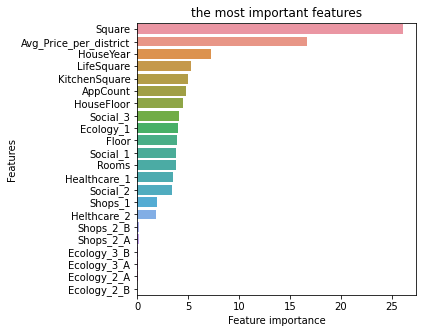

In [116]:
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(y=feature_importances_df.feature_name, x=feature_importances_df.importance)

plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.title("the most important features")
plt.show()

In [117]:
importances = model_cb.feature_importances_

In [118]:
feature = feature_importances_df['feature_name'].tolist()

**Определение R2 в зависимости от использованного набора признаков**

In [119]:
best_tmp_score = 0
best_tmp_list = []
for i in (range(1,len(feature))):
        features = feature[0:i]
        X_tmp = X_cb[features]
        model_cb.fit(X_tmp, y_cb)
        y_tmp_train_cb = model_cb.predict(X_tmp)
        cb_r2_tmp_score = r2_score(y_tmp_train_cb, y_cb)
        if cb_r2_tmp_score > best_tmp_score:
            best_tmp_score = cb_r2_tmp_score
            best_tmp_list = features.copy()

0:	learn: 0.0696931	total: 5.82ms	remaining: 6.92s
1:	learn: 0.1236493	total: 11.2ms	remaining: 6.65s
2:	learn: 0.1698434	total: 16.3ms	remaining: 6.44s
3:	learn: 0.2069917	total: 21.3ms	remaining: 6.33s
4:	learn: 0.2377283	total: 27.2ms	remaining: 6.45s
5:	learn: 0.2623991	total: 32.4ms	remaining: 6.39s
6:	learn: 0.2824865	total: 37.5ms	remaining: 6.34s
7:	learn: 0.2985052	total: 43.1ms	remaining: 6.37s
8:	learn: 0.3121242	total: 48.3ms	remaining: 6.33s
9:	learn: 0.3227872	total: 54ms	remaining: 6.37s
10:	learn: 0.3320221	total: 59.7ms	remaining: 6.4s
11:	learn: 0.3393535	total: 64.9ms	remaining: 6.37s
12:	learn: 0.3455271	total: 70.1ms	remaining: 6.35s
13:	learn: 0.3502705	total: 75.3ms	remaining: 6.33s
14:	learn: 0.3544677	total: 80.7ms	remaining: 6.32s
15:	learn: 0.3576093	total: 86.3ms	remaining: 6.33s
16:	learn: 0.3601878	total: 93.1ms	remaining: 6.43s
17:	learn: 0.3632490	total: 98.2ms	remaining: 6.39s
18:	learn: 0.3658044	total: 103ms	remaining: 6.37s
19:	learn: 0.3679769	total

171:	learn: 0.3883243	total: 887ms	remaining: 5.25s
172:	learn: 0.3883848	total: 892ms	remaining: 5.25s
173:	learn: 0.3884995	total: 898ms	remaining: 5.24s
174:	learn: 0.3885369	total: 903ms	remaining: 5.24s
175:	learn: 0.3885886	total: 910ms	remaining: 5.25s
176:	learn: 0.3886529	total: 916ms	remaining: 5.24s
177:	learn: 0.3886878	total: 921ms	remaining: 5.24s
178:	learn: 0.3887417	total: 926ms	remaining: 5.23s
179:	learn: 0.3887908	total: 931ms	remaining: 5.22s
180:	learn: 0.3888238	total: 936ms	remaining: 5.21s
181:	learn: 0.3888586	total: 941ms	remaining: 5.21s
182:	learn: 0.3889406	total: 945ms	remaining: 5.2s
183:	learn: 0.3889962	total: 951ms	remaining: 5.2s
184:	learn: 0.3890056	total: 956ms	remaining: 5.19s
185:	learn: 0.3890281	total: 960ms	remaining: 5.18s
186:	learn: 0.3890401	total: 965ms	remaining: 5.18s
187:	learn: 0.3890700	total: 970ms	remaining: 5.17s
188:	learn: 0.3891210	total: 975ms	remaining: 5.17s
189:	learn: 0.3891676	total: 980ms	remaining: 5.16s
190:	learn: 0.

345:	learn: 0.3921628	total: 1.78s	remaining: 4.33s
346:	learn: 0.3921635	total: 1.78s	remaining: 4.33s
347:	learn: 0.3921734	total: 1.79s	remaining: 4.33s
348:	learn: 0.3921786	total: 1.79s	remaining: 4.33s
349:	learn: 0.3921937	total: 1.8s	remaining: 4.32s
350:	learn: 0.3921983	total: 1.81s	remaining: 4.32s
351:	learn: 0.3922001	total: 1.81s	remaining: 4.31s
352:	learn: 0.3922161	total: 1.82s	remaining: 4.31s
353:	learn: 0.3922243	total: 1.82s	remaining: 4.3s
354:	learn: 0.3922314	total: 1.83s	remaining: 4.3s
355:	learn: 0.3922344	total: 1.83s	remaining: 4.29s
356:	learn: 0.3922380	total: 1.84s	remaining: 4.28s
357:	learn: 0.3922409	total: 1.84s	remaining: 4.28s
358:	learn: 0.3922525	total: 1.85s	remaining: 4.27s
359:	learn: 0.3922538	total: 1.85s	remaining: 4.27s
360:	learn: 0.3922701	total: 1.85s	remaining: 4.26s
361:	learn: 0.3922753	total: 1.86s	remaining: 4.26s
362:	learn: 0.3922840	total: 1.86s	remaining: 4.25s
363:	learn: 0.3922902	total: 1.87s	remaining: 4.24s
364:	learn: 0.3

519:	learn: 0.3930172	total: 2.67s	remaining: 3.44s
520:	learn: 0.3930175	total: 2.68s	remaining: 3.44s
521:	learn: 0.3930179	total: 2.68s	remaining: 3.43s
522:	learn: 0.3930189	total: 2.69s	remaining: 3.43s
523:	learn: 0.3930212	total: 2.69s	remaining: 3.42s
524:	learn: 0.3930222	total: 2.7s	remaining: 3.42s
525:	learn: 0.3930239	total: 2.71s	remaining: 3.41s
526:	learn: 0.3930315	total: 2.71s	remaining: 3.41s
527:	learn: 0.3930352	total: 2.71s	remaining: 3.4s
528:	learn: 0.3930380	total: 2.72s	remaining: 3.4s
529:	learn: 0.3930385	total: 2.73s	remaining: 3.39s
530:	learn: 0.3930388	total: 2.73s	remaining: 3.39s
531:	learn: 0.3930395	total: 2.73s	remaining: 3.38s
532:	learn: 0.3930458	total: 2.74s	remaining: 3.38s
533:	learn: 0.3930467	total: 2.75s	remaining: 3.37s
534:	learn: 0.3930469	total: 2.75s	remaining: 3.37s
535:	learn: 0.3930485	total: 2.75s	remaining: 3.36s
536:	learn: 0.3930496	total: 2.76s	remaining: 3.36s
537:	learn: 0.3930546	total: 2.77s	remaining: 3.35s
538:	learn: 0.3

691:	learn: 0.3932752	total: 3.56s	remaining: 2.56s
692:	learn: 0.3932757	total: 3.56s	remaining: 2.55s
693:	learn: 0.3932767	total: 3.57s	remaining: 2.55s
694:	learn: 0.3932775	total: 3.58s	remaining: 2.55s
695:	learn: 0.3932786	total: 3.58s	remaining: 2.54s
696:	learn: 0.3932791	total: 3.59s	remaining: 2.54s
697:	learn: 0.3932798	total: 3.59s	remaining: 2.53s
698:	learn: 0.3932800	total: 3.6s	remaining: 2.53s
699:	learn: 0.3932800	total: 3.6s	remaining: 2.52s
700:	learn: 0.3932831	total: 3.61s	remaining: 2.52s
701:	learn: 0.3932832	total: 3.61s	remaining: 2.51s
702:	learn: 0.3932836	total: 3.62s	remaining: 2.5s
703:	learn: 0.3932842	total: 3.62s	remaining: 2.5s
704:	learn: 0.3932845	total: 3.63s	remaining: 2.49s
705:	learn: 0.3932846	total: 3.63s	remaining: 2.49s
706:	learn: 0.3932869	total: 3.64s	remaining: 2.48s
707:	learn: 0.3932871	total: 3.64s	remaining: 2.48s
708:	learn: 0.3932880	total: 3.65s	remaining: 2.47s
709:	learn: 0.3932882	total: 3.65s	remaining: 2.47s
710:	learn: 0.39

864:	learn: 0.3933868	total: 4.45s	remaining: 1.67s
865:	learn: 0.3933868	total: 4.45s	remaining: 1.67s
866:	learn: 0.3933870	total: 4.46s	remaining: 1.66s
867:	learn: 0.3933871	total: 4.47s	remaining: 1.66s
868:	learn: 0.3933874	total: 4.47s	remaining: 1.65s
869:	learn: 0.3933883	total: 4.48s	remaining: 1.65s
870:	learn: 0.3933888	total: 4.48s	remaining: 1.64s
871:	learn: 0.3933908	total: 4.49s	remaining: 1.64s
872:	learn: 0.3933912	total: 4.49s	remaining: 1.63s
873:	learn: 0.3933913	total: 4.5s	remaining: 1.63s
874:	learn: 0.3933922	total: 4.5s	remaining: 1.62s
875:	learn: 0.3933923	total: 4.51s	remaining: 1.61s
876:	learn: 0.3933926	total: 4.51s	remaining: 1.61s
877:	learn: 0.3933926	total: 4.52s	remaining: 1.6s
878:	learn: 0.3933937	total: 4.52s	remaining: 1.6s
879:	learn: 0.3933937	total: 4.53s	remaining: 1.59s
880:	learn: 0.3933939	total: 4.53s	remaining: 1.59s
881:	learn: 0.3933939	total: 4.54s	remaining: 1.58s
882:	learn: 0.3933946	total: 4.54s	remaining: 1.58s
883:	learn: 0.39

1038:	learn: 0.3934419	total: 5.34s	remaining: 776ms
1039:	learn: 0.3934419	total: 5.34s	remaining: 771ms
1040:	learn: 0.3934420	total: 5.35s	remaining: 765ms
1041:	learn: 0.3934430	total: 5.35s	remaining: 760ms
1042:	learn: 0.3934432	total: 5.36s	remaining: 755ms
1043:	learn: 0.3934432	total: 5.36s	remaining: 750ms
1044:	learn: 0.3934432	total: 5.37s	remaining: 745ms
1045:	learn: 0.3934435	total: 5.37s	remaining: 740ms
1046:	learn: 0.3934435	total: 5.38s	remaining: 735ms
1047:	learn: 0.3934436	total: 5.38s	remaining: 730ms
1048:	learn: 0.3934440	total: 5.39s	remaining: 724ms
1049:	learn: 0.3934440	total: 5.39s	remaining: 719ms
1050:	learn: 0.3934440	total: 5.4s	remaining: 714ms
1051:	learn: 0.3934441	total: 5.4s	remaining: 709ms
1052:	learn: 0.3934441	total: 5.41s	remaining: 704ms
1053:	learn: 0.3934441	total: 5.41s	remaining: 699ms
1054:	learn: 0.3934441	total: 5.42s	remaining: 694ms
1055:	learn: 0.3934451	total: 5.42s	remaining: 688ms
1056:	learn: 0.3934451	total: 5.43s	remaining: 6

34:	learn: 0.7100553	total: 180ms	remaining: 5.95s
35:	learn: 0.7104451	total: 188ms	remaining: 6.03s
36:	learn: 0.7108796	total: 194ms	remaining: 6.03s
37:	learn: 0.7117171	total: 199ms	remaining: 6.04s
38:	learn: 0.7124181	total: 206ms	remaining: 6.08s
39:	learn: 0.7129384	total: 211ms	remaining: 6.07s
40:	learn: 0.7134532	total: 217ms	remaining: 6.07s
41:	learn: 0.7139425	total: 222ms	remaining: 6.05s
42:	learn: 0.7144248	total: 226ms	remaining: 6.04s
43:	learn: 0.7147785	total: 232ms	remaining: 6.04s
44:	learn: 0.7152407	total: 237ms	remaining: 6.02s
45:	learn: 0.7154008	total: 242ms	remaining: 6.01s
46:	learn: 0.7158500	total: 246ms	remaining: 5.99s
47:	learn: 0.7161099	total: 251ms	remaining: 5.98s
48:	learn: 0.7166522	total: 257ms	remaining: 5.98s
49:	learn: 0.7172020	total: 262ms	remaining: 5.98s
50:	learn: 0.7175165	total: 267ms	remaining: 5.97s
51:	learn: 0.7179001	total: 272ms	remaining: 5.96s
52:	learn: 0.7183799	total: 277ms	remaining: 5.95s
53:	learn: 0.7186505	total: 282

205:	learn: 0.7615221	total: 1.07s	remaining: 5.14s
206:	learn: 0.7617314	total: 1.08s	remaining: 5.13s
207:	learn: 0.7620201	total: 1.09s	remaining: 5.14s
208:	learn: 0.7621605	total: 1.09s	remaining: 5.13s
209:	learn: 0.7622679	total: 1.1s	remaining: 5.13s
210:	learn: 0.7624200	total: 1.1s	remaining: 5.13s
211:	learn: 0.7625016	total: 1.11s	remaining: 5.12s
212:	learn: 0.7626368	total: 1.11s	remaining: 5.11s
213:	learn: 0.7628066	total: 1.12s	remaining: 5.11s
214:	learn: 0.7628441	total: 1.12s	remaining: 5.1s
215:	learn: 0.7630379	total: 1.13s	remaining: 5.09s
216:	learn: 0.7632402	total: 1.14s	remaining: 5.09s
217:	learn: 0.7633323	total: 1.14s	remaining: 5.08s
218:	learn: 0.7634393	total: 1.15s	remaining: 5.08s
219:	learn: 0.7635181	total: 1.15s	remaining: 5.07s
220:	learn: 0.7637068	total: 1.16s	remaining: 5.07s
221:	learn: 0.7639375	total: 1.16s	remaining: 5.06s
222:	learn: 0.7640193	total: 1.17s	remaining: 5.06s
223:	learn: 0.7643660	total: 1.17s	remaining: 5.05s
224:	learn: 0.7

375:	learn: 0.7862924	total: 1.97s	remaining: 4.26s
376:	learn: 0.7864715	total: 1.97s	remaining: 4.25s
377:	learn: 0.7865918	total: 1.98s	remaining: 4.25s
378:	learn: 0.7866538	total: 1.98s	remaining: 4.25s
379:	learn: 0.7867800	total: 1.99s	remaining: 4.24s
380:	learn: 0.7868900	total: 2s	remaining: 4.24s
381:	learn: 0.7870003	total: 2s	remaining: 4.23s
382:	learn: 0.7870973	total: 2.01s	remaining: 4.23s
383:	learn: 0.7871524	total: 2.01s	remaining: 4.22s
384:	learn: 0.7872203	total: 2.02s	remaining: 4.22s
385:	learn: 0.7873597	total: 2.02s	remaining: 4.21s
386:	learn: 0.7875256	total: 2.03s	remaining: 4.21s
387:	learn: 0.7875924	total: 2.03s	remaining: 4.2s
388:	learn: 0.7876497	total: 2.04s	remaining: 4.19s
389:	learn: 0.7877986	total: 2.04s	remaining: 4.19s
390:	learn: 0.7879894	total: 2.05s	remaining: 4.18s
391:	learn: 0.7882012	total: 2.05s	remaining: 4.18s
392:	learn: 0.7882347	total: 2.06s	remaining: 4.17s
393:	learn: 0.7883354	total: 2.06s	remaining: 4.16s
394:	learn: 0.78847

546:	learn: 0.8032936	total: 2.86s	remaining: 3.36s
547:	learn: 0.8035173	total: 2.86s	remaining: 3.35s
548:	learn: 0.8035991	total: 2.87s	remaining: 3.35s
549:	learn: 0.8036536	total: 2.87s	remaining: 3.34s
550:	learn: 0.8037206	total: 2.88s	remaining: 3.34s
551:	learn: 0.8037354	total: 2.88s	remaining: 3.33s
552:	learn: 0.8038038	total: 2.89s	remaining: 3.33s
553:	learn: 0.8038781	total: 2.9s	remaining: 3.32s
554:	learn: 0.8039191	total: 2.9s	remaining: 3.32s
555:	learn: 0.8041063	total: 2.9s	remaining: 3.31s
556:	learn: 0.8042695	total: 2.91s	remaining: 3.31s
557:	learn: 0.8043672	total: 2.92s	remaining: 3.3s
558:	learn: 0.8044480	total: 2.92s	remaining: 3.3s
559:	learn: 0.8045044	total: 2.93s	remaining: 3.29s
560:	learn: 0.8045958	total: 2.93s	remaining: 3.29s
561:	learn: 0.8046885	total: 2.94s	remaining: 3.28s
562:	learn: 0.8047281	total: 2.94s	remaining: 3.28s
563:	learn: 0.8048488	total: 2.95s	remaining: 3.27s
564:	learn: 0.8049254	total: 2.95s	remaining: 3.27s
565:	learn: 0.805

717:	learn: 0.8162316	total: 3.75s	remaining: 2.46s
718:	learn: 0.8162989	total: 3.76s	remaining: 2.46s
719:	learn: 0.8164065	total: 3.76s	remaining: 2.46s
720:	learn: 0.8164650	total: 3.77s	remaining: 2.45s
721:	learn: 0.8165501	total: 3.77s	remaining: 2.45s
722:	learn: 0.8166130	total: 3.78s	remaining: 2.44s
723:	learn: 0.8166390	total: 3.79s	remaining: 2.44s
724:	learn: 0.8167332	total: 3.79s	remaining: 2.43s
725:	learn: 0.8167850	total: 3.79s	remaining: 2.42s
726:	learn: 0.8168357	total: 3.8s	remaining: 2.42s
727:	learn: 0.8169060	total: 3.81s	remaining: 2.42s
728:	learn: 0.8169817	total: 3.81s	remaining: 2.41s
729:	learn: 0.8170747	total: 3.81s	remaining: 2.4s
730:	learn: 0.8170973	total: 3.82s	remaining: 2.4s
731:	learn: 0.8171648	total: 3.83s	remaining: 2.39s
732:	learn: 0.8172326	total: 3.83s	remaining: 2.39s
733:	learn: 0.8172955	total: 3.84s	remaining: 2.38s
734:	learn: 0.8174519	total: 3.84s	remaining: 2.38s
735:	learn: 0.8174962	total: 3.85s	remaining: 2.37s
736:	learn: 0.8

886:	learn: 0.8270034	total: 4.64s	remaining: 1.58s
887:	learn: 0.8270499	total: 4.64s	remaining: 1.58s
888:	learn: 0.8270905	total: 4.65s	remaining: 1.57s
889:	learn: 0.8271167	total: 4.66s	remaining: 1.57s
890:	learn: 0.8271501	total: 4.66s	remaining: 1.56s
891:	learn: 0.8272394	total: 4.67s	remaining: 1.56s
892:	learn: 0.8272749	total: 4.67s	remaining: 1.55s
893:	learn: 0.8273000	total: 4.68s	remaining: 1.55s
894:	learn: 0.8273282	total: 4.68s	remaining: 1.54s
895:	learn: 0.8273892	total: 4.69s	remaining: 1.54s
896:	learn: 0.8274662	total: 4.69s	remaining: 1.53s
897:	learn: 0.8274725	total: 4.7s	remaining: 1.53s
898:	learn: 0.8275260	total: 4.7s	remaining: 1.52s
899:	learn: 0.8276338	total: 4.71s	remaining: 1.52s
900:	learn: 0.8277061	total: 4.71s	remaining: 1.51s
901:	learn: 0.8277926	total: 4.72s	remaining: 1.51s
902:	learn: 0.8278432	total: 4.72s	remaining: 1.5s
903:	learn: 0.8279289	total: 4.73s	remaining: 1.5s
904:	learn: 0.8279464	total: 4.73s	remaining: 1.49s
905:	learn: 0.82

1056:	learn: 0.8366367	total: 5.54s	remaining: 697ms
1057:	learn: 0.8367172	total: 5.54s	remaining: 691ms
1058:	learn: 0.8367348	total: 5.55s	remaining: 686ms
1059:	learn: 0.8368050	total: 5.55s	remaining: 681ms
1060:	learn: 0.8368332	total: 5.56s	remaining: 676ms
1061:	learn: 0.8369189	total: 5.56s	remaining: 671ms
1062:	learn: 0.8369495	total: 5.57s	remaining: 665ms
1063:	learn: 0.8370447	total: 5.57s	remaining: 660ms
1064:	learn: 0.8370704	total: 5.58s	remaining: 655ms
1065:	learn: 0.8371008	total: 5.58s	remaining: 650ms
1066:	learn: 0.8371655	total: 5.59s	remaining: 644ms
1067:	learn: 0.8372000	total: 5.59s	remaining: 639ms
1068:	learn: 0.8372949	total: 5.6s	remaining: 634ms
1069:	learn: 0.8373818	total: 5.6s	remaining: 628ms
1070:	learn: 0.8374479	total: 5.61s	remaining: 623ms
1071:	learn: 0.8374943	total: 5.61s	remaining: 618ms
1072:	learn: 0.8375106	total: 5.62s	remaining: 613ms
1073:	learn: 0.8375307	total: 5.62s	remaining: 608ms
1074:	learn: 0.8375847	total: 5.63s	remaining: 6

36:	learn: 0.7312241	total: 191ms	remaining: 5.95s
37:	learn: 0.7324236	total: 197ms	remaining: 5.96s
38:	learn: 0.7334423	total: 202ms	remaining: 5.96s
39:	learn: 0.7344346	total: 207ms	remaining: 5.96s
40:	learn: 0.7351109	total: 214ms	remaining: 6.01s
41:	learn: 0.7359363	total: 220ms	remaining: 6.01s
42:	learn: 0.7365656	total: 225ms	remaining: 6s
43:	learn: 0.7373062	total: 230ms	remaining: 6s
44:	learn: 0.7379314	total: 235ms	remaining: 5.98s
45:	learn: 0.7384294	total: 240ms	remaining: 5.97s
46:	learn: 0.7392141	total: 246ms	remaining: 5.97s
47:	learn: 0.7399601	total: 250ms	remaining: 5.96s
48:	learn: 0.7409088	total: 256ms	remaining: 5.95s
49:	learn: 0.7415216	total: 261ms	remaining: 5.95s
50:	learn: 0.7419463	total: 266ms	remaining: 5.94s
51:	learn: 0.7427253	total: 271ms	remaining: 5.94s
52:	learn: 0.7431380	total: 276ms	remaining: 5.93s
53:	learn: 0.7435843	total: 282ms	remaining: 5.92s
54:	learn: 0.7441328	total: 286ms	remaining: 5.91s
55:	learn: 0.7445517	total: 292ms	rem

206:	learn: 0.8026247	total: 1.08s	remaining: 5.14s
207:	learn: 0.8028663	total: 1.09s	remaining: 5.14s
208:	learn: 0.8031405	total: 1.09s	remaining: 5.14s
209:	learn: 0.8033532	total: 1.1s	remaining: 5.14s
210:	learn: 0.8036046	total: 1.11s	remaining: 5.14s
211:	learn: 0.8038825	total: 1.11s	remaining: 5.13s
212:	learn: 0.8040246	total: 1.12s	remaining: 5.13s
213:	learn: 0.8042386	total: 1.12s	remaining: 5.12s
214:	learn: 0.8046643	total: 1.13s	remaining: 5.12s
215:	learn: 0.8048266	total: 1.13s	remaining: 5.11s
216:	learn: 0.8049366	total: 1.14s	remaining: 5.11s
217:	learn: 0.8049757	total: 1.14s	remaining: 5.1s
218:	learn: 0.8052005	total: 1.15s	remaining: 5.1s
219:	learn: 0.8054084	total: 1.15s	remaining: 5.09s
220:	learn: 0.8056629	total: 1.16s	remaining: 5.08s
221:	learn: 0.8059107	total: 1.16s	remaining: 5.08s
222:	learn: 0.8060635	total: 1.17s	remaining: 5.07s
223:	learn: 0.8062293	total: 1.17s	remaining: 5.07s
224:	learn: 0.8063338	total: 1.18s	remaining: 5.06s
225:	learn: 0.8

372:	learn: 0.8355020	total: 1.98s	remaining: 4.33s
373:	learn: 0.8356075	total: 1.98s	remaining: 4.33s
374:	learn: 0.8356404	total: 1.99s	remaining: 4.32s
375:	learn: 0.8357038	total: 1.99s	remaining: 4.32s
376:	learn: 0.8358904	total: 2s	remaining: 4.31s
377:	learn: 0.8359775	total: 2s	remaining: 4.31s
378:	learn: 0.8360022	total: 2.01s	remaining: 4.3s
379:	learn: 0.8361268	total: 2.01s	remaining: 4.29s
380:	learn: 0.8363249	total: 2.02s	remaining: 4.29s
381:	learn: 0.8364904	total: 2.02s	remaining: 4.28s
382:	learn: 0.8365913	total: 2.03s	remaining: 4.28s
383:	learn: 0.8366863	total: 2.04s	remaining: 4.27s
384:	learn: 0.8367680	total: 2.04s	remaining: 4.27s
385:	learn: 0.8370218	total: 2.04s	remaining: 4.26s
386:	learn: 0.8370767	total: 2.05s	remaining: 4.25s
387:	learn: 0.8372491	total: 2.06s	remaining: 4.25s
388:	learn: 0.8373533	total: 2.06s	remaining: 4.24s
389:	learn: 0.8374809	total: 2.06s	remaining: 4.24s
390:	learn: 0.8376532	total: 2.07s	remaining: 4.23s
391:	learn: 0.83781

539:	learn: 0.8555504	total: 2.86s	remaining: 3.45s
540:	learn: 0.8556734	total: 2.87s	remaining: 3.44s
541:	learn: 0.8557688	total: 2.88s	remaining: 3.44s
542:	learn: 0.8558545	total: 2.88s	remaining: 3.44s
543:	learn: 0.8559512	total: 2.89s	remaining: 3.43s
544:	learn: 0.8561023	total: 2.9s	remaining: 3.43s
545:	learn: 0.8562086	total: 2.9s	remaining: 3.42s
546:	learn: 0.8563157	total: 2.9s	remaining: 3.42s
547:	learn: 0.8565036	total: 2.91s	remaining: 3.41s
548:	learn: 0.8565779	total: 2.92s	remaining: 3.4s
549:	learn: 0.8566576	total: 2.92s	remaining: 3.4s
550:	learn: 0.8567881	total: 2.93s	remaining: 3.39s
551:	learn: 0.8568437	total: 2.93s	remaining: 3.39s
552:	learn: 0.8570549	total: 2.94s	remaining: 3.38s
553:	learn: 0.8571935	total: 2.94s	remaining: 3.38s
554:	learn: 0.8572218	total: 2.95s	remaining: 3.37s
555:	learn: 0.8573023	total: 2.95s	remaining: 3.37s
556:	learn: 0.8573968	total: 2.96s	remaining: 3.36s
557:	learn: 0.8576273	total: 2.96s	remaining: 3.35s
558:	learn: 0.857

706:	learn: 0.8709816	total: 3.75s	remaining: 2.56s
707:	learn: 0.8709868	total: 3.76s	remaining: 2.56s
708:	learn: 0.8710844	total: 3.77s	remaining: 2.56s
709:	learn: 0.8711370	total: 3.77s	remaining: 2.55s
710:	learn: 0.8712281	total: 3.78s	remaining: 2.55s
711:	learn: 0.8713153	total: 3.79s	remaining: 2.54s
712:	learn: 0.8713988	total: 3.79s	remaining: 2.54s
713:	learn: 0.8715046	total: 3.8s	remaining: 2.53s
714:	learn: 0.8716200	total: 3.8s	remaining: 2.52s
715:	learn: 0.8716423	total: 3.81s	remaining: 2.52s
716:	learn: 0.8716875	total: 3.81s	remaining: 2.51s
717:	learn: 0.8717654	total: 3.82s	remaining: 2.51s
718:	learn: 0.8718354	total: 3.82s	remaining: 2.5s
719:	learn: 0.8719530	total: 3.83s	remaining: 2.5s
720:	learn: 0.8720195	total: 3.83s	remaining: 2.49s
721:	learn: 0.8720532	total: 3.84s	remaining: 2.49s
722:	learn: 0.8721289	total: 3.84s	remaining: 2.48s
723:	learn: 0.8722416	total: 3.85s	remaining: 2.48s
724:	learn: 0.8722920	total: 3.85s	remaining: 2.47s
725:	learn: 0.87

875:	learn: 0.8832474	total: 4.65s	remaining: 1.67s
876:	learn: 0.8833354	total: 4.65s	remaining: 1.66s
877:	learn: 0.8834612	total: 4.66s	remaining: 1.66s
878:	learn: 0.8835264	total: 4.67s	remaining: 1.65s
879:	learn: 0.8835562	total: 4.67s	remaining: 1.65s
880:	learn: 0.8835658	total: 4.67s	remaining: 1.64s
881:	learn: 0.8837148	total: 4.68s	remaining: 1.63s
882:	learn: 0.8837781	total: 4.69s	remaining: 1.63s
883:	learn: 0.8838701	total: 4.69s	remaining: 1.62s
884:	learn: 0.8839561	total: 4.7s	remaining: 1.62s
885:	learn: 0.8840362	total: 4.71s	remaining: 1.61s
886:	learn: 0.8840978	total: 4.71s	remaining: 1.61s
887:	learn: 0.8841246	total: 4.72s	remaining: 1.6s
888:	learn: 0.8841934	total: 4.72s	remaining: 1.6s
889:	learn: 0.8842570	total: 4.73s	remaining: 1.59s
890:	learn: 0.8842993	total: 4.74s	remaining: 1.59s
891:	learn: 0.8843167	total: 4.74s	remaining: 1.58s
892:	learn: 0.8843457	total: 4.75s	remaining: 1.58s
893:	learn: 0.8843982	total: 4.75s	remaining: 1.57s
894:	learn: 0.8

1042:	learn: 0.8934898	total: 5.54s	remaining: 781ms
1043:	learn: 0.8935373	total: 5.55s	remaining: 776ms
1044:	learn: 0.8935890	total: 5.55s	remaining: 770ms
1045:	learn: 0.8936328	total: 5.56s	remaining: 765ms
1046:	learn: 0.8936679	total: 5.56s	remaining: 760ms
1047:	learn: 0.8937463	total: 5.57s	remaining: 755ms
1048:	learn: 0.8938139	total: 5.58s	remaining: 749ms
1049:	learn: 0.8938485	total: 5.58s	remaining: 744ms
1050:	learn: 0.8939223	total: 5.59s	remaining: 739ms
1051:	learn: 0.8939804	total: 5.59s	remaining: 733ms
1052:	learn: 0.8940667	total: 5.6s	remaining: 728ms
1053:	learn: 0.8940922	total: 5.6s	remaining: 723ms
1054:	learn: 0.8941487	total: 5.61s	remaining: 717ms
1055:	learn: 0.8942238	total: 5.61s	remaining: 712ms
1056:	learn: 0.8942546	total: 5.62s	remaining: 707ms
1057:	learn: 0.8943006	total: 5.62s	remaining: 701ms
1058:	learn: 0.8943598	total: 5.63s	remaining: 696ms
1059:	learn: 0.8943906	total: 5.63s	remaining: 691ms
1060:	learn: 0.8944510	total: 5.64s	remaining: 6

31:	learn: 0.7295447	total: 183ms	remaining: 6.61s
32:	learn: 0.7307413	total: 189ms	remaining: 6.62s
33:	learn: 0.7324372	total: 195ms	remaining: 6.63s
34:	learn: 0.7339238	total: 202ms	remaining: 6.67s
35:	learn: 0.7350650	total: 208ms	remaining: 6.68s
36:	learn: 0.7363196	total: 215ms	remaining: 6.7s
37:	learn: 0.7369387	total: 220ms	remaining: 6.67s
38:	learn: 0.7377065	total: 225ms	remaining: 6.64s
39:	learn: 0.7388007	total: 230ms	remaining: 6.63s
40:	learn: 0.7398425	total: 236ms	remaining: 6.6s
41:	learn: 0.7403325	total: 241ms	remaining: 6.6s
42:	learn: 0.7412631	total: 248ms	remaining: 6.61s
43:	learn: 0.7417626	total: 253ms	remaining: 6.58s
44:	learn: 0.7427587	total: 258ms	remaining: 6.56s
45:	learn: 0.7434307	total: 263ms	remaining: 6.55s
46:	learn: 0.7439053	total: 268ms	remaining: 6.52s
47:	learn: 0.7444455	total: 274ms	remaining: 6.51s
48:	learn: 0.7450156	total: 279ms	remaining: 6.5s
49:	learn: 0.7461500	total: 284ms	remaining: 6.48s
50:	learn: 0.7468266	total: 289ms	r

194:	learn: 0.8104284	total: 1.09s	remaining: 5.59s
195:	learn: 0.8109415	total: 1.1s	remaining: 5.58s
196:	learn: 0.8114227	total: 1.11s	remaining: 5.58s
197:	learn: 0.8117314	total: 1.11s	remaining: 5.59s
198:	learn: 0.8118591	total: 1.12s	remaining: 5.58s
199:	learn: 0.8124246	total: 1.13s	remaining: 5.58s
200:	learn: 0.8126992	total: 1.13s	remaining: 5.57s
201:	learn: 0.8128144	total: 1.14s	remaining: 5.56s
202:	learn: 0.8131758	total: 1.14s	remaining: 5.55s
203:	learn: 0.8133904	total: 1.15s	remaining: 5.55s
204:	learn: 0.8135064	total: 1.15s	remaining: 5.54s
205:	learn: 0.8137889	total: 1.16s	remaining: 5.53s
206:	learn: 0.8138629	total: 1.16s	remaining: 5.53s
207:	learn: 0.8140756	total: 1.17s	remaining: 5.52s
208:	learn: 0.8143834	total: 1.17s	remaining: 5.51s
209:	learn: 0.8145696	total: 1.18s	remaining: 5.5s
210:	learn: 0.8149043	total: 1.18s	remaining: 5.5s
211:	learn: 0.8151940	total: 1.19s	remaining: 5.49s
212:	learn: 0.8152852	total: 1.2s	remaining: 5.48s
213:	learn: 0.81

357:	learn: 0.8465411	total: 2.01s	remaining: 4.66s
358:	learn: 0.8468124	total: 2.01s	remaining: 4.66s
359:	learn: 0.8469580	total: 2.02s	remaining: 4.66s
360:	learn: 0.8470089	total: 2.03s	remaining: 4.66s
361:	learn: 0.8471784	total: 2.03s	remaining: 4.65s
362:	learn: 0.8472348	total: 2.04s	remaining: 4.64s
363:	learn: 0.8474306	total: 2.04s	remaining: 4.64s
364:	learn: 0.8476654	total: 2.05s	remaining: 4.63s
365:	learn: 0.8478386	total: 2.05s	remaining: 4.62s
366:	learn: 0.8480649	total: 2.06s	remaining: 4.62s
367:	learn: 0.8482292	total: 2.06s	remaining: 4.61s
368:	learn: 0.8483739	total: 2.07s	remaining: 4.61s
369:	learn: 0.8486278	total: 2.08s	remaining: 4.6s
370:	learn: 0.8488391	total: 2.08s	remaining: 4.59s
371:	learn: 0.8489459	total: 2.09s	remaining: 4.59s
372:	learn: 0.8490545	total: 2.09s	remaining: 4.58s
373:	learn: 0.8491397	total: 2.1s	remaining: 4.58s
374:	learn: 0.8493530	total: 2.1s	remaining: 4.57s
375:	learn: 0.8494679	total: 2.11s	remaining: 4.57s
376:	learn: 0.8

542:	learn: 0.8724771	total: 3.07s	remaining: 3.66s
543:	learn: 0.8725708	total: 3.08s	remaining: 3.66s
544:	learn: 0.8726738	total: 3.09s	remaining: 3.65s
545:	learn: 0.8726967	total: 3.09s	remaining: 3.65s
546:	learn: 0.8728991	total: 3.1s	remaining: 3.65s
547:	learn: 0.8730346	total: 3.11s	remaining: 3.64s
548:	learn: 0.8730710	total: 3.11s	remaining: 3.63s
549:	learn: 0.8731965	total: 3.12s	remaining: 3.63s
550:	learn: 0.8733179	total: 3.13s	remaining: 3.62s
551:	learn: 0.8734947	total: 3.13s	remaining: 3.62s
552:	learn: 0.8735868	total: 3.14s	remaining: 3.61s
553:	learn: 0.8737449	total: 3.14s	remaining: 3.61s
554:	learn: 0.8737932	total: 3.15s	remaining: 3.6s
555:	learn: 0.8739169	total: 3.15s	remaining: 3.6s
556:	learn: 0.8740099	total: 3.16s	remaining: 3.59s
557:	learn: 0.8741495	total: 3.17s	remaining: 3.58s
558:	learn: 0.8742403	total: 3.17s	remaining: 3.58s
559:	learn: 0.8743553	total: 3.18s	remaining: 3.57s
560:	learn: 0.8743746	total: 3.18s	remaining: 3.57s
561:	learn: 0.8

729:	learn: 0.8912220	total: 4.14s	remaining: 2.61s
730:	learn: 0.8912682	total: 4.15s	remaining: 2.61s
731:	learn: 0.8913444	total: 4.16s	remaining: 2.6s
732:	learn: 0.8913976	total: 4.17s	remaining: 2.6s
733:	learn: 0.8915148	total: 4.17s	remaining: 2.59s
734:	learn: 0.8915947	total: 4.18s	remaining: 2.59s
735:	learn: 0.8917324	total: 4.18s	remaining: 2.58s
736:	learn: 0.8918638	total: 4.19s	remaining: 2.57s
737:	learn: 0.8920281	total: 4.19s	remaining: 2.57s
738:	learn: 0.8921058	total: 4.2s	remaining: 2.56s
739:	learn: 0.8921674	total: 4.2s	remaining: 2.56s
740:	learn: 0.8922089	total: 4.21s	remaining: 2.55s
741:	learn: 0.8922813	total: 4.21s	remaining: 2.54s
742:	learn: 0.8923496	total: 4.22s	remaining: 2.54s
743:	learn: 0.8924048	total: 4.22s	remaining: 2.53s
744:	learn: 0.8925161	total: 4.23s	remaining: 2.53s
745:	learn: 0.8925851	total: 4.24s	remaining: 2.52s
746:	learn: 0.8926387	total: 4.24s	remaining: 2.52s
747:	learn: 0.8927004	total: 4.25s	remaining: 2.51s
748:	learn: 0.89

919:	learn: 0.9054953	total: 5.22s	remaining: 1.53s
920:	learn: 0.9055364	total: 5.22s	remaining: 1.53s
921:	learn: 0.9056393	total: 5.23s	remaining: 1.52s
922:	learn: 0.9056905	total: 5.24s	remaining: 1.51s
923:	learn: 0.9057755	total: 5.25s	remaining: 1.51s
924:	learn: 0.9058565	total: 5.25s	remaining: 1.5s
925:	learn: 0.9058903	total: 5.26s	remaining: 1.5s
926:	learn: 0.9059287	total: 5.26s	remaining: 1.49s
927:	learn: 0.9060072	total: 5.27s	remaining: 1.49s
928:	learn: 0.9060613	total: 5.27s	remaining: 1.48s
929:	learn: 0.9061771	total: 5.28s	remaining: 1.48s
930:	learn: 0.9062779	total: 5.28s	remaining: 1.47s
931:	learn: 0.9063319	total: 5.29s	remaining: 1.46s
932:	learn: 0.9063720	total: 5.29s	remaining: 1.46s
933:	learn: 0.9064241	total: 5.3s	remaining: 1.45s
934:	learn: 0.9064739	total: 5.31s	remaining: 1.45s
935:	learn: 0.9065087	total: 5.31s	remaining: 1.44s
936:	learn: 0.9065787	total: 5.32s	remaining: 1.44s
937:	learn: 0.9065959	total: 5.32s	remaining: 1.43s
938:	learn: 0.9

1077:	learn: 0.9151068	total: 6.11s	remaining: 635ms
1078:	learn: 0.9151725	total: 6.12s	remaining: 630ms
1079:	learn: 0.9151891	total: 6.13s	remaining: 624ms
1080:	learn: 0.9152464	total: 6.13s	remaining: 619ms
1081:	learn: 0.9152735	total: 6.14s	remaining: 613ms
1082:	learn: 0.9153120	total: 6.14s	remaining: 607ms
1083:	learn: 0.9153891	total: 6.15s	remaining: 601ms
1084:	learn: 0.9154493	total: 6.16s	remaining: 596ms
1085:	learn: 0.9154928	total: 6.16s	remaining: 590ms
1086:	learn: 0.9155395	total: 6.17s	remaining: 584ms
1087:	learn: 0.9155974	total: 6.17s	remaining: 579ms
1088:	learn: 0.9156525	total: 6.18s	remaining: 573ms
1089:	learn: 0.9156793	total: 6.18s	remaining: 567ms
1090:	learn: 0.9157311	total: 6.19s	remaining: 562ms
1091:	learn: 0.9157726	total: 6.19s	remaining: 556ms
1092:	learn: 0.9158680	total: 6.2s	remaining: 550ms
1093:	learn: 0.9159004	total: 6.21s	remaining: 545ms
1094:	learn: 0.9159364	total: 6.21s	remaining: 539ms
1095:	learn: 0.9159604	total: 6.22s	remaining: 

65:	learn: 0.7638982	total: 371ms	remaining: 6.32s
66:	learn: 0.7642270	total: 378ms	remaining: 6.33s
67:	learn: 0.7645224	total: 387ms	remaining: 6.38s
68:	learn: 0.7650097	total: 393ms	remaining: 6.39s
69:	learn: 0.7655828	total: 399ms	remaining: 6.39s
70:	learn: 0.7659971	total: 404ms	remaining: 6.37s
71:	learn: 0.7668406	total: 409ms	remaining: 6.35s
72:	learn: 0.7672044	total: 415ms	remaining: 6.35s
73:	learn: 0.7677386	total: 422ms	remaining: 6.37s
74:	learn: 0.7686217	total: 428ms	remaining: 6.36s
75:	learn: 0.7694880	total: 434ms	remaining: 6.36s
76:	learn: 0.7700471	total: 441ms	remaining: 6.37s
77:	learn: 0.7709854	total: 446ms	remaining: 6.36s
78:	learn: 0.7715845	total: 451ms	remaining: 6.34s
79:	learn: 0.7721283	total: 457ms	remaining: 6.33s
80:	learn: 0.7725095	total: 462ms	remaining: 6.32s
81:	learn: 0.7730310	total: 467ms	remaining: 6.31s
82:	learn: 0.7737853	total: 472ms	remaining: 6.3s
83:	learn: 0.7742688	total: 478ms	remaining: 6.3s
84:	learn: 0.7752985	total: 486ms

224:	learn: 0.8299848	total: 1.28s	remaining: 5.49s
225:	learn: 0.8302198	total: 1.28s	remaining: 5.48s
226:	learn: 0.8304827	total: 1.29s	remaining: 5.48s
227:	learn: 0.8307183	total: 1.3s	remaining: 5.49s
228:	learn: 0.8308999	total: 1.31s	remaining: 5.48s
229:	learn: 0.8310823	total: 1.31s	remaining: 5.48s
230:	learn: 0.8313087	total: 1.32s	remaining: 5.47s
231:	learn: 0.8314802	total: 1.32s	remaining: 5.46s
232:	learn: 0.8319029	total: 1.33s	remaining: 5.46s
233:	learn: 0.8319359	total: 1.33s	remaining: 5.45s
234:	learn: 0.8322999	total: 1.34s	remaining: 5.45s
235:	learn: 0.8325885	total: 1.34s	remaining: 5.44s
236:	learn: 0.8327905	total: 1.35s	remaining: 5.43s
237:	learn: 0.8330007	total: 1.35s	remaining: 5.42s
238:	learn: 0.8332417	total: 1.36s	remaining: 5.41s
239:	learn: 0.8333687	total: 1.36s	remaining: 5.41s
240:	learn: 0.8335823	total: 1.37s	remaining: 5.4s
241:	learn: 0.8338650	total: 1.38s	remaining: 5.4s
242:	learn: 0.8340574	total: 1.38s	remaining: 5.39s
243:	learn: 0.8

412:	learn: 0.8652203	total: 2.35s	remaining: 4.43s
413:	learn: 0.8653842	total: 2.36s	remaining: 4.42s
414:	learn: 0.8654004	total: 2.37s	remaining: 4.42s
415:	learn: 0.8655788	total: 2.37s	remaining: 4.42s
416:	learn: 0.8657842	total: 2.38s	remaining: 4.41s
417:	learn: 0.8658714	total: 2.38s	remaining: 4.4s
418:	learn: 0.8659514	total: 2.39s	remaining: 4.4s
419:	learn: 0.8661324	total: 2.39s	remaining: 4.39s
420:	learn: 0.8662694	total: 2.4s	remaining: 4.38s
421:	learn: 0.8664136	total: 2.41s	remaining: 4.38s
422:	learn: 0.8666818	total: 2.41s	remaining: 4.37s
423:	learn: 0.8668361	total: 2.42s	remaining: 4.37s
424:	learn: 0.8668905	total: 2.42s	remaining: 4.36s
425:	learn: 0.8670749	total: 2.43s	remaining: 4.35s
426:	learn: 0.8671756	total: 2.43s	remaining: 4.35s
427:	learn: 0.8672775	total: 2.44s	remaining: 4.34s
428:	learn: 0.8673787	total: 2.44s	remaining: 4.33s
429:	learn: 0.8676384	total: 2.45s	remaining: 4.33s
430:	learn: 0.8677716	total: 2.45s	remaining: 4.32s
431:	learn: 0.8

600:	learn: 0.8881191	total: 3.42s	remaining: 3.35s
601:	learn: 0.8882421	total: 3.43s	remaining: 3.35s
602:	learn: 0.8883019	total: 3.44s	remaining: 3.35s
603:	learn: 0.8883854	total: 3.44s	remaining: 3.34s
604:	learn: 0.8885769	total: 3.45s	remaining: 3.34s
605:	learn: 0.8886422	total: 3.46s	remaining: 3.33s
606:	learn: 0.8887257	total: 3.46s	remaining: 3.33s
607:	learn: 0.8888695	total: 3.47s	remaining: 3.32s
608:	learn: 0.8890457	total: 3.47s	remaining: 3.31s
609:	learn: 0.8891000	total: 3.48s	remaining: 3.31s
610:	learn: 0.8891895	total: 3.48s	remaining: 3.3s
611:	learn: 0.8892453	total: 3.49s	remaining: 3.3s
612:	learn: 0.8893164	total: 3.5s	remaining: 3.29s
613:	learn: 0.8894063	total: 3.5s	remaining: 3.28s
614:	learn: 0.8895103	total: 3.51s	remaining: 3.28s
615:	learn: 0.8895494	total: 3.51s	remaining: 3.27s
616:	learn: 0.8896225	total: 3.52s	remaining: 3.27s
617:	learn: 0.8896996	total: 3.52s	remaining: 3.26s
618:	learn: 0.8898030	total: 3.53s	remaining: 3.25s
619:	learn: 0.88

787:	learn: 0.9030744	total: 4.5s	remaining: 2.29s
788:	learn: 0.9031193	total: 4.51s	remaining: 2.29s
789:	learn: 0.9031769	total: 4.51s	remaining: 2.29s
790:	learn: 0.9032408	total: 4.52s	remaining: 2.28s
791:	learn: 0.9033146	total: 4.53s	remaining: 2.27s
792:	learn: 0.9034424	total: 4.53s	remaining: 2.27s
793:	learn: 0.9034878	total: 4.54s	remaining: 2.26s
794:	learn: 0.9035364	total: 4.54s	remaining: 2.26s
795:	learn: 0.9035761	total: 4.55s	remaining: 2.25s
796:	learn: 0.9036583	total: 4.55s	remaining: 2.25s
797:	learn: 0.9036781	total: 4.56s	remaining: 2.24s
798:	learn: 0.9037208	total: 4.57s	remaining: 2.23s
799:	learn: 0.9038026	total: 4.57s	remaining: 2.23s
800:	learn: 0.9039053	total: 4.58s	remaining: 2.22s
801:	learn: 0.9039634	total: 4.58s	remaining: 2.22s
802:	learn: 0.9039994	total: 4.59s	remaining: 2.21s
803:	learn: 0.9040517	total: 4.59s	remaining: 2.21s
804:	learn: 0.9040843	total: 4.6s	remaining: 2.2s
805:	learn: 0.9040972	total: 4.6s	remaining: 2.19s
806:	learn: 0.90

973:	learn: 0.9151185	total: 5.57s	remaining: 1.24s
974:	learn: 0.9152143	total: 5.58s	remaining: 1.23s
975:	learn: 0.9152982	total: 5.59s	remaining: 1.23s
976:	learn: 0.9153775	total: 5.6s	remaining: 1.22s
977:	learn: 0.9154852	total: 5.6s	remaining: 1.21s
978:	learn: 0.9155260	total: 5.61s	remaining: 1.21s
979:	learn: 0.9155679	total: 5.61s	remaining: 1.2s
980:	learn: 0.9155973	total: 5.62s	remaining: 1.2s
981:	learn: 0.9156828	total: 5.62s	remaining: 1.19s
982:	learn: 0.9157364	total: 5.63s	remaining: 1.19s
983:	learn: 0.9158474	total: 5.63s	remaining: 1.18s
984:	learn: 0.9159270	total: 5.64s	remaining: 1.17s
985:	learn: 0.9159886	total: 5.65s	remaining: 1.17s
986:	learn: 0.9160231	total: 5.65s	remaining: 1.16s
987:	learn: 0.9160797	total: 5.66s	remaining: 1.16s
988:	learn: 0.9161659	total: 5.66s	remaining: 1.15s
989:	learn: 0.9162581	total: 5.67s	remaining: 1.15s
990:	learn: 0.9162707	total: 5.67s	remaining: 1.14s
991:	learn: 0.9163205	total: 5.68s	remaining: 1.13s
992:	learn: 0.91

1158:	learn: 0.9246441	total: 6.64s	remaining: 178ms
1159:	learn: 0.9247445	total: 6.65s	remaining: 172ms
1160:	learn: 0.9247809	total: 6.66s	remaining: 166ms
1161:	learn: 0.9248087	total: 6.67s	remaining: 161ms
1162:	learn: 0.9248644	total: 6.67s	remaining: 155ms
1163:	learn: 0.9249196	total: 6.68s	remaining: 149ms
1164:	learn: 0.9249431	total: 6.68s	remaining: 143ms
1165:	learn: 0.9249852	total: 6.69s	remaining: 138ms
1166:	learn: 0.9250408	total: 6.69s	remaining: 132ms
1167:	learn: 0.9250791	total: 6.7s	remaining: 126ms
1168:	learn: 0.9251258	total: 6.7s	remaining: 120ms
1169:	learn: 0.9251869	total: 6.71s	remaining: 115ms
1170:	learn: 0.9252810	total: 6.71s	remaining: 109ms
1171:	learn: 0.9253420	total: 6.72s	remaining: 103ms
1172:	learn: 0.9254584	total: 6.72s	remaining: 97.5ms
1173:	learn: 0.9255068	total: 6.73s	remaining: 91.7ms
1174:	learn: 0.9255385	total: 6.74s	remaining: 86ms
1175:	learn: 0.9256096	total: 6.74s	remaining: 80.3ms
1176:	learn: 0.9256879	total: 6.75s	remaining:

157:	learn: 0.8188762	total: 907ms	remaining: 5.93s
158:	learn: 0.8191386	total: 914ms	remaining: 5.93s
159:	learn: 0.8193357	total: 921ms	remaining: 5.93s
160:	learn: 0.8198023	total: 933ms	remaining: 5.96s
161:	learn: 0.8202727	total: 938ms	remaining: 5.95s
162:	learn: 0.8209662	total: 943ms	remaining: 5.94s
163:	learn: 0.8213954	total: 950ms	remaining: 5.94s
164:	learn: 0.8219356	total: 955ms	remaining: 5.93s
165:	learn: 0.8221180	total: 960ms	remaining: 5.92s
166:	learn: 0.8226368	total: 967ms	remaining: 5.92s
167:	learn: 0.8232295	total: 972ms	remaining: 5.91s
168:	learn: 0.8236712	total: 978ms	remaining: 5.91s
169:	learn: 0.8238981	total: 983ms	remaining: 5.9s
170:	learn: 0.8241946	total: 988ms	remaining: 5.89s
171:	learn: 0.8245263	total: 994ms	remaining: 5.88s
172:	learn: 0.8248360	total: 999ms	remaining: 5.88s
173:	learn: 0.8251747	total: 1s	remaining: 5.87s
174:	learn: 0.8256416	total: 1.01s	remaining: 5.87s
175:	learn: 0.8260043	total: 1.02s	remaining: 5.86s
176:	learn: 0.82

342:	learn: 0.8686485	total: 1.98s	remaining: 4.89s
343:	learn: 0.8689204	total: 1.99s	remaining: 4.88s
344:	learn: 0.8691133	total: 1.99s	remaining: 4.88s
345:	learn: 0.8692793	total: 2s	remaining: 4.88s
346:	learn: 0.8694966	total: 2s	remaining: 4.87s
347:	learn: 0.8696081	total: 2.01s	remaining: 4.87s
348:	learn: 0.8697870	total: 2.02s	remaining: 4.86s
349:	learn: 0.8699133	total: 2.02s	remaining: 4.86s
350:	learn: 0.8700659	total: 2.03s	remaining: 4.85s
351:	learn: 0.8702194	total: 2.04s	remaining: 4.85s
352:	learn: 0.8704631	total: 2.04s	remaining: 4.84s
353:	learn: 0.8706196	total: 2.05s	remaining: 4.84s
354:	learn: 0.8707457	total: 2.06s	remaining: 4.83s
355:	learn: 0.8708602	total: 2.06s	remaining: 4.83s
356:	learn: 0.8710928	total: 2.07s	remaining: 4.82s
357:	learn: 0.8712926	total: 2.07s	remaining: 4.81s
358:	learn: 0.8714892	total: 2.08s	remaining: 4.81s
359:	learn: 0.8717172	total: 2.08s	remaining: 4.8s
360:	learn: 0.8718016	total: 2.09s	remaining: 4.79s
361:	learn: 0.87193

527:	learn: 0.8939853	total: 3.05s	remaining: 3.83s
528:	learn: 0.8940849	total: 3.06s	remaining: 3.82s
529:	learn: 0.8941309	total: 3.06s	remaining: 3.82s
530:	learn: 0.8943006	total: 3.07s	remaining: 3.81s
531:	learn: 0.8944398	total: 3.08s	remaining: 3.81s
532:	learn: 0.8945491	total: 3.09s	remaining: 3.8s
533:	learn: 0.8946849	total: 3.09s	remaining: 3.8s
534:	learn: 0.8948286	total: 3.1s	remaining: 3.79s
535:	learn: 0.8948813	total: 3.1s	remaining: 3.79s
536:	learn: 0.8950543	total: 3.11s	remaining: 3.78s
537:	learn: 0.8951766	total: 3.11s	remaining: 3.77s
538:	learn: 0.8952252	total: 3.12s	remaining: 3.77s
539:	learn: 0.8952819	total: 3.12s	remaining: 3.76s
540:	learn: 0.8953815	total: 3.13s	remaining: 3.75s
541:	learn: 0.8954914	total: 3.13s	remaining: 3.75s
542:	learn: 0.8956549	total: 3.14s	remaining: 3.74s
543:	learn: 0.8957062	total: 3.15s	remaining: 3.73s
544:	learn: 0.8957113	total: 3.15s	remaining: 3.73s
545:	learn: 0.8958322	total: 3.16s	remaining: 3.72s
546:	learn: 0.89

715:	learn: 0.9124289	total: 4.14s	remaining: 2.74s
716:	learn: 0.9125313	total: 4.15s	remaining: 2.74s
717:	learn: 0.9126140	total: 4.16s	remaining: 2.73s
718:	learn: 0.9126346	total: 4.17s	remaining: 2.73s
719:	learn: 0.9127262	total: 4.17s	remaining: 2.72s
720:	learn: 0.9128282	total: 4.18s	remaining: 2.72s
721:	learn: 0.9128806	total: 4.18s	remaining: 2.71s
722:	learn: 0.9129681	total: 4.19s	remaining: 2.71s
723:	learn: 0.9130232	total: 4.2s	remaining: 2.7s
724:	learn: 0.9131356	total: 4.2s	remaining: 2.69s
725:	learn: 0.9132040	total: 4.21s	remaining: 2.69s
726:	learn: 0.9133624	total: 4.21s	remaining: 2.68s
727:	learn: 0.9133911	total: 4.22s	remaining: 2.68s
728:	learn: 0.9134236	total: 4.22s	remaining: 2.67s
729:	learn: 0.9134787	total: 4.23s	remaining: 2.67s
730:	learn: 0.9136312	total: 4.24s	remaining: 2.66s
731:	learn: 0.9137686	total: 4.24s	remaining: 2.65s
732:	learn: 0.9138452	total: 4.25s	remaining: 2.65s
733:	learn: 0.9139264	total: 4.25s	remaining: 2.64s
734:	learn: 0.9

899:	learn: 0.9249856	total: 5.22s	remaining: 1.68s
900:	learn: 0.9250456	total: 5.22s	remaining: 1.68s
901:	learn: 0.9251123	total: 5.23s	remaining: 1.67s
902:	learn: 0.9251686	total: 5.24s	remaining: 1.66s
903:	learn: 0.9252199	total: 5.25s	remaining: 1.66s
904:	learn: 0.9253006	total: 5.25s	remaining: 1.65s
905:	learn: 0.9253701	total: 5.26s	remaining: 1.65s
906:	learn: 0.9253991	total: 5.26s	remaining: 1.64s
907:	learn: 0.9254288	total: 5.27s	remaining: 1.64s
908:	learn: 0.9255128	total: 5.27s	remaining: 1.63s
909:	learn: 0.9255754	total: 5.28s	remaining: 1.62s
910:	learn: 0.9256994	total: 5.29s	remaining: 1.62s
911:	learn: 0.9257325	total: 5.29s	remaining: 1.61s
912:	learn: 0.9258315	total: 5.3s	remaining: 1.61s
913:	learn: 0.9258932	total: 5.3s	remaining: 1.6s
914:	learn: 0.9259740	total: 5.31s	remaining: 1.59s
915:	learn: 0.9260654	total: 5.31s	remaining: 1.59s
916:	learn: 0.9261784	total: 5.32s	remaining: 1.58s
917:	learn: 0.9262596	total: 5.32s	remaining: 1.58s
918:	learn: 0.9

1086:	learn: 0.9344260	total: 6.31s	remaining: 598ms
1087:	learn: 0.9344705	total: 6.31s	remaining: 592ms
1088:	learn: 0.9344902	total: 6.32s	remaining: 586ms
1089:	learn: 0.9345153	total: 6.33s	remaining: 580ms
1090:	learn: 0.9345278	total: 6.33s	remaining: 575ms
1091:	learn: 0.9345978	total: 6.34s	remaining: 569ms
1092:	learn: 0.9346835	total: 6.35s	remaining: 563ms
1093:	learn: 0.9347030	total: 6.35s	remaining: 557ms
1094:	learn: 0.9347556	total: 6.36s	remaining: 552ms
1095:	learn: 0.9347968	total: 6.36s	remaining: 546ms
1096:	learn: 0.9348846	total: 6.37s	remaining: 540ms
1097:	learn: 0.9349418	total: 6.37s	remaining: 534ms
1098:	learn: 0.9349695	total: 6.38s	remaining: 528ms
1099:	learn: 0.9350141	total: 6.38s	remaining: 522ms
1100:	learn: 0.9350589	total: 6.39s	remaining: 517ms
1101:	learn: 0.9350912	total: 6.39s	remaining: 511ms
1102:	learn: 0.9351191	total: 6.4s	remaining: 505ms
1103:	learn: 0.9351745	total: 6.41s	remaining: 499ms
1104:	learn: 0.9352125	total: 6.41s	remaining: 

64:	learn: 0.7755360	total: 368ms	remaining: 6.37s
65:	learn: 0.7764957	total: 374ms	remaining: 6.38s
66:	learn: 0.7772697	total: 387ms	remaining: 6.49s
67:	learn: 0.7777073	total: 394ms	remaining: 6.5s
68:	learn: 0.7784657	total: 400ms	remaining: 6.49s
69:	learn: 0.7790964	total: 406ms	remaining: 6.49s
70:	learn: 0.7801564	total: 411ms	remaining: 6.47s
71:	learn: 0.7808446	total: 417ms	remaining: 6.47s
72:	learn: 0.7820677	total: 423ms	remaining: 6.46s
73:	learn: 0.7826046	total: 428ms	remaining: 6.46s
74:	learn: 0.7831425	total: 436ms	remaining: 6.48s
75:	learn: 0.7836327	total: 441ms	remaining: 6.46s
76:	learn: 0.7843884	total: 446ms	remaining: 6.45s
77:	learn: 0.7849717	total: 452ms	remaining: 6.44s
78:	learn: 0.7854737	total: 457ms	remaining: 6.42s
79:	learn: 0.7867643	total: 464ms	remaining: 6.43s
80:	learn: 0.7872144	total: 469ms	remaining: 6.43s
81:	learn: 0.7879019	total: 475ms	remaining: 6.41s
82:	learn: 0.7887821	total: 480ms	remaining: 6.41s
83:	learn: 0.7896618	total: 486m

245:	learn: 0.8556057	total: 1.45s	remaining: 5.57s
246:	learn: 0.8557227	total: 1.46s	remaining: 5.57s
247:	learn: 0.8558992	total: 1.47s	remaining: 5.57s
248:	learn: 0.8561595	total: 1.47s	remaining: 5.57s
249:	learn: 0.8564196	total: 1.48s	remaining: 5.57s
250:	learn: 0.8567255	total: 1.49s	remaining: 5.56s
251:	learn: 0.8568926	total: 1.49s	remaining: 5.55s
252:	learn: 0.8571351	total: 1.5s	remaining: 5.55s
253:	learn: 0.8572488	total: 1.5s	remaining: 5.54s
254:	learn: 0.8575693	total: 1.51s	remaining: 5.53s
255:	learn: 0.8580498	total: 1.51s	remaining: 5.53s
256:	learn: 0.8582371	total: 1.52s	remaining: 5.52s
257:	learn: 0.8583793	total: 1.52s	remaining: 5.51s
258:	learn: 0.8585012	total: 1.53s	remaining: 5.5s
259:	learn: 0.8588889	total: 1.54s	remaining: 5.5s
260:	learn: 0.8592859	total: 1.54s	remaining: 5.49s
261:	learn: 0.8594724	total: 1.55s	remaining: 5.49s
262:	learn: 0.8598978	total: 1.55s	remaining: 5.48s
263:	learn: 0.8602729	total: 1.56s	remaining: 5.47s
264:	learn: 0.86

427:	learn: 0.8920177	total: 2.53s	remaining: 4.51s
428:	learn: 0.8921109	total: 2.54s	remaining: 4.5s
429:	learn: 0.8921902	total: 2.55s	remaining: 4.5s
430:	learn: 0.8924027	total: 2.55s	remaining: 4.5s
431:	learn: 0.8925398	total: 2.56s	remaining: 4.49s
432:	learn: 0.8927281	total: 2.57s	remaining: 4.49s
433:	learn: 0.8928690	total: 2.57s	remaining: 4.48s
434:	learn: 0.8929385	total: 2.58s	remaining: 4.47s
435:	learn: 0.8931248	total: 2.58s	remaining: 4.47s
436:	learn: 0.8931813	total: 2.59s	remaining: 4.46s
437:	learn: 0.8933406	total: 2.6s	remaining: 4.46s
438:	learn: 0.8934575	total: 2.6s	remaining: 4.45s
439:	learn: 0.8935750	total: 2.61s	remaining: 4.44s
440:	learn: 0.8937472	total: 2.61s	remaining: 4.44s
441:	learn: 0.8938679	total: 2.62s	remaining: 4.43s
442:	learn: 0.8939511	total: 2.62s	remaining: 4.42s
443:	learn: 0.8940790	total: 2.63s	remaining: 4.42s
444:	learn: 0.8942333	total: 2.63s	remaining: 4.41s
445:	learn: 0.8943794	total: 2.64s	remaining: 4.4s
446:	learn: 0.8945

598:	learn: 0.9104063	total: 3.6s	remaining: 3.56s
599:	learn: 0.9104940	total: 3.61s	remaining: 3.55s
600:	learn: 0.9106418	total: 3.62s	remaining: 3.55s
601:	learn: 0.9107149	total: 3.63s	remaining: 3.54s
602:	learn: 0.9107543	total: 3.64s	remaining: 3.54s
603:	learn: 0.9108580	total: 3.64s	remaining: 3.54s
604:	learn: 0.9109509	total: 3.65s	remaining: 3.53s
605:	learn: 0.9109882	total: 3.66s	remaining: 3.53s
606:	learn: 0.9111797	total: 3.67s	remaining: 3.52s
607:	learn: 0.9112552	total: 3.68s	remaining: 3.52s
608:	learn: 0.9113452	total: 3.68s	remaining: 3.51s
609:	learn: 0.9113868	total: 3.69s	remaining: 3.51s
610:	learn: 0.9114210	total: 3.7s	remaining: 3.51s
611:	learn: 0.9114694	total: 3.71s	remaining: 3.5s
612:	learn: 0.9115216	total: 3.71s	remaining: 3.5s
613:	learn: 0.9116488	total: 3.72s	remaining: 3.49s
614:	learn: 0.9116747	total: 3.73s	remaining: 3.49s
615:	learn: 0.9117307	total: 3.74s	remaining: 3.48s
616:	learn: 0.9117875	total: 3.75s	remaining: 3.48s
617:	learn: 0.91

759:	learn: 0.9231103	total: 4.68s	remaining: 2.65s
760:	learn: 0.9231705	total: 4.69s	remaining: 2.64s
761:	learn: 0.9233051	total: 4.7s	remaining: 2.64s
762:	learn: 0.9233321	total: 4.71s	remaining: 2.63s
763:	learn: 0.9234000	total: 4.71s	remaining: 2.63s
764:	learn: 0.9234352	total: 4.72s	remaining: 2.62s
765:	learn: 0.9234605	total: 4.72s	remaining: 2.62s
766:	learn: 0.9235214	total: 4.73s	remaining: 2.61s
767:	learn: 0.9235462	total: 4.74s	remaining: 2.6s
768:	learn: 0.9235991	total: 4.74s	remaining: 2.6s
769:	learn: 0.9236888	total: 4.75s	remaining: 2.59s
770:	learn: 0.9237529	total: 4.75s	remaining: 2.58s
771:	learn: 0.9238484	total: 4.76s	remaining: 2.58s
772:	learn: 0.9239002	total: 4.76s	remaining: 2.57s
773:	learn: 0.9240640	total: 4.77s	remaining: 2.56s
774:	learn: 0.9241275	total: 4.78s	remaining: 2.56s
775:	learn: 0.9241866	total: 4.78s	remaining: 2.55s
776:	learn: 0.9243030	total: 4.79s	remaining: 2.54s
777:	learn: 0.9244161	total: 4.79s	remaining: 2.54s
778:	learn: 0.9

922:	learn: 0.9326026	total: 5.75s	remaining: 1.66s
923:	learn: 0.9326773	total: 5.76s	remaining: 1.66s
924:	learn: 0.9326925	total: 5.76s	remaining: 1.65s
925:	learn: 0.9327446	total: 5.77s	remaining: 1.65s
926:	learn: 0.9327631	total: 5.78s	remaining: 1.64s
927:	learn: 0.9328182	total: 5.79s	remaining: 1.63s
928:	learn: 0.9328947	total: 5.79s	remaining: 1.63s
929:	learn: 0.9329390	total: 5.8s	remaining: 1.62s
930:	learn: 0.9330135	total: 5.8s	remaining: 1.61s
931:	learn: 0.9330754	total: 5.81s	remaining: 1.61s
932:	learn: 0.9330984	total: 5.82s	remaining: 1.6s
933:	learn: 0.9331733	total: 5.82s	remaining: 1.6s
934:	learn: 0.9332124	total: 5.83s	remaining: 1.59s
935:	learn: 0.9332581	total: 5.83s	remaining: 1.58s
936:	learn: 0.9333475	total: 5.84s	remaining: 1.58s
937:	learn: 0.9334032	total: 5.85s	remaining: 1.57s
938:	learn: 0.9334614	total: 5.85s	remaining: 1.56s
939:	learn: 0.9335136	total: 5.86s	remaining: 1.56s
940:	learn: 0.9335304	total: 5.86s	remaining: 1.55s
941:	learn: 0.93

1091:	learn: 0.9410247	total: 6.85s	remaining: 615ms
1092:	learn: 0.9410698	total: 6.86s	remaining: 609ms
1093:	learn: 0.9411271	total: 6.87s	remaining: 603ms
1094:	learn: 0.9411490	total: 6.88s	remaining: 597ms
1095:	learn: 0.9411796	total: 6.88s	remaining: 590ms
1096:	learn: 0.9412202	total: 6.89s	remaining: 584ms
1097:	learn: 0.9412470	total: 6.9s	remaining: 578ms
1098:	learn: 0.9413213	total: 6.91s	remaining: 572ms
1099:	learn: 0.9414132	total: 6.92s	remaining: 566ms
1100:	learn: 0.9414665	total: 6.92s	remaining: 560ms
1101:	learn: 0.9415260	total: 6.93s	remaining: 553ms
1102:	learn: 0.9415563	total: 6.94s	remaining: 547ms
1103:	learn: 0.9416521	total: 6.94s	remaining: 541ms
1104:	learn: 0.9417512	total: 6.95s	remaining: 535ms
1105:	learn: 0.9418048	total: 6.96s	remaining: 529ms
1106:	learn: 0.9418500	total: 6.97s	remaining: 522ms
1107:	learn: 0.9418913	total: 6.97s	remaining: 516ms
1108:	learn: 0.9419510	total: 6.98s	remaining: 510ms
1109:	learn: 0.9419970	total: 6.99s	remaining: 

60:	learn: 0.7859796	total: 388ms	remaining: 7.18s
61:	learn: 0.7870445	total: 395ms	remaining: 7.18s
62:	learn: 0.7875145	total: 401ms	remaining: 7.18s
63:	learn: 0.7885849	total: 408ms	remaining: 7.18s
64:	learn: 0.7892300	total: 414ms	remaining: 7.17s
65:	learn: 0.7900117	total: 420ms	remaining: 7.15s
66:	learn: 0.7906784	total: 426ms	remaining: 7.14s
67:	learn: 0.7917399	total: 432ms	remaining: 7.13s
68:	learn: 0.7925240	total: 438ms	remaining: 7.11s
69:	learn: 0.7930248	total: 445ms	remaining: 7.13s
70:	learn: 0.7937976	total: 451ms	remaining: 7.11s
71:	learn: 0.7941987	total: 457ms	remaining: 7.09s
72:	learn: 0.7947385	total: 463ms	remaining: 7.09s
73:	learn: 0.7952243	total: 469ms	remaining: 7.08s
74:	learn: 0.7958621	total: 476ms	remaining: 7.07s
75:	learn: 0.7972637	total: 481ms	remaining: 7.05s
76:	learn: 0.7977223	total: 487ms	remaining: 7.03s
77:	learn: 0.7983341	total: 493ms	remaining: 7.03s
78:	learn: 0.7986777	total: 498ms	remaining: 7.01s
79:	learn: 0.7992447	total: 505

236:	learn: 0.8644941	total: 1.47s	remaining: 5.93s
237:	learn: 0.8647533	total: 1.48s	remaining: 5.92s
238:	learn: 0.8650532	total: 1.49s	remaining: 5.92s
239:	learn: 0.8654987	total: 1.5s	remaining: 5.92s
240:	learn: 0.8657232	total: 1.5s	remaining: 5.93s
241:	learn: 0.8658715	total: 1.51s	remaining: 5.93s
242:	learn: 0.8661235	total: 1.52s	remaining: 5.92s
243:	learn: 0.8663415	total: 1.53s	remaining: 5.92s
244:	learn: 0.8666355	total: 1.53s	remaining: 5.91s
245:	learn: 0.8669279	total: 1.54s	remaining: 5.9s
246:	learn: 0.8671384	total: 1.54s	remaining: 5.9s
247:	learn: 0.8673496	total: 1.55s	remaining: 5.89s
248:	learn: 0.8676245	total: 1.56s	remaining: 5.88s
249:	learn: 0.8679126	total: 1.56s	remaining: 5.87s
250:	learn: 0.8680484	total: 1.57s	remaining: 5.86s
251:	learn: 0.8682386	total: 1.57s	remaining: 5.85s
252:	learn: 0.8683424	total: 1.58s	remaining: 5.84s
253:	learn: 0.8686194	total: 1.58s	remaining: 5.84s
254:	learn: 0.8687314	total: 1.59s	remaining: 5.83s
255:	learn: 0.86

413:	learn: 0.8987174	total: 2.55s	remaining: 4.78s
414:	learn: 0.8988481	total: 2.56s	remaining: 4.78s
415:	learn: 0.8989288	total: 2.56s	remaining: 4.77s
416:	learn: 0.8991220	total: 2.58s	remaining: 4.78s
417:	learn: 0.8992380	total: 2.58s	remaining: 4.77s
418:	learn: 0.8994083	total: 2.59s	remaining: 4.76s
419:	learn: 0.8995179	total: 2.6s	remaining: 4.76s
420:	learn: 0.8997375	total: 2.6s	remaining: 4.75s
421:	learn: 0.8998786	total: 2.61s	remaining: 4.74s
422:	learn: 0.8999588	total: 2.61s	remaining: 4.74s
423:	learn: 0.9002013	total: 2.62s	remaining: 4.73s
424:	learn: 0.9003333	total: 2.63s	remaining: 4.72s
425:	learn: 0.9004494	total: 2.63s	remaining: 4.72s
426:	learn: 0.9006024	total: 2.63s	remaining: 4.71s
427:	learn: 0.9007105	total: 2.64s	remaining: 4.7s
428:	learn: 0.9008204	total: 2.65s	remaining: 4.7s
429:	learn: 0.9009887	total: 2.65s	remaining: 4.69s
430:	learn: 0.9011668	total: 2.66s	remaining: 4.68s
431:	learn: 0.9013054	total: 2.66s	remaining: 4.67s
432:	learn: 0.90

590:	learn: 0.9185191	total: 3.62s	remaining: 3.67s
591:	learn: 0.9186001	total: 3.63s	remaining: 3.67s
592:	learn: 0.9187166	total: 3.64s	remaining: 3.66s
593:	learn: 0.9187716	total: 3.65s	remaining: 3.66s
594:	learn: 0.9189270	total: 3.65s	remaining: 3.65s
595:	learn: 0.9189998	total: 3.66s	remaining: 3.65s
596:	learn: 0.9191170	total: 3.67s	remaining: 3.64s
597:	learn: 0.9192030	total: 3.67s	remaining: 3.64s
598:	learn: 0.9193161	total: 3.68s	remaining: 3.63s
599:	learn: 0.9194877	total: 3.69s	remaining: 3.62s
600:	learn: 0.9195893	total: 3.69s	remaining: 3.62s
601:	learn: 0.9197195	total: 3.7s	remaining: 3.61s
602:	learn: 0.9197723	total: 3.7s	remaining: 3.6s
603:	learn: 0.9198359	total: 3.71s	remaining: 3.6s
604:	learn: 0.9199236	total: 3.71s	remaining: 3.59s
605:	learn: 0.9199821	total: 3.72s	remaining: 3.58s
606:	learn: 0.9201132	total: 3.73s	remaining: 3.58s
607:	learn: 0.9202033	total: 3.73s	remaining: 3.57s
608:	learn: 0.9203498	total: 3.74s	remaining: 3.57s
609:	learn: 0.92

768:	learn: 0.9318829	total: 4.71s	remaining: 2.58s
769:	learn: 0.9319219	total: 4.71s	remaining: 2.57s
770:	learn: 0.9319794	total: 4.72s	remaining: 2.56s
771:	learn: 0.9320582	total: 4.73s	remaining: 2.56s
772:	learn: 0.9321226	total: 4.73s	remaining: 2.55s
773:	learn: 0.9321759	total: 4.74s	remaining: 2.55s
774:	learn: 0.9322375	total: 4.75s	remaining: 2.54s
775:	learn: 0.9324022	total: 4.75s	remaining: 2.54s
776:	learn: 0.9324502	total: 4.76s	remaining: 2.53s
777:	learn: 0.9325097	total: 4.76s	remaining: 2.52s
778:	learn: 0.9326315	total: 4.77s	remaining: 2.52s
779:	learn: 0.9327149	total: 4.78s	remaining: 2.51s
780:	learn: 0.9328318	total: 4.78s	remaining: 2.5s
781:	learn: 0.9328765	total: 4.79s	remaining: 2.5s
782:	learn: 0.9329251	total: 4.79s	remaining: 2.49s
783:	learn: 0.9329776	total: 4.8s	remaining: 2.48s
784:	learn: 0.9330124	total: 4.8s	remaining: 2.48s
785:	learn: 0.9330539	total: 4.81s	remaining: 2.47s
786:	learn: 0.9330916	total: 4.81s	remaining: 2.46s
787:	learn: 0.93

946:	learn: 0.9428587	total: 5.78s	remaining: 1.48s
947:	learn: 0.9429309	total: 5.79s	remaining: 1.48s
948:	learn: 0.9429541	total: 5.8s	remaining: 1.47s
949:	learn: 0.9429779	total: 5.8s	remaining: 1.47s
950:	learn: 0.9430456	total: 5.81s	remaining: 1.46s
951:	learn: 0.9430659	total: 5.82s	remaining: 1.45s
952:	learn: 0.9430991	total: 5.82s	remaining: 1.45s
953:	learn: 0.9431369	total: 5.83s	remaining: 1.44s
954:	learn: 0.9432043	total: 5.83s	remaining: 1.44s
955:	learn: 0.9432289	total: 5.84s	remaining: 1.43s
956:	learn: 0.9432772	total: 5.84s	remaining: 1.42s
957:	learn: 0.9433376	total: 5.85s	remaining: 1.42s
958:	learn: 0.9433555	total: 5.86s	remaining: 1.41s
959:	learn: 0.9433835	total: 5.86s	remaining: 1.4s
960:	learn: 0.9434127	total: 5.87s	remaining: 1.4s
961:	learn: 0.9434793	total: 5.87s	remaining: 1.39s
962:	learn: 0.9435436	total: 5.88s	remaining: 1.39s
963:	learn: 0.9435887	total: 5.88s	remaining: 1.38s
964:	learn: 0.9436190	total: 5.89s	remaining: 1.37s
965:	learn: 0.94

1128:	learn: 0.9504876	total: 6.87s	remaining: 371ms
1129:	learn: 0.9505476	total: 6.88s	remaining: 365ms
1130:	learn: 0.9506127	total: 6.89s	remaining: 359ms
1131:	learn: 0.9506636	total: 6.9s	remaining: 353ms
1132:	learn: 0.9506905	total: 6.9s	remaining: 347ms
1133:	learn: 0.9507060	total: 6.91s	remaining: 341ms
1134:	learn: 0.9507287	total: 6.91s	remaining: 335ms
1135:	learn: 0.9507782	total: 6.92s	remaining: 329ms
1136:	learn: 0.9508576	total: 6.93s	remaining: 323ms
1137:	learn: 0.9509353	total: 6.93s	remaining: 317ms
1138:	learn: 0.9510022	total: 6.94s	remaining: 311ms
1139:	learn: 0.9510592	total: 6.94s	remaining: 305ms
1140:	learn: 0.9510804	total: 6.95s	remaining: 298ms
1141:	learn: 0.9511249	total: 6.95s	remaining: 292ms
1142:	learn: 0.9512107	total: 6.96s	remaining: 286ms
1143:	learn: 0.9512253	total: 6.96s	remaining: 280ms
1144:	learn: 0.9512603	total: 6.97s	remaining: 274ms
1145:	learn: 0.9512935	total: 6.98s	remaining: 268ms
1146:	learn: 0.9513112	total: 6.98s	remaining: 2

107:	learn: 0.8206439	total: 733ms	remaining: 7.34s
108:	learn: 0.8214707	total: 742ms	remaining: 7.36s
109:	learn: 0.8218389	total: 750ms	remaining: 7.36s
110:	learn: 0.8226892	total: 758ms	remaining: 7.37s
111:	learn: 0.8230108	total: 765ms	remaining: 7.36s
112:	learn: 0.8234513	total: 771ms	remaining: 7.35s
113:	learn: 0.8237353	total: 777ms	remaining: 7.34s
114:	learn: 0.8241929	total: 784ms	remaining: 7.33s
115:	learn: 0.8244509	total: 791ms	remaining: 7.32s
116:	learn: 0.8246001	total: 797ms	remaining: 7.3s
117:	learn: 0.8251374	total: 803ms	remaining: 7.29s
118:	learn: 0.8256945	total: 809ms	remaining: 7.28s
119:	learn: 0.8265464	total: 816ms	remaining: 7.27s
120:	learn: 0.8274423	total: 822ms	remaining: 7.26s
121:	learn: 0.8282527	total: 829ms	remaining: 7.26s
122:	learn: 0.8283590	total: 836ms	remaining: 7.25s
123:	learn: 0.8286668	total: 842ms	remaining: 7.24s
124:	learn: 0.8291036	total: 848ms	remaining: 7.23s
125:	learn: 0.8294907	total: 855ms	remaining: 7.22s
126:	learn: 0

290:	learn: 0.8821544	total: 2s	remaining: 6.17s
291:	learn: 0.8823644	total: 2s	remaining: 6.17s
292:	learn: 0.8825198	total: 2.01s	remaining: 6.16s
293:	learn: 0.8827553	total: 2.02s	remaining: 6.17s
294:	learn: 0.8830223	total: 2.03s	remaining: 6.16s
295:	learn: 0.8833957	total: 2.04s	remaining: 6.15s
296:	learn: 0.8837865	total: 2.04s	remaining: 6.14s
297:	learn: 0.8840160	total: 2.05s	remaining: 6.14s
298:	learn: 0.8841405	total: 2.06s	remaining: 6.13s
299:	learn: 0.8842370	total: 2.06s	remaining: 6.12s
300:	learn: 0.8844801	total: 2.07s	remaining: 6.12s
301:	learn: 0.8846756	total: 2.08s	remaining: 6.11s
302:	learn: 0.8849477	total: 2.08s	remaining: 6.1s
303:	learn: 0.8851981	total: 2.09s	remaining: 6.09s
304:	learn: 0.8853811	total: 2.1s	remaining: 6.08s
305:	learn: 0.8854936	total: 2.1s	remaining: 6.08s
306:	learn: 0.8858273	total: 2.11s	remaining: 6.07s
307:	learn: 0.8860593	total: 2.12s	remaining: 6.06s
308:	learn: 0.8861987	total: 2.12s	remaining: 6.05s
309:	learn: 0.8863412

474:	learn: 0.9118393	total: 3.27s	remaining: 4.93s
475:	learn: 0.9120160	total: 3.28s	remaining: 4.92s
476:	learn: 0.9121226	total: 3.29s	remaining: 4.92s
477:	learn: 0.9122303	total: 3.3s	remaining: 4.91s
478:	learn: 0.9123454	total: 3.3s	remaining: 4.91s
479:	learn: 0.9124040	total: 3.31s	remaining: 4.9s
480:	learn: 0.9125678	total: 3.32s	remaining: 4.89s
481:	learn: 0.9127464	total: 3.32s	remaining: 4.88s
482:	learn: 0.9128413	total: 3.33s	remaining: 4.88s
483:	learn: 0.9129295	total: 3.34s	remaining: 4.87s
484:	learn: 0.9130073	total: 3.34s	remaining: 4.86s
485:	learn: 0.9131228	total: 3.35s	remaining: 4.85s
486:	learn: 0.9132513	total: 3.36s	remaining: 4.85s
487:	learn: 0.9133278	total: 3.36s	remaining: 4.84s
488:	learn: 0.9134529	total: 3.37s	remaining: 4.83s
489:	learn: 0.9135805	total: 3.38s	remaining: 4.82s
490:	learn: 0.9137244	total: 3.38s	remaining: 4.82s
491:	learn: 0.9140024	total: 3.39s	remaining: 4.81s
492:	learn: 0.9140180	total: 3.4s	remaining: 4.8s
493:	learn: 0.914

652:	learn: 0.9293308	total: 4.55s	remaining: 3.74s
653:	learn: 0.9294844	total: 4.56s	remaining: 3.73s
654:	learn: 0.9295637	total: 4.57s	remaining: 3.73s
655:	learn: 0.9296498	total: 4.57s	remaining: 3.72s
656:	learn: 0.9297123	total: 4.58s	remaining: 3.72s
657:	learn: 0.9297976	total: 4.59s	remaining: 3.71s
658:	learn: 0.9298539	total: 4.59s	remaining: 3.7s
659:	learn: 0.9299329	total: 4.6s	remaining: 3.69s
660:	learn: 0.9300168	total: 4.61s	remaining: 3.69s
661:	learn: 0.9300707	total: 4.61s	remaining: 3.68s
662:	learn: 0.9301878	total: 4.62s	remaining: 3.67s
663:	learn: 0.9303266	total: 4.63s	remaining: 3.67s
664:	learn: 0.9304557	total: 4.63s	remaining: 3.66s
665:	learn: 0.9305521	total: 4.64s	remaining: 3.65s
666:	learn: 0.9306488	total: 4.65s	remaining: 3.64s
667:	learn: 0.9307201	total: 4.65s	remaining: 3.64s
668:	learn: 0.9307701	total: 4.66s	remaining: 3.63s
669:	learn: 0.9308686	total: 4.67s	remaining: 3.62s
670:	learn: 0.9309336	total: 4.67s	remaining: 3.61s
671:	learn: 0.

834:	learn: 0.9415183	total: 5.82s	remaining: 2.47s
835:	learn: 0.9415457	total: 5.83s	remaining: 2.47s
836:	learn: 0.9415524	total: 5.83s	remaining: 2.46s
837:	learn: 0.9415856	total: 5.84s	remaining: 2.45s
838:	learn: 0.9416560	total: 5.85s	remaining: 2.45s
839:	learn: 0.9416863	total: 5.85s	remaining: 2.44s
840:	learn: 0.9417321	total: 5.86s	remaining: 2.43s
841:	learn: 0.9418278	total: 5.87s	remaining: 2.42s
842:	learn: 0.9418851	total: 5.88s	remaining: 2.42s
843:	learn: 0.9419209	total: 5.88s	remaining: 2.41s
844:	learn: 0.9419991	total: 5.89s	remaining: 2.4s
845:	learn: 0.9420512	total: 5.9s	remaining: 2.4s
846:	learn: 0.9421246	total: 5.9s	remaining: 2.39s
847:	learn: 0.9421493	total: 5.91s	remaining: 2.38s
848:	learn: 0.9421651	total: 5.92s	remaining: 2.38s
849:	learn: 0.9422473	total: 5.92s	remaining: 2.37s
850:	learn: 0.9422994	total: 5.93s	remaining: 2.36s
851:	learn: 0.9424063	total: 5.93s	remaining: 2.35s
852:	learn: 0.9425022	total: 5.94s	remaining: 2.35s
853:	learn: 0.94

993:	learn: 0.9497290	total: 6.9s	remaining: 1.36s
994:	learn: 0.9497864	total: 6.91s	remaining: 1.35s
995:	learn: 0.9498341	total: 6.92s	remaining: 1.35s
996:	learn: 0.9498664	total: 6.93s	remaining: 1.34s
997:	learn: 0.9498977	total: 6.93s	remaining: 1.33s
998:	learn: 0.9499033	total: 6.94s	remaining: 1.33s
999:	learn: 0.9499508	total: 6.95s	remaining: 1.32s
1000:	learn: 0.9499637	total: 6.95s	remaining: 1.31s
1001:	learn: 0.9499884	total: 6.96s	remaining: 1.3s
1002:	learn: 0.9500156	total: 6.96s	remaining: 1.3s
1003:	learn: 0.9500518	total: 6.97s	remaining: 1.29s
1004:	learn: 0.9500888	total: 6.98s	remaining: 1.28s
1005:	learn: 0.9501021	total: 6.99s	remaining: 1.28s
1006:	learn: 0.9501370	total: 6.99s	remaining: 1.27s
1007:	learn: 0.9501721	total: 7s	remaining: 1.26s
1008:	learn: 0.9502036	total: 7s	remaining: 1.26s
1009:	learn: 0.9502485	total: 7.01s	remaining: 1.25s
1010:	learn: 0.9503486	total: 7.02s	remaining: 1.24s
1011:	learn: 0.9503836	total: 7.02s	remaining: 1.24s
1012:	lea

1153:	learn: 0.9562088	total: 8s	remaining: 250ms
1154:	learn: 0.9562259	total: 8.01s	remaining: 243ms
1155:	learn: 0.9562499	total: 8.02s	remaining: 236ms
1156:	learn: 0.9562697	total: 8.02s	remaining: 229ms
1157:	learn: 0.9563250	total: 8.03s	remaining: 222ms
1158:	learn: 0.9563703	total: 8.04s	remaining: 215ms
1159:	learn: 0.9563855	total: 8.04s	remaining: 208ms
1160:	learn: 0.9564229	total: 8.05s	remaining: 201ms
1161:	learn: 0.9564791	total: 8.06s	remaining: 194ms
1162:	learn: 0.9564852	total: 8.06s	remaining: 187ms
1163:	learn: 0.9565126	total: 8.07s	remaining: 180ms
1164:	learn: 0.9565560	total: 8.08s	remaining: 173ms
1165:	learn: 0.9566347	total: 8.08s	remaining: 166ms
1166:	learn: 0.9566640	total: 8.09s	remaining: 159ms
1167:	learn: 0.9566807	total: 8.1s	remaining: 152ms
1168:	learn: 0.9567364	total: 8.1s	remaining: 146ms
1169:	learn: 0.9567842	total: 8.11s	remaining: 139ms
1170:	learn: 0.9568478	total: 8.12s	remaining: 132ms
1171:	learn: 0.9568963	total: 8.12s	remaining: 125m

135:	learn: 0.8403408	total: 924ms	remaining: 7.16s
136:	learn: 0.8410447	total: 932ms	remaining: 7.16s
137:	learn: 0.8417092	total: 941ms	remaining: 7.17s
138:	learn: 0.8421402	total: 949ms	remaining: 7.18s
139:	learn: 0.8430473	total: 956ms	remaining: 7.17s
140:	learn: 0.8436109	total: 963ms	remaining: 7.16s
141:	learn: 0.8441909	total: 969ms	remaining: 7.15s
142:	learn: 0.8445860	total: 977ms	remaining: 7.15s
143:	learn: 0.8450750	total: 983ms	remaining: 7.14s
144:	learn: 0.8455152	total: 989ms	remaining: 7.13s
145:	learn: 0.8458930	total: 996ms	remaining: 7.12s
146:	learn: 0.8464494	total: 1s	remaining: 7.11s
147:	learn: 0.8467913	total: 1.01s	remaining: 7.11s
148:	learn: 0.8470683	total: 1.01s	remaining: 7.1s
149:	learn: 0.8474984	total: 1.02s	remaining: 7.09s
150:	learn: 0.8476451	total: 1.03s	remaining: 7.08s
151:	learn: 0.8481916	total: 1.03s	remaining: 7.07s
152:	learn: 0.8485601	total: 1.04s	remaining: 7.06s
153:	learn: 0.8486965	total: 1.05s	remaining: 7.04s
154:	learn: 0.84

296:	learn: 0.8875892	total: 2.02s	remaining: 6.06s
297:	learn: 0.8878843	total: 2.02s	remaining: 6.06s
298:	learn: 0.8880329	total: 2.03s	remaining: 6.05s
299:	learn: 0.8882088	total: 2.04s	remaining: 6.06s
300:	learn: 0.8883198	total: 2.05s	remaining: 6.05s
301:	learn: 0.8884977	total: 2.05s	remaining: 6.04s
302:	learn: 0.8888272	total: 2.06s	remaining: 6.03s
303:	learn: 0.8890752	total: 2.07s	remaining: 6.03s
304:	learn: 0.8895093	total: 2.08s	remaining: 6.03s
305:	learn: 0.8896718	total: 2.08s	remaining: 6.02s
306:	learn: 0.8897467	total: 2.09s	remaining: 6.01s
307:	learn: 0.8899081	total: 2.1s	remaining: 6s
308:	learn: 0.8901730	total: 2.1s	remaining: 6s
309:	learn: 0.8904778	total: 2.11s	remaining: 5.99s
310:	learn: 0.8907269	total: 2.12s	remaining: 5.98s
311:	learn: 0.8910794	total: 2.12s	remaining: 5.97s
312:	learn: 0.8911405	total: 2.13s	remaining: 5.97s
313:	learn: 0.8915505	total: 2.14s	remaining: 5.96s
314:	learn: 0.8917766	total: 2.14s	remaining: 5.95s
315:	learn: 0.892018

455:	learn: 0.9156570	total: 3.12s	remaining: 5.01s
456:	learn: 0.9157447	total: 3.12s	remaining: 5.01s
457:	learn: 0.9158465	total: 3.13s	remaining: 5s
458:	learn: 0.9159428	total: 3.14s	remaining: 5s
459:	learn: 0.9160248	total: 3.15s	remaining: 4.99s
460:	learn: 0.9161531	total: 3.15s	remaining: 4.99s
461:	learn: 0.9162079	total: 3.16s	remaining: 4.98s
462:	learn: 0.9164121	total: 3.17s	remaining: 4.97s
463:	learn: 0.9164913	total: 3.17s	remaining: 4.96s
464:	learn: 0.9165797	total: 3.18s	remaining: 4.96s
465:	learn: 0.9167495	total: 3.19s	remaining: 4.95s
466:	learn: 0.9168415	total: 3.19s	remaining: 4.94s
467:	learn: 0.9169447	total: 3.2s	remaining: 4.93s
468:	learn: 0.9170895	total: 3.21s	remaining: 4.93s
469:	learn: 0.9171547	total: 3.21s	remaining: 4.92s
470:	learn: 0.9173004	total: 3.22s	remaining: 4.91s
471:	learn: 0.9175032	total: 3.22s	remaining: 4.9s
472:	learn: 0.9175765	total: 3.23s	remaining: 4.9s
473:	learn: 0.9176996	total: 3.24s	remaining: 4.89s
474:	learn: 0.9177591

617:	learn: 0.9335570	total: 4.22s	remaining: 3.91s
618:	learn: 0.9336744	total: 4.23s	remaining: 3.9s
619:	learn: 0.9338187	total: 4.24s	remaining: 3.9s
620:	learn: 0.9339145	total: 4.25s	remaining: 3.89s
621:	learn: 0.9340205	total: 4.26s	remaining: 3.89s
622:	learn: 0.9341063	total: 4.26s	remaining: 3.88s
623:	learn: 0.9342147	total: 4.27s	remaining: 3.87s
624:	learn: 0.9342688	total: 4.28s	remaining: 3.87s
625:	learn: 0.9343602	total: 4.28s	remaining: 3.86s
626:	learn: 0.9344889	total: 4.29s	remaining: 3.85s
627:	learn: 0.9346041	total: 4.3s	remaining: 3.85s
628:	learn: 0.9346678	total: 4.3s	remaining: 3.84s
629:	learn: 0.9347170	total: 4.31s	remaining: 3.83s
630:	learn: 0.9347575	total: 4.32s	remaining: 3.82s
631:	learn: 0.9349312	total: 4.32s	remaining: 3.82s
632:	learn: 0.9350696	total: 4.33s	remaining: 3.81s
633:	learn: 0.9351290	total: 4.34s	remaining: 3.8s
634:	learn: 0.9351748	total: 4.34s	remaining: 3.8s
635:	learn: 0.9352590	total: 4.36s	remaining: 3.79s
636:	learn: 0.9353

800:	learn: 0.9470562	total: 5.49s	remaining: 2.66s
801:	learn: 0.9471133	total: 5.49s	remaining: 2.66s
802:	learn: 0.9472223	total: 5.5s	remaining: 2.65s
803:	learn: 0.9472822	total: 5.51s	remaining: 2.65s
804:	learn: 0.9473700	total: 5.52s	remaining: 2.64s
805:	learn: 0.9474491	total: 5.52s	remaining: 2.63s
806:	learn: 0.9474836	total: 5.53s	remaining: 2.63s
807:	learn: 0.9475241	total: 5.54s	remaining: 2.62s
808:	learn: 0.9476240	total: 5.54s	remaining: 2.61s
809:	learn: 0.9476824	total: 5.55s	remaining: 2.6s
810:	learn: 0.9477161	total: 5.56s	remaining: 2.6s
811:	learn: 0.9477660	total: 5.56s	remaining: 2.59s
812:	learn: 0.9477930	total: 5.57s	remaining: 2.58s
813:	learn: 0.9478495	total: 5.58s	remaining: 2.58s
814:	learn: 0.9479722	total: 5.58s	remaining: 2.57s
815:	learn: 0.9480383	total: 5.59s	remaining: 2.56s
816:	learn: 0.9480957	total: 5.6s	remaining: 2.56s
817:	learn: 0.9480963	total: 5.6s	remaining: 2.55s
818:	learn: 0.9481912	total: 5.61s	remaining: 2.54s
819:	learn: 0.948

961:	learn: 0.9556060	total: 6.58s	remaining: 1.56s
962:	learn: 0.9556784	total: 6.59s	remaining: 1.55s
963:	learn: 0.9557628	total: 6.6s	remaining: 1.55s
964:	learn: 0.9558061	total: 6.61s	remaining: 1.54s
965:	learn: 0.9558305	total: 6.61s	remaining: 1.53s
966:	learn: 0.9558549	total: 6.62s	remaining: 1.53s
967:	learn: 0.9558940	total: 6.63s	remaining: 1.52s
968:	learn: 0.9559228	total: 6.63s	remaining: 1.51s
969:	learn: 0.9559800	total: 6.64s	remaining: 1.51s
970:	learn: 0.9560176	total: 6.65s	remaining: 1.5s
971:	learn: 0.9560532	total: 6.65s	remaining: 1.49s
972:	learn: 0.9560906	total: 6.66s	remaining: 1.49s
973:	learn: 0.9561383	total: 6.67s	remaining: 1.48s
974:	learn: 0.9562025	total: 6.67s	remaining: 1.47s
975:	learn: 0.9562482	total: 6.68s	remaining: 1.46s
976:	learn: 0.9563137	total: 6.69s	remaining: 1.46s
977:	learn: 0.9563366	total: 6.69s	remaining: 1.45s
978:	learn: 0.9563743	total: 6.7s	remaining: 1.44s
979:	learn: 0.9563944	total: 6.71s	remaining: 1.44s
980:	learn: 0.9

1119:	learn: 0.9618028	total: 7.66s	remaining: 479ms
1120:	learn: 0.9618347	total: 7.67s	remaining: 472ms
1121:	learn: 0.9618809	total: 7.68s	remaining: 465ms
1122:	learn: 0.9619293	total: 7.69s	remaining: 459ms
1123:	learn: 0.9619368	total: 7.7s	remaining: 452ms
1124:	learn: 0.9619537	total: 7.7s	remaining: 445ms
1125:	learn: 0.9619633	total: 7.71s	remaining: 438ms
1126:	learn: 0.9620188	total: 7.71s	remaining: 431ms
1127:	learn: 0.9620439	total: 7.72s	remaining: 424ms
1128:	learn: 0.9620523	total: 7.73s	remaining: 418ms
1129:	learn: 0.9620731	total: 7.73s	remaining: 411ms
1130:	learn: 0.9621214	total: 7.74s	remaining: 404ms
1131:	learn: 0.9621644	total: 7.75s	remaining: 397ms
1132:	learn: 0.9622024	total: 7.75s	remaining: 390ms
1133:	learn: 0.9622497	total: 7.76s	remaining: 383ms
1134:	learn: 0.9622878	total: 7.77s	remaining: 376ms
1135:	learn: 0.9623160	total: 7.77s	remaining: 370ms
1136:	learn: 0.9623703	total: 7.78s	remaining: 363ms
1137:	learn: 0.9623704	total: 7.79s	remaining: 3

107:	learn: 0.8252789	total: 737ms	remaining: 7.38s
108:	learn: 0.8254474	total: 745ms	remaining: 7.38s
109:	learn: 0.8257064	total: 753ms	remaining: 7.39s
110:	learn: 0.8262779	total: 760ms	remaining: 7.39s
111:	learn: 0.8264711	total: 767ms	remaining: 7.38s
112:	learn: 0.8276165	total: 774ms	remaining: 7.37s
113:	learn: 0.8284672	total: 781ms	remaining: 7.37s
114:	learn: 0.8291246	total: 787ms	remaining: 7.36s
115:	learn: 0.8296961	total: 793ms	remaining: 7.34s
116:	learn: 0.8300879	total: 800ms	remaining: 7.33s
117:	learn: 0.8304852	total: 806ms	remaining: 7.32s
118:	learn: 0.8308788	total: 813ms	remaining: 7.32s
119:	learn: 0.8312113	total: 819ms	remaining: 7.3s
120:	learn: 0.8318097	total: 825ms	remaining: 7.29s
121:	learn: 0.8321752	total: 832ms	remaining: 7.28s
122:	learn: 0.8326237	total: 838ms	remaining: 7.27s
123:	learn: 0.8329439	total: 844ms	remaining: 7.26s
124:	learn: 0.8334508	total: 851ms	remaining: 7.25s
125:	learn: 0.8339449	total: 857ms	remaining: 7.24s
126:	learn: 0

290:	learn: 0.8897835	total: 2.01s	remaining: 6.22s
291:	learn: 0.8899430	total: 2.02s	remaining: 6.22s
292:	learn: 0.8900815	total: 2.03s	remaining: 6.21s
293:	learn: 0.8904086	total: 2.04s	remaining: 6.21s
294:	learn: 0.8906880	total: 2.04s	remaining: 6.21s
295:	learn: 0.8908100	total: 2.05s	remaining: 6.2s
296:	learn: 0.8909485	total: 2.06s	remaining: 6.19s
297:	learn: 0.8911521	total: 2.07s	remaining: 6.19s
298:	learn: 0.8913013	total: 2.07s	remaining: 6.18s
299:	learn: 0.8914603	total: 2.08s	remaining: 6.17s
300:	learn: 0.8917138	total: 2.09s	remaining: 6.16s
301:	learn: 0.8920378	total: 2.09s	remaining: 6.16s
302:	learn: 0.8922144	total: 2.1s	remaining: 6.15s
303:	learn: 0.8923210	total: 2.11s	remaining: 6.14s
304:	learn: 0.8925536	total: 2.11s	remaining: 6.13s
305:	learn: 0.8927319	total: 2.12s	remaining: 6.12s
306:	learn: 0.8928855	total: 2.13s	remaining: 6.12s
307:	learn: 0.8930882	total: 2.13s	remaining: 6.11s
308:	learn: 0.8934221	total: 2.14s	remaining: 6.1s
309:	learn: 0.8

473:	learn: 0.9205919	total: 3.28s	remaining: 4.95s
474:	learn: 0.9207082	total: 3.29s	remaining: 4.95s
475:	learn: 0.9208696	total: 3.29s	remaining: 4.94s
476:	learn: 0.9209478	total: 3.3s	remaining: 4.94s
477:	learn: 0.9210707	total: 3.31s	remaining: 4.93s
478:	learn: 0.9213670	total: 3.31s	remaining: 4.92s
479:	learn: 0.9213975	total: 3.32s	remaining: 4.91s
480:	learn: 0.9214849	total: 3.33s	remaining: 4.91s
481:	learn: 0.9215626	total: 3.33s	remaining: 4.9s
482:	learn: 0.9218101	total: 3.34s	remaining: 4.89s
483:	learn: 0.9218616	total: 3.35s	remaining: 4.88s
484:	learn: 0.9219323	total: 3.35s	remaining: 4.88s
485:	learn: 0.9220447	total: 3.36s	remaining: 4.87s
486:	learn: 0.9221071	total: 3.37s	remaining: 4.86s
487:	learn: 0.9223040	total: 3.37s	remaining: 4.85s
488:	learn: 0.9224092	total: 3.38s	remaining: 4.85s
489:	learn: 0.9225519	total: 3.39s	remaining: 4.84s
490:	learn: 0.9226254	total: 3.39s	remaining: 4.83s
491:	learn: 0.9226935	total: 3.4s	remaining: 4.82s
492:	learn: 0.9

656:	learn: 0.9383706	total: 4.54s	remaining: 3.68s
657:	learn: 0.9383778	total: 4.55s	remaining: 3.68s
658:	learn: 0.9385112	total: 4.55s	remaining: 3.67s
659:	learn: 0.9385711	total: 4.56s	remaining: 3.66s
660:	learn: 0.9386305	total: 4.57s	remaining: 3.66s
661:	learn: 0.9387390	total: 4.58s	remaining: 3.65s
662:	learn: 0.9388011	total: 4.58s	remaining: 3.64s
663:	learn: 0.9388879	total: 4.59s	remaining: 3.64s
664:	learn: 0.9389766	total: 4.6s	remaining: 3.63s
665:	learn: 0.9390416	total: 4.6s	remaining: 3.62s
666:	learn: 0.9391507	total: 4.61s	remaining: 3.62s
667:	learn: 0.9391987	total: 4.62s	remaining: 3.61s
668:	learn: 0.9393664	total: 4.62s	remaining: 3.6s
669:	learn: 0.9394142	total: 4.63s	remaining: 3.59s
670:	learn: 0.9394675	total: 4.64s	remaining: 3.59s
671:	learn: 0.9395703	total: 4.64s	remaining: 3.58s
672:	learn: 0.9396018	total: 4.65s	remaining: 3.57s
673:	learn: 0.9397048	total: 4.66s	remaining: 3.56s
674:	learn: 0.9398322	total: 4.67s	remaining: 3.56s
675:	learn: 0.9

838:	learn: 0.9505032	total: 5.8s	remaining: 2.42s
839:	learn: 0.9505371	total: 5.81s	remaining: 2.42s
840:	learn: 0.9505833	total: 5.81s	remaining: 2.41s
841:	learn: 0.9506352	total: 5.82s	remaining: 2.41s
842:	learn: 0.9506724	total: 5.83s	remaining: 2.4s
843:	learn: 0.9507257	total: 5.84s	remaining: 2.39s
844:	learn: 0.9508201	total: 5.84s	remaining: 2.39s
845:	learn: 0.9508540	total: 5.85s	remaining: 2.38s
846:	learn: 0.9509488	total: 5.86s	remaining: 2.37s
847:	learn: 0.9509909	total: 5.86s	remaining: 2.37s
848:	learn: 0.9510571	total: 5.87s	remaining: 2.36s
849:	learn: 0.9511137	total: 5.88s	remaining: 2.35s
850:	learn: 0.9511679	total: 5.88s	remaining: 2.34s
851:	learn: 0.9512058	total: 5.89s	remaining: 2.34s
852:	learn: 0.9512494	total: 5.9s	remaining: 2.33s
853:	learn: 0.9513007	total: 5.91s	remaining: 2.32s
854:	learn: 0.9513742	total: 5.91s	remaining: 2.32s
855:	learn: 0.9514639	total: 5.92s	remaining: 2.31s
856:	learn: 0.9515190	total: 5.93s	remaining: 2.3s
857:	learn: 0.95

1022:	learn: 0.9593102	total: 7.08s	remaining: 1.16s
1023:	learn: 0.9593328	total: 7.09s	remaining: 1.15s
1024:	learn: 0.9593577	total: 7.1s	remaining: 1.14s
1025:	learn: 0.9594400	total: 7.11s	remaining: 1.14s
1026:	learn: 0.9594461	total: 7.11s	remaining: 1.13s
1027:	learn: 0.9594799	total: 7.12s	remaining: 1.12s
1028:	learn: 0.9595075	total: 7.12s	remaining: 1.11s
1029:	learn: 0.9595498	total: 7.13s	remaining: 1.11s
1030:	learn: 0.9595937	total: 7.14s	remaining: 1.1s
1031:	learn: 0.9596257	total: 7.15s	remaining: 1.09s
1032:	learn: 0.9596544	total: 7.15s	remaining: 1.09s
1033:	learn: 0.9596936	total: 7.16s	remaining: 1.08s
1034:	learn: 0.9597458	total: 7.17s	remaining: 1.07s
1035:	learn: 0.9597628	total: 7.17s	remaining: 1.07s
1036:	learn: 0.9598047	total: 7.18s	remaining: 1.06s
1037:	learn: 0.9598470	total: 7.19s	remaining: 1.05s
1038:	learn: 0.9598906	total: 7.19s	remaining: 1.04s
1039:	learn: 0.9599590	total: 7.2s	remaining: 1.04s
1040:	learn: 0.9600063	total: 7.21s	remaining: 1.

1178:	learn: 0.9652770	total: 8.16s	remaining: 76.2ms
1179:	learn: 0.9653015	total: 8.17s	remaining: 69.3ms
1180:	learn: 0.9653325	total: 8.18s	remaining: 62.3ms
1181:	learn: 0.9654044	total: 8.19s	remaining: 55.4ms
1182:	learn: 0.9654294	total: 8.19s	remaining: 48.5ms
1183:	learn: 0.9654441	total: 8.2s	remaining: 41.6ms
1184:	learn: 0.9654536	total: 8.21s	remaining: 34.6ms
1185:	learn: 0.9654758	total: 8.21s	remaining: 27.7ms
1186:	learn: 0.9655266	total: 8.22s	remaining: 20.8ms
1187:	learn: 0.9655396	total: 8.23s	remaining: 13.8ms
1188:	learn: 0.9655572	total: 8.23s	remaining: 6.92ms
1189:	learn: 0.9655967	total: 8.24s	remaining: 0us
0:	learn: 0.1206841	total: 7.42ms	remaining: 8.82s
1:	learn: 0.2215758	total: 13.9ms	remaining: 8.27s
2:	learn: 0.3028330	total: 20.7ms	remaining: 8.17s
3:	learn: 0.3625758	total: 23.9ms	remaining: 7.09s
4:	learn: 0.4208615	total: 30.7ms	remaining: 7.26s
5:	learn: 0.4691844	total: 37.5ms	remaining: 7.4s
6:	learn: 0.5104309	total: 44.5ms	remaining: 7.53s


158:	learn: 0.8490125	total: 1.09s	remaining: 7.06s
159:	learn: 0.8497272	total: 1.1s	remaining: 7.06s
160:	learn: 0.8500524	total: 1.1s	remaining: 7.06s
161:	learn: 0.8503405	total: 1.11s	remaining: 7.07s
162:	learn: 0.8510113	total: 1.12s	remaining: 7.06s
163:	learn: 0.8512742	total: 1.13s	remaining: 7.06s
164:	learn: 0.8515382	total: 1.13s	remaining: 7.04s
165:	learn: 0.8519451	total: 1.14s	remaining: 7.03s
166:	learn: 0.8521711	total: 1.15s	remaining: 7.03s
167:	learn: 0.8528727	total: 1.15s	remaining: 7.02s
168:	learn: 0.8532682	total: 1.16s	remaining: 7.01s
169:	learn: 0.8537429	total: 1.17s	remaining: 7s
170:	learn: 0.8541030	total: 1.17s	remaining: 6.99s
171:	learn: 0.8547107	total: 1.18s	remaining: 6.98s
172:	learn: 0.8549515	total: 1.19s	remaining: 6.97s
173:	learn: 0.8552446	total: 1.19s	remaining: 6.97s
174:	learn: 0.8555864	total: 1.2s	remaining: 6.96s
175:	learn: 0.8561445	total: 1.21s	remaining: 6.95s
176:	learn: 0.8566554	total: 1.21s	remaining: 6.95s
177:	learn: 0.8569

340:	learn: 0.8988750	total: 2.35s	remaining: 5.85s
341:	learn: 0.8989656	total: 2.36s	remaining: 5.85s
342:	learn: 0.8991043	total: 2.37s	remaining: 5.84s
343:	learn: 0.8991834	total: 2.37s	remaining: 5.84s
344:	learn: 0.8993574	total: 2.38s	remaining: 5.83s
345:	learn: 0.8996616	total: 2.39s	remaining: 5.82s
346:	learn: 0.8998427	total: 2.39s	remaining: 5.82s
347:	learn: 0.8999939	total: 2.41s	remaining: 5.83s
348:	learn: 0.9001220	total: 2.41s	remaining: 5.82s
349:	learn: 0.9002657	total: 2.42s	remaining: 5.81s
350:	learn: 0.9004439	total: 2.43s	remaining: 5.8s
351:	learn: 0.9005483	total: 2.43s	remaining: 5.79s
352:	learn: 0.9006190	total: 2.44s	remaining: 5.79s
353:	learn: 0.9007527	total: 2.45s	remaining: 5.78s
354:	learn: 0.9009777	total: 2.45s	remaining: 5.77s
355:	learn: 0.9010446	total: 2.46s	remaining: 5.76s
356:	learn: 0.9011987	total: 2.47s	remaining: 5.76s
357:	learn: 0.9013987	total: 2.47s	remaining: 5.75s
358:	learn: 0.9016566	total: 2.48s	remaining: 5.74s
359:	learn: 0

521:	learn: 0.9241308	total: 3.62s	remaining: 4.63s
522:	learn: 0.9242113	total: 3.63s	remaining: 4.63s
523:	learn: 0.9243159	total: 3.63s	remaining: 4.62s
524:	learn: 0.9243580	total: 3.64s	remaining: 4.62s
525:	learn: 0.9244823	total: 3.65s	remaining: 4.61s
526:	learn: 0.9246225	total: 3.66s	remaining: 4.6s
527:	learn: 0.9247632	total: 3.66s	remaining: 4.59s
528:	learn: 0.9248556	total: 3.67s	remaining: 4.59s
529:	learn: 0.9249048	total: 3.68s	remaining: 4.58s
530:	learn: 0.9249788	total: 3.68s	remaining: 4.57s
531:	learn: 0.9250690	total: 3.69s	remaining: 4.56s
532:	learn: 0.9251684	total: 3.7s	remaining: 4.56s
533:	learn: 0.9253184	total: 3.7s	remaining: 4.55s
534:	learn: 0.9254274	total: 3.71s	remaining: 4.54s
535:	learn: 0.9255290	total: 3.72s	remaining: 4.53s
536:	learn: 0.9257678	total: 3.72s	remaining: 4.53s
537:	learn: 0.9258517	total: 3.73s	remaining: 4.52s
538:	learn: 0.9259703	total: 3.74s	remaining: 4.51s
539:	learn: 0.9260251	total: 3.74s	remaining: 4.5s
540:	learn: 0.92

683:	learn: 0.9396555	total: 4.73s	remaining: 3.5s
684:	learn: 0.9397556	total: 4.74s	remaining: 3.49s
685:	learn: 0.9398682	total: 4.74s	remaining: 3.48s
686:	learn: 0.9399989	total: 4.75s	remaining: 3.48s
687:	learn: 0.9400703	total: 4.76s	remaining: 3.47s
688:	learn: 0.9401846	total: 4.77s	remaining: 3.47s
689:	learn: 0.9403152	total: 4.77s	remaining: 3.46s
690:	learn: 0.9404378	total: 4.78s	remaining: 3.45s
691:	learn: 0.9405152	total: 4.79s	remaining: 3.44s
692:	learn: 0.9405616	total: 4.79s	remaining: 3.44s
693:	learn: 0.9406569	total: 4.8s	remaining: 3.43s
694:	learn: 0.9407272	total: 4.81s	remaining: 3.42s
695:	learn: 0.9408563	total: 4.81s	remaining: 3.42s
696:	learn: 0.9408973	total: 4.82s	remaining: 3.41s
697:	learn: 0.9409400	total: 4.83s	remaining: 3.4s
698:	learn: 0.9409822	total: 4.83s	remaining: 3.4s
699:	learn: 0.9409965	total: 4.84s	remaining: 3.39s
700:	learn: 0.9410528	total: 4.85s	remaining: 3.38s
701:	learn: 0.9411506	total: 4.85s	remaining: 3.37s
702:	learn: 0.94

842:	learn: 0.9508858	total: 5.83s	remaining: 2.4s
843:	learn: 0.9509544	total: 5.84s	remaining: 2.39s
844:	learn: 0.9509700	total: 5.85s	remaining: 2.39s
845:	learn: 0.9509983	total: 5.86s	remaining: 2.38s
846:	learn: 0.9510736	total: 5.86s	remaining: 2.37s
847:	learn: 0.9511289	total: 5.87s	remaining: 2.37s
848:	learn: 0.9511971	total: 5.88s	remaining: 2.36s
849:	learn: 0.9512449	total: 5.88s	remaining: 2.35s
850:	learn: 0.9513470	total: 5.89s	remaining: 2.35s
851:	learn: 0.9514191	total: 5.89s	remaining: 2.34s
852:	learn: 0.9515081	total: 5.9s	remaining: 2.33s
853:	learn: 0.9515713	total: 5.91s	remaining: 2.33s
854:	learn: 0.9516030	total: 5.92s	remaining: 2.32s
855:	learn: 0.9516609	total: 5.92s	remaining: 2.31s
856:	learn: 0.9517331	total: 5.93s	remaining: 2.3s
857:	learn: 0.9517431	total: 5.94s	remaining: 2.3s
858:	learn: 0.9518232	total: 5.94s	remaining: 2.29s
859:	learn: 0.9519073	total: 5.95s	remaining: 2.28s
860:	learn: 0.9519439	total: 5.96s	remaining: 2.28s
861:	learn: 0.95

1023:	learn: 0.9598689	total: 7.09s	remaining: 1.15s
1024:	learn: 0.9599153	total: 7.1s	remaining: 1.14s
1025:	learn: 0.9599702	total: 7.11s	remaining: 1.14s
1026:	learn: 0.9599948	total: 7.12s	remaining: 1.13s
1027:	learn: 0.9600388	total: 7.12s	remaining: 1.12s
1028:	learn: 0.9600783	total: 7.13s	remaining: 1.11s
1029:	learn: 0.9601187	total: 7.13s	remaining: 1.11s
1030:	learn: 0.9601642	total: 7.14s	remaining: 1.1s
1031:	learn: 0.9601786	total: 7.15s	remaining: 1.09s
1032:	learn: 0.9602388	total: 7.16s	remaining: 1.09s
1033:	learn: 0.9602525	total: 7.16s	remaining: 1.08s
1034:	learn: 0.9603004	total: 7.17s	remaining: 1.07s
1035:	learn: 0.9603374	total: 7.17s	remaining: 1.07s
1036:	learn: 0.9603973	total: 7.18s	remaining: 1.06s
1037:	learn: 0.9604516	total: 7.19s	remaining: 1.05s
1038:	learn: 0.9605003	total: 7.19s	remaining: 1.04s
1039:	learn: 0.9605508	total: 7.2s	remaining: 1.04s
1040:	learn: 0.9606183	total: 7.21s	remaining: 1.03s
1041:	learn: 0.9606591	total: 7.21s	remaining: 1.

1181:	learn: 0.9657006	total: 8.18s	remaining: 55.4ms
1182:	learn: 0.9657503	total: 8.19s	remaining: 48.5ms
1183:	learn: 0.9657728	total: 8.2s	remaining: 41.6ms
1184:	learn: 0.9657833	total: 8.21s	remaining: 34.6ms
1185:	learn: 0.9658092	total: 8.21s	remaining: 27.7ms
1186:	learn: 0.9658335	total: 8.22s	remaining: 20.8ms
1187:	learn: 0.9658520	total: 8.23s	remaining: 13.9ms
1188:	learn: 0.9659168	total: 8.24s	remaining: 6.93ms
1189:	learn: 0.9659403	total: 8.24s	remaining: 0us
0:	learn: 0.1184530	total: 7.89ms	remaining: 9.38s
1:	learn: 0.2183167	total: 16ms	remaining: 9.49s
2:	learn: 0.2990506	total: 23.6ms	remaining: 9.35s
3:	learn: 0.3672966	total: 31.6ms	remaining: 9.38s
4:	learn: 0.4241934	total: 39.3ms	remaining: 9.31s
5:	learn: 0.4700440	total: 46.9ms	remaining: 9.25s
6:	learn: 0.5114444	total: 54.1ms	remaining: 9.15s
7:	learn: 0.5470495	total: 62.4ms	remaining: 9.21s
8:	learn: 0.5757240	total: 69.7ms	remaining: 9.14s
9:	learn: 0.5998834	total: 77.6ms	remaining: 9.15s
10:	learn:

170:	learn: 0.8604948	total: 1.34s	remaining: 8s
171:	learn: 0.8610684	total: 1.35s	remaining: 8s
172:	learn: 0.8615704	total: 1.36s	remaining: 8s
173:	learn: 0.8622394	total: 1.37s	remaining: 8.01s
174:	learn: 0.8625660	total: 1.38s	remaining: 7.99s
175:	learn: 0.8629747	total: 1.39s	remaining: 7.99s
176:	learn: 0.8632904	total: 1.39s	remaining: 7.98s
177:	learn: 0.8637352	total: 1.4s	remaining: 7.97s
178:	learn: 0.8641880	total: 1.41s	remaining: 7.96s
179:	learn: 0.8646193	total: 1.42s	remaining: 7.95s
180:	learn: 0.8650597	total: 1.42s	remaining: 7.93s
181:	learn: 0.8654132	total: 1.43s	remaining: 7.93s
182:	learn: 0.8656979	total: 1.44s	remaining: 7.92s
183:	learn: 0.8661298	total: 1.45s	remaining: 7.91s
184:	learn: 0.8667098	total: 1.46s	remaining: 7.9s
185:	learn: 0.8669980	total: 1.46s	remaining: 7.9s
186:	learn: 0.8671865	total: 1.47s	remaining: 7.89s
187:	learn: 0.8674835	total: 1.48s	remaining: 7.89s
188:	learn: 0.8677527	total: 1.49s	remaining: 7.88s
189:	learn: 0.8679972	to

334:	learn: 0.9032801	total: 2.64s	remaining: 6.73s
335:	learn: 0.9033932	total: 2.65s	remaining: 6.72s
336:	learn: 0.9036209	total: 2.65s	remaining: 6.72s
337:	learn: 0.9038149	total: 2.66s	remaining: 6.71s
338:	learn: 0.9039835	total: 2.67s	remaining: 6.71s
339:	learn: 0.9041168	total: 2.68s	remaining: 6.7s
340:	learn: 0.9042790	total: 2.69s	remaining: 6.69s
341:	learn: 0.9044669	total: 2.69s	remaining: 6.68s
342:	learn: 0.9045828	total: 2.7s	remaining: 6.67s
343:	learn: 0.9047301	total: 2.71s	remaining: 6.67s
344:	learn: 0.9049408	total: 2.72s	remaining: 6.66s
345:	learn: 0.9051533	total: 2.73s	remaining: 6.65s
346:	learn: 0.9053019	total: 2.73s	remaining: 6.64s
347:	learn: 0.9055567	total: 2.74s	remaining: 6.63s
348:	learn: 0.9058083	total: 2.75s	remaining: 6.63s
349:	learn: 0.9059267	total: 2.76s	remaining: 6.62s
350:	learn: 0.9060906	total: 2.77s	remaining: 6.61s
351:	learn: 0.9061837	total: 2.77s	remaining: 6.6s
352:	learn: 0.9063684	total: 2.78s	remaining: 6.59s
353:	learn: 0.9

496:	learn: 0.9252223	total: 3.92s	remaining: 5.47s
497:	learn: 0.9253019	total: 3.93s	remaining: 5.46s
498:	learn: 0.9253753	total: 3.94s	remaining: 5.46s
499:	learn: 0.9254182	total: 3.95s	remaining: 5.45s
500:	learn: 0.9254490	total: 3.96s	remaining: 5.44s
501:	learn: 0.9256394	total: 3.96s	remaining: 5.43s
502:	learn: 0.9257236	total: 3.97s	remaining: 5.43s
503:	learn: 0.9258394	total: 3.98s	remaining: 5.42s
504:	learn: 0.9258521	total: 3.99s	remaining: 5.41s
505:	learn: 0.9259725	total: 3.99s	remaining: 5.4s
506:	learn: 0.9260670	total: 4s	remaining: 5.39s
507:	learn: 0.9261184	total: 4.01s	remaining: 5.38s
508:	learn: 0.9262498	total: 4.02s	remaining: 5.37s
509:	learn: 0.9263387	total: 4.03s	remaining: 5.37s
510:	learn: 0.9264177	total: 4.04s	remaining: 5.36s
511:	learn: 0.9265564	total: 4.04s	remaining: 5.36s
512:	learn: 0.9266148	total: 4.05s	remaining: 5.35s
513:	learn: 0.9267531	total: 4.06s	remaining: 5.34s
514:	learn: 0.9268349	total: 4.07s	remaining: 5.34s
515:	learn: 0.92

662:	learn: 0.9392977	total: 5.25s	remaining: 4.17s
663:	learn: 0.9393227	total: 5.26s	remaining: 4.17s
664:	learn: 0.9394367	total: 5.27s	remaining: 4.16s
665:	learn: 0.9394716	total: 5.28s	remaining: 4.15s
666:	learn: 0.9395321	total: 5.29s	remaining: 4.14s
667:	learn: 0.9395692	total: 5.29s	remaining: 4.14s
668:	learn: 0.9396557	total: 5.3s	remaining: 4.13s
669:	learn: 0.9396566	total: 5.31s	remaining: 4.12s
670:	learn: 0.9396894	total: 5.32s	remaining: 4.11s
671:	learn: 0.9397676	total: 5.33s	remaining: 4.11s
672:	learn: 0.9398775	total: 5.33s	remaining: 4.1s
673:	learn: 0.9400178	total: 5.34s	remaining: 4.09s
674:	learn: 0.9401469	total: 5.35s	remaining: 4.08s
675:	learn: 0.9402101	total: 5.36s	remaining: 4.07s
676:	learn: 0.9402831	total: 5.37s	remaining: 4.07s
677:	learn: 0.9402842	total: 5.37s	remaining: 4.06s
678:	learn: 0.9404012	total: 5.38s	remaining: 4.05s
679:	learn: 0.9405377	total: 5.39s	remaining: 4.04s
680:	learn: 0.9406655	total: 5.39s	remaining: 4.03s
681:	learn: 0.

827:	learn: 0.9503881	total: 6.56s	remaining: 2.87s
828:	learn: 0.9504673	total: 6.57s	remaining: 2.86s
829:	learn: 0.9505376	total: 6.58s	remaining: 2.85s
830:	learn: 0.9505828	total: 6.59s	remaining: 2.85s
831:	learn: 0.9506232	total: 6.6s	remaining: 2.84s
832:	learn: 0.9506656	total: 6.61s	remaining: 2.83s
833:	learn: 0.9507465	total: 6.61s	remaining: 2.82s
834:	learn: 0.9507996	total: 6.62s	remaining: 2.81s
835:	learn: 0.9508872	total: 6.63s	remaining: 2.81s
836:	learn: 0.9509653	total: 6.64s	remaining: 2.8s
837:	learn: 0.9510320	total: 6.64s	remaining: 2.79s
838:	learn: 0.9510779	total: 6.65s	remaining: 2.78s
839:	learn: 0.9510938	total: 6.66s	remaining: 2.77s
840:	learn: 0.9511332	total: 6.67s	remaining: 2.77s
841:	learn: 0.9511622	total: 6.67s	remaining: 2.76s
842:	learn: 0.9511625	total: 6.68s	remaining: 2.75s
843:	learn: 0.9512116	total: 6.69s	remaining: 2.74s
844:	learn: 0.9512549	total: 6.69s	remaining: 2.73s
845:	learn: 0.9512555	total: 6.7s	remaining: 2.72s
846:	learn: 0.9

1006:	learn: 0.9589417	total: 8.01s	remaining: 1.46s
1007:	learn: 0.9590127	total: 8.02s	remaining: 1.45s
1008:	learn: 0.9590503	total: 8.03s	remaining: 1.44s
1009:	learn: 0.9591149	total: 8.04s	remaining: 1.43s
1010:	learn: 0.9591357	total: 8.05s	remaining: 1.43s
1011:	learn: 0.9591505	total: 8.06s	remaining: 1.42s
1012:	learn: 0.9591933	total: 8.06s	remaining: 1.41s
1013:	learn: 0.9592446	total: 8.07s	remaining: 1.4s
1014:	learn: 0.9592854	total: 8.08s	remaining: 1.39s
1015:	learn: 0.9593366	total: 8.09s	remaining: 1.39s
1016:	learn: 0.9594167	total: 8.1s	remaining: 1.38s
1017:	learn: 0.9594829	total: 8.1s	remaining: 1.37s
1018:	learn: 0.9594870	total: 8.11s	remaining: 1.36s
1019:	learn: 0.9595189	total: 8.12s	remaining: 1.35s
1020:	learn: 0.9595728	total: 8.13s	remaining: 1.34s
1021:	learn: 0.9596101	total: 8.13s	remaining: 1.34s
1022:	learn: 0.9596764	total: 8.14s	remaining: 1.33s
1023:	learn: 0.9597651	total: 8.15s	remaining: 1.32s
1024:	learn: 0.9598062	total: 8.16s	remaining: 1.

1170:	learn: 0.9660357	total: 9.32s	remaining: 151ms
1171:	learn: 0.9660887	total: 9.33s	remaining: 143ms
1172:	learn: 0.9661183	total: 9.34s	remaining: 135ms
1173:	learn: 0.9661725	total: 9.35s	remaining: 127ms
1174:	learn: 0.9662103	total: 9.36s	remaining: 119ms
1175:	learn: 0.9662371	total: 9.36s	remaining: 111ms
1176:	learn: 0.9662746	total: 9.37s	remaining: 104ms
1177:	learn: 0.9663129	total: 9.38s	remaining: 95.5ms
1178:	learn: 0.9663370	total: 9.38s	remaining: 87.6ms
1179:	learn: 0.9663982	total: 9.39s	remaining: 79.6ms
1180:	learn: 0.9664210	total: 9.4s	remaining: 71.6ms
1181:	learn: 0.9664581	total: 9.41s	remaining: 63.7ms
1182:	learn: 0.9664844	total: 9.41s	remaining: 55.7ms
1183:	learn: 0.9665182	total: 9.42s	remaining: 47.8ms
1184:	learn: 0.9665608	total: 9.43s	remaining: 39.8ms
1185:	learn: 0.9666033	total: 9.44s	remaining: 31.8ms
1186:	learn: 0.9666119	total: 9.45s	remaining: 23.9ms
1187:	learn: 0.9666281	total: 9.45s	remaining: 15.9ms
1188:	learn: 0.9666785	total: 9.46s	

147:	learn: 0.8501735	total: 1.3s	remaining: 9.18s
148:	learn: 0.8506856	total: 1.31s	remaining: 9.17s
149:	learn: 0.8510241	total: 1.32s	remaining: 9.17s
150:	learn: 0.8514749	total: 1.33s	remaining: 9.16s
151:	learn: 0.8519123	total: 1.34s	remaining: 9.15s
152:	learn: 0.8521349	total: 1.35s	remaining: 9.13s
153:	learn: 0.8530687	total: 1.35s	remaining: 9.12s
154:	learn: 0.8534275	total: 1.36s	remaining: 9.11s
155:	learn: 0.8537318	total: 1.37s	remaining: 9.09s
156:	learn: 0.8542628	total: 1.38s	remaining: 9.08s
157:	learn: 0.8549235	total: 1.39s	remaining: 9.06s
158:	learn: 0.8553571	total: 1.4s	remaining: 9.05s
159:	learn: 0.8554510	total: 1.4s	remaining: 9.04s
160:	learn: 0.8560533	total: 1.41s	remaining: 9.03s
161:	learn: 0.8562922	total: 1.42s	remaining: 9.02s
162:	learn: 0.8569274	total: 1.43s	remaining: 9.02s
163:	learn: 0.8572748	total: 1.44s	remaining: 9.01s
164:	learn: 0.8579502	total: 1.45s	remaining: 8.99s
165:	learn: 0.8584159	total: 1.46s	remaining: 8.98s
166:	learn: 0.8

320:	learn: 0.9002229	total: 2.76s	remaining: 7.46s
321:	learn: 0.9004326	total: 2.77s	remaining: 7.45s
322:	learn: 0.9005962	total: 2.77s	remaining: 7.45s
323:	learn: 0.9007151	total: 2.79s	remaining: 7.45s
324:	learn: 0.9010535	total: 2.79s	remaining: 7.43s
325:	learn: 0.9013502	total: 2.8s	remaining: 7.42s
326:	learn: 0.9014498	total: 2.81s	remaining: 7.42s
327:	learn: 0.9016583	total: 2.82s	remaining: 7.41s
328:	learn: 0.9017640	total: 2.83s	remaining: 7.4s
329:	learn: 0.9019256	total: 2.83s	remaining: 7.39s
330:	learn: 0.9020389	total: 2.84s	remaining: 7.38s
331:	learn: 0.9022331	total: 2.85s	remaining: 7.37s
332:	learn: 0.9024039	total: 2.86s	remaining: 7.37s
333:	learn: 0.9024689	total: 2.87s	remaining: 7.36s
334:	learn: 0.9025865	total: 2.88s	remaining: 7.35s
335:	learn: 0.9028398	total: 2.89s	remaining: 7.34s
336:	learn: 0.9030095	total: 2.9s	remaining: 7.33s
337:	learn: 0.9031930	total: 2.9s	remaining: 7.32s
338:	learn: 0.9033682	total: 2.91s	remaining: 7.31s
339:	learn: 0.90

492:	learn: 0.9242841	total: 4.23s	remaining: 5.99s
493:	learn: 0.9245048	total: 4.24s	remaining: 5.98s
494:	learn: 0.9245843	total: 4.25s	remaining: 5.97s
495:	learn: 0.9246827	total: 4.26s	remaining: 5.97s
496:	learn: 0.9248241	total: 4.27s	remaining: 5.96s
497:	learn: 0.9248981	total: 4.28s	remaining: 5.95s
498:	learn: 0.9250071	total: 4.29s	remaining: 5.94s
499:	learn: 0.9251352	total: 4.3s	remaining: 5.93s
500:	learn: 0.9252771	total: 4.3s	remaining: 5.92s
501:	learn: 0.9253783	total: 4.31s	remaining: 5.91s
502:	learn: 0.9255366	total: 4.33s	remaining: 5.91s
503:	learn: 0.9256393	total: 4.34s	remaining: 5.91s
504:	learn: 0.9257570	total: 4.35s	remaining: 5.9s
505:	learn: 0.9259605	total: 4.36s	remaining: 5.89s
506:	learn: 0.9260697	total: 4.37s	remaining: 5.88s
507:	learn: 0.9261496	total: 4.38s	remaining: 5.88s
508:	learn: 0.9262548	total: 4.39s	remaining: 5.87s
509:	learn: 0.9264259	total: 4.39s	remaining: 5.86s
510:	learn: 0.9265912	total: 4.41s	remaining: 5.86s
511:	learn: 0.9

666:	learn: 0.9405042	total: 5.75s	remaining: 4.51s
667:	learn: 0.9405632	total: 5.76s	remaining: 4.5s
668:	learn: 0.9406087	total: 5.77s	remaining: 4.49s
669:	learn: 0.9406916	total: 5.78s	remaining: 4.49s
670:	learn: 0.9407791	total: 5.79s	remaining: 4.48s
671:	learn: 0.9408212	total: 5.8s	remaining: 4.47s
672:	learn: 0.9408930	total: 5.8s	remaining: 4.46s
673:	learn: 0.9409722	total: 5.81s	remaining: 4.45s
674:	learn: 0.9410456	total: 5.82s	remaining: 4.44s
675:	learn: 0.9411549	total: 5.83s	remaining: 4.43s
676:	learn: 0.9413021	total: 5.84s	remaining: 4.42s
677:	learn: 0.9414472	total: 5.84s	remaining: 4.41s
678:	learn: 0.9415647	total: 5.85s	remaining: 4.4s
679:	learn: 0.9416085	total: 5.86s	remaining: 4.39s
680:	learn: 0.9416628	total: 5.87s	remaining: 4.39s
681:	learn: 0.9417558	total: 5.88s	remaining: 4.38s
682:	learn: 0.9418220	total: 5.88s	remaining: 4.37s
683:	learn: 0.9419290	total: 5.89s	remaining: 4.36s
684:	learn: 0.9419721	total: 5.9s	remaining: 4.35s
685:	learn: 0.942

825:	learn: 0.9518921	total: 7.06s	remaining: 3.11s
826:	learn: 0.9519609	total: 7.07s	remaining: 3.1s
827:	learn: 0.9520539	total: 7.08s	remaining: 3.1s
828:	learn: 0.9521315	total: 7.09s	remaining: 3.09s
829:	learn: 0.9521602	total: 7.1s	remaining: 3.08s
830:	learn: 0.9521880	total: 7.11s	remaining: 3.07s
831:	learn: 0.9522566	total: 7.12s	remaining: 3.06s
832:	learn: 0.9522613	total: 7.13s	remaining: 3.05s
833:	learn: 0.9522908	total: 7.13s	remaining: 3.04s
834:	learn: 0.9522950	total: 7.14s	remaining: 3.04s
835:	learn: 0.9523452	total: 7.15s	remaining: 3.03s
836:	learn: 0.9524322	total: 7.16s	remaining: 3.02s
837:	learn: 0.9524824	total: 7.16s	remaining: 3.01s
838:	learn: 0.9525410	total: 7.17s	remaining: 3s
839:	learn: 0.9525669	total: 7.18s	remaining: 2.99s
840:	learn: 0.9526099	total: 7.19s	remaining: 2.98s
841:	learn: 0.9526482	total: 7.2s	remaining: 2.97s
842:	learn: 0.9526895	total: 7.2s	remaining: 2.96s
843:	learn: 0.9527442	total: 7.21s	remaining: 2.96s
844:	learn: 0.952786

989:	learn: 0.9593243	total: 8.39s	remaining: 1.69s
990:	learn: 0.9593695	total: 8.4s	remaining: 1.69s
991:	learn: 0.9594146	total: 8.41s	remaining: 1.68s
992:	learn: 0.9594341	total: 8.42s	remaining: 1.67s
993:	learn: 0.9594574	total: 8.42s	remaining: 1.66s
994:	learn: 0.9594910	total: 8.43s	remaining: 1.65s
995:	learn: 0.9595307	total: 8.44s	remaining: 1.64s
996:	learn: 0.9595518	total: 8.45s	remaining: 1.64s
997:	learn: 0.9596248	total: 8.46s	remaining: 1.63s
998:	learn: 0.9596530	total: 8.46s	remaining: 1.62s
999:	learn: 0.9597025	total: 8.47s	remaining: 1.61s
1000:	learn: 0.9597911	total: 8.48s	remaining: 1.6s
1001:	learn: 0.9598080	total: 8.49s	remaining: 1.59s
1002:	learn: 0.9598645	total: 8.49s	remaining: 1.58s
1003:	learn: 0.9598954	total: 8.5s	remaining: 1.57s
1004:	learn: 0.9599358	total: 8.51s	remaining: 1.57s
1005:	learn: 0.9600206	total: 8.52s	remaining: 1.56s
1006:	learn: 0.9601087	total: 8.53s	remaining: 1.55s
1007:	learn: 0.9601335	total: 8.53s	remaining: 1.54s
1008:	l

1149:	learn: 0.9658909	total: 9.69s	remaining: 337ms
1150:	learn: 0.9659308	total: 9.7s	remaining: 329ms
1151:	learn: 0.9659740	total: 9.71s	remaining: 320ms
1152:	learn: 0.9660030	total: 9.72s	remaining: 312ms
1153:	learn: 0.9660268	total: 9.73s	remaining: 303ms
1154:	learn: 0.9660873	total: 9.73s	remaining: 295ms
1155:	learn: 0.9661576	total: 9.74s	remaining: 287ms
1156:	learn: 0.9661701	total: 9.75s	remaining: 278ms
1157:	learn: 0.9661940	total: 9.76s	remaining: 270ms
1158:	learn: 0.9662454	total: 9.76s	remaining: 261ms
1159:	learn: 0.9662632	total: 9.77s	remaining: 253ms
1160:	learn: 0.9662893	total: 9.78s	remaining: 244ms
1161:	learn: 0.9663316	total: 9.79s	remaining: 236ms
1162:	learn: 0.9663865	total: 9.79s	remaining: 227ms
1163:	learn: 0.9664026	total: 9.8s	remaining: 219ms
1164:	learn: 0.9664193	total: 9.81s	remaining: 210ms
1165:	learn: 0.9664472	total: 9.82s	remaining: 202ms
1166:	learn: 0.9664747	total: 9.82s	remaining: 194ms
1167:	learn: 0.9665151	total: 9.83s	remaining: 1

130:	learn: 0.8415802	total: 1.17s	remaining: 9.43s
131:	learn: 0.8421221	total: 1.18s	remaining: 9.45s
132:	learn: 0.8426774	total: 1.19s	remaining: 9.45s
133:	learn: 0.8431733	total: 1.2s	remaining: 9.45s
134:	learn: 0.8436643	total: 1.21s	remaining: 9.44s
135:	learn: 0.8445285	total: 1.22s	remaining: 9.45s
136:	learn: 0.8449483	total: 1.23s	remaining: 9.43s
137:	learn: 0.8456910	total: 1.24s	remaining: 9.42s
138:	learn: 0.8460652	total: 1.24s	remaining: 9.41s
139:	learn: 0.8463603	total: 1.25s	remaining: 9.4s
140:	learn: 0.8468244	total: 1.26s	remaining: 9.38s
141:	learn: 0.8476281	total: 1.27s	remaining: 9.36s
142:	learn: 0.8483164	total: 1.28s	remaining: 9.35s
143:	learn: 0.8487881	total: 1.29s	remaining: 9.34s
144:	learn: 0.8490645	total: 1.29s	remaining: 9.32s
145:	learn: 0.8495935	total: 1.3s	remaining: 9.31s
146:	learn: 0.8502899	total: 1.31s	remaining: 9.29s
147:	learn: 0.8506845	total: 1.32s	remaining: 9.33s
148:	learn: 0.8514384	total: 1.34s	remaining: 9.39s
149:	learn: 0.8

310:	learn: 0.8995237	total: 2.67s	remaining: 7.56s
311:	learn: 0.8998141	total: 2.68s	remaining: 7.55s
312:	learn: 0.9000094	total: 2.69s	remaining: 7.54s
313:	learn: 0.9002233	total: 2.7s	remaining: 7.54s
314:	learn: 0.9003190	total: 2.71s	remaining: 7.53s
315:	learn: 0.9003967	total: 2.72s	remaining: 7.51s
316:	learn: 0.9004530	total: 2.72s	remaining: 7.5s
317:	learn: 0.9006754	total: 2.73s	remaining: 7.49s
318:	learn: 0.9008847	total: 2.74s	remaining: 7.48s
319:	learn: 0.9010636	total: 2.75s	remaining: 7.47s
320:	learn: 0.9011270	total: 2.75s	remaining: 7.45s
321:	learn: 0.9013593	total: 2.76s	remaining: 7.44s
322:	learn: 0.9014262	total: 2.77s	remaining: 7.43s
323:	learn: 0.9015061	total: 2.77s	remaining: 7.42s
324:	learn: 0.9017988	total: 2.78s	remaining: 7.41s
325:	learn: 0.9020335	total: 2.79s	remaining: 7.4s
326:	learn: 0.9021275	total: 2.8s	remaining: 7.39s
327:	learn: 0.9023105	total: 2.81s	remaining: 7.39s
328:	learn: 0.9024241	total: 2.82s	remaining: 7.38s
329:	learn: 0.90

471:	learn: 0.9230362	total: 3.98s	remaining: 6.06s
472:	learn: 0.9231223	total: 3.99s	remaining: 6.05s
473:	learn: 0.9232053	total: 4s	remaining: 6.04s
474:	learn: 0.9233124	total: 4.01s	remaining: 6.04s
475:	learn: 0.9234434	total: 4.02s	remaining: 6.03s
476:	learn: 0.9236369	total: 4.03s	remaining: 6.02s
477:	learn: 0.9237675	total: 4.04s	remaining: 6.01s
478:	learn: 0.9239063	total: 4.04s	remaining: 6s
479:	learn: 0.9240757	total: 4.05s	remaining: 5.99s
480:	learn: 0.9242154	total: 4.06s	remaining: 5.98s
481:	learn: 0.9243506	total: 4.07s	remaining: 5.97s
482:	learn: 0.9245995	total: 4.08s	remaining: 5.96s
483:	learn: 0.9247163	total: 4.08s	remaining: 5.95s
484:	learn: 0.9248802	total: 4.09s	remaining: 5.95s
485:	learn: 0.9249525	total: 4.1s	remaining: 5.93s
486:	learn: 0.9250446	total: 4.11s	remaining: 5.92s
487:	learn: 0.9251211	total: 4.11s	remaining: 5.92s
488:	learn: 0.9251646	total: 4.12s	remaining: 5.91s
489:	learn: 0.9253264	total: 4.13s	remaining: 5.9s
490:	learn: 0.925388

634:	learn: 0.9380046	total: 5.29s	remaining: 4.62s
635:	learn: 0.9380918	total: 5.29s	remaining: 4.61s
636:	learn: 0.9381874	total: 5.3s	remaining: 4.61s
637:	learn: 0.9382932	total: 5.31s	remaining: 4.6s
638:	learn: 0.9383646	total: 5.32s	remaining: 4.59s
639:	learn: 0.9384682	total: 5.33s	remaining: 4.58s
640:	learn: 0.9386139	total: 5.34s	remaining: 4.57s
641:	learn: 0.9386702	total: 5.35s	remaining: 4.56s
642:	learn: 0.9387011	total: 5.35s	remaining: 4.55s
643:	learn: 0.9387896	total: 5.36s	remaining: 4.54s
644:	learn: 0.9389225	total: 5.37s	remaining: 4.54s
645:	learn: 0.9390004	total: 5.38s	remaining: 4.53s
646:	learn: 0.9390608	total: 5.39s	remaining: 4.52s
647:	learn: 0.9391703	total: 5.39s	remaining: 4.51s
648:	learn: 0.9392592	total: 5.4s	remaining: 4.5s
649:	learn: 0.9393885	total: 5.41s	remaining: 4.5s
650:	learn: 0.9394573	total: 5.42s	remaining: 4.49s
651:	learn: 0.9395539	total: 5.43s	remaining: 4.48s
652:	learn: 0.9396568	total: 5.44s	remaining: 4.47s
653:	learn: 0.939

808:	learn: 0.9501497	total: 6.76s	remaining: 3.19s
809:	learn: 0.9501854	total: 6.77s	remaining: 3.18s
810:	learn: 0.9502356	total: 6.78s	remaining: 3.17s
811:	learn: 0.9503039	total: 6.79s	remaining: 3.16s
812:	learn: 0.9503203	total: 6.8s	remaining: 3.15s
813:	learn: 0.9503716	total: 6.8s	remaining: 3.14s
814:	learn: 0.9504409	total: 6.81s	remaining: 3.13s
815:	learn: 0.9504825	total: 6.82s	remaining: 3.13s
816:	learn: 0.9505486	total: 6.83s	remaining: 3.12s
817:	learn: 0.9506188	total: 6.83s	remaining: 3.11s
818:	learn: 0.9506384	total: 6.84s	remaining: 3.1s
819:	learn: 0.9506934	total: 6.85s	remaining: 3.09s
820:	learn: 0.9507312	total: 6.86s	remaining: 3.08s
821:	learn: 0.9507898	total: 6.87s	remaining: 3.07s
822:	learn: 0.9508854	total: 6.87s	remaining: 3.06s
823:	learn: 0.9509607	total: 6.88s	remaining: 3.06s
824:	learn: 0.9510022	total: 6.89s	remaining: 3.05s
825:	learn: 0.9510667	total: 6.9s	remaining: 3.04s
826:	learn: 0.9511287	total: 6.91s	remaining: 3.03s
827:	learn: 0.95

973:	learn: 0.9590617	total: 8.09s	remaining: 1.79s
974:	learn: 0.9590936	total: 8.1s	remaining: 1.79s
975:	learn: 0.9591659	total: 8.11s	remaining: 1.78s
976:	learn: 0.9591925	total: 8.12s	remaining: 1.77s
977:	learn: 0.9592315	total: 8.13s	remaining: 1.76s
978:	learn: 0.9592665	total: 8.14s	remaining: 1.75s
979:	learn: 0.9593397	total: 8.14s	remaining: 1.75s
980:	learn: 0.9593937	total: 8.15s	remaining: 1.74s
981:	learn: 0.9594223	total: 8.16s	remaining: 1.73s
982:	learn: 0.9594746	total: 8.17s	remaining: 1.72s
983:	learn: 0.9595463	total: 8.18s	remaining: 1.71s
984:	learn: 0.9595806	total: 8.18s	remaining: 1.7s
985:	learn: 0.9596068	total: 8.19s	remaining: 1.69s
986:	learn: 0.9596648	total: 8.2s	remaining: 1.69s
987:	learn: 0.9597098	total: 8.21s	remaining: 1.68s
988:	learn: 0.9597586	total: 8.21s	remaining: 1.67s
989:	learn: 0.9597642	total: 8.22s	remaining: 1.66s
990:	learn: 0.9598187	total: 8.23s	remaining: 1.65s
991:	learn: 0.9598419	total: 8.23s	remaining: 1.64s
992:	learn: 0.9

1132:	learn: 0.9655266	total: 9.38s	remaining: 472ms
1133:	learn: 0.9655430	total: 9.39s	remaining: 464ms
1134:	learn: 0.9655483	total: 9.39s	remaining: 455ms
1135:	learn: 0.9655742	total: 9.4s	remaining: 447ms
1136:	learn: 0.9655933	total: 9.41s	remaining: 439ms
1137:	learn: 0.9656218	total: 9.42s	remaining: 430ms
1138:	learn: 0.9656396	total: 9.43s	remaining: 422ms
1139:	learn: 0.9656444	total: 9.44s	remaining: 414ms
1140:	learn: 0.9656847	total: 9.44s	remaining: 406ms
1141:	learn: 0.9656962	total: 9.45s	remaining: 397ms
1142:	learn: 0.9657181	total: 9.46s	remaining: 389ms
1143:	learn: 0.9657354	total: 9.47s	remaining: 381ms
1144:	learn: 0.9657648	total: 9.47s	remaining: 372ms
1145:	learn: 0.9657946	total: 9.48s	remaining: 364ms
1146:	learn: 0.9658119	total: 9.49s	remaining: 356ms
1147:	learn: 0.9658630	total: 9.5s	remaining: 348ms
1148:	learn: 0.9658743	total: 9.51s	remaining: 339ms
1149:	learn: 0.9658915	total: 9.52s	remaining: 331ms
1150:	learn: 0.9659443	total: 9.52s	remaining: 3

109:	learn: 0.8293631	total: 933ms	remaining: 9.16s
110:	learn: 0.8300535	total: 942ms	remaining: 9.16s
111:	learn: 0.8304228	total: 951ms	remaining: 9.15s
112:	learn: 0.8310756	total: 960ms	remaining: 9.15s
113:	learn: 0.8317407	total: 969ms	remaining: 9.15s
114:	learn: 0.8322086	total: 978ms	remaining: 9.14s
115:	learn: 0.8326932	total: 985ms	remaining: 9.12s
116:	learn: 0.8330868	total: 993ms	remaining: 9.1s
117:	learn: 0.8339759	total: 1s	remaining: 9.11s
118:	learn: 0.8346515	total: 1.01s	remaining: 9.09s
119:	learn: 0.8349609	total: 1.02s	remaining: 9.07s
120:	learn: 0.8355762	total: 1.02s	remaining: 9.06s
121:	learn: 0.8360230	total: 1.03s	remaining: 9.04s
122:	learn: 0.8363667	total: 1.04s	remaining: 9.04s
123:	learn: 0.8370417	total: 1.05s	remaining: 9.02s
124:	learn: 0.8383150	total: 1.06s	remaining: 9.02s
125:	learn: 0.8386853	total: 1.06s	remaining: 9s
126:	learn: 0.8396900	total: 1.07s	remaining: 8.99s
127:	learn: 0.8400243	total: 1.08s	remaining: 8.97s
128:	learn: 0.84010

278:	learn: 0.8906344	total: 2.38s	remaining: 7.79s
279:	learn: 0.8908904	total: 2.39s	remaining: 7.78s
280:	learn: 0.8909127	total: 2.4s	remaining: 7.77s
281:	learn: 0.8911744	total: 2.41s	remaining: 7.77s
282:	learn: 0.8913545	total: 2.42s	remaining: 7.76s
283:	learn: 0.8915732	total: 2.43s	remaining: 7.75s
284:	learn: 0.8915988	total: 2.44s	remaining: 7.74s
285:	learn: 0.8918556	total: 2.44s	remaining: 7.73s
286:	learn: 0.8921281	total: 2.45s	remaining: 7.72s
287:	learn: 0.8923916	total: 2.46s	remaining: 7.7s
288:	learn: 0.8926660	total: 2.47s	remaining: 7.69s
289:	learn: 0.8928557	total: 2.48s	remaining: 7.68s
290:	learn: 0.8932324	total: 2.48s	remaining: 7.67s
291:	learn: 0.8935564	total: 2.49s	remaining: 7.66s
292:	learn: 0.8940860	total: 2.5s	remaining: 7.65s
293:	learn: 0.8943292	total: 2.51s	remaining: 7.64s
294:	learn: 0.8945802	total: 2.51s	remaining: 7.63s
295:	learn: 0.8947298	total: 2.52s	remaining: 7.62s
296:	learn: 0.8949624	total: 2.53s	remaining: 7.61s
297:	learn: 0.8

458:	learn: 0.9215798	total: 3.87s	remaining: 6.16s
459:	learn: 0.9216760	total: 3.88s	remaining: 6.15s
460:	learn: 0.9217647	total: 3.89s	remaining: 6.14s
461:	learn: 0.9219335	total: 3.9s	remaining: 6.14s
462:	learn: 0.9221068	total: 3.9s	remaining: 6.13s
463:	learn: 0.9222208	total: 3.91s	remaining: 6.12s
464:	learn: 0.9223211	total: 3.93s	remaining: 6.13s
465:	learn: 0.9225148	total: 3.94s	remaining: 6.12s
466:	learn: 0.9226238	total: 3.95s	remaining: 6.11s
467:	learn: 0.9227677	total: 3.95s	remaining: 6.1s
468:	learn: 0.9229663	total: 3.96s	remaining: 6.09s
469:	learn: 0.9230767	total: 3.97s	remaining: 6.08s
470:	learn: 0.9231807	total: 3.98s	remaining: 6.07s
471:	learn: 0.9232915	total: 3.98s	remaining: 6.06s
472:	learn: 0.9233751	total: 3.99s	remaining: 6.05s
473:	learn: 0.9234577	total: 4s	remaining: 6.04s
474:	learn: 0.9235645	total: 4.01s	remaining: 6.03s
475:	learn: 0.9237729	total: 4.01s	remaining: 6.02s
476:	learn: 0.9239773	total: 4.02s	remaining: 6.01s
477:	learn: 0.9240

636:	learn: 0.9395195	total: 5.37s	remaining: 4.66s
637:	learn: 0.9395208	total: 5.37s	remaining: 4.65s
638:	learn: 0.9395508	total: 5.38s	remaining: 4.64s
639:	learn: 0.9396049	total: 5.39s	remaining: 4.63s
640:	learn: 0.9396359	total: 5.4s	remaining: 4.62s
641:	learn: 0.9398116	total: 5.4s	remaining: 4.61s
642:	learn: 0.9398632	total: 5.41s	remaining: 4.6s
643:	learn: 0.9399069	total: 5.42s	remaining: 4.6s
644:	learn: 0.9400060	total: 5.43s	remaining: 4.59s
645:	learn: 0.9400899	total: 5.44s	remaining: 4.58s
646:	learn: 0.9402056	total: 5.45s	remaining: 4.57s
647:	learn: 0.9402672	total: 5.46s	remaining: 4.56s
648:	learn: 0.9403695	total: 5.46s	remaining: 4.55s
649:	learn: 0.9404625	total: 5.47s	remaining: 4.54s
650:	learn: 0.9405347	total: 5.48s	remaining: 4.54s
651:	learn: 0.9406811	total: 5.49s	remaining: 4.53s
652:	learn: 0.9407675	total: 5.5s	remaining: 4.52s
653:	learn: 0.9408428	total: 5.5s	remaining: 4.51s
654:	learn: 0.9409364	total: 5.51s	remaining: 4.5s
655:	learn: 0.94100

813:	learn: 0.9515092	total: 6.84s	remaining: 3.16s
814:	learn: 0.9515252	total: 6.85s	remaining: 3.15s
815:	learn: 0.9515578	total: 6.86s	remaining: 3.14s
816:	learn: 0.9516084	total: 6.87s	remaining: 3.13s
817:	learn: 0.9516347	total: 6.88s	remaining: 3.13s
818:	learn: 0.9516765	total: 6.89s	remaining: 3.12s
819:	learn: 0.9517396	total: 6.89s	remaining: 3.11s
820:	learn: 0.9518142	total: 6.9s	remaining: 3.1s
821:	learn: 0.9519212	total: 6.91s	remaining: 3.09s
822:	learn: 0.9519895	total: 6.92s	remaining: 3.08s
823:	learn: 0.9520565	total: 6.93s	remaining: 3.08s
824:	learn: 0.9521582	total: 6.94s	remaining: 3.07s
825:	learn: 0.9522081	total: 6.94s	remaining: 3.06s
826:	learn: 0.9522509	total: 6.95s	remaining: 3.05s
827:	learn: 0.9523382	total: 6.96s	remaining: 3.04s
828:	learn: 0.9523799	total: 6.97s	remaining: 3.03s
829:	learn: 0.9524596	total: 6.97s	remaining: 3.02s
830:	learn: 0.9525230	total: 6.98s	remaining: 3.02s
831:	learn: 0.9526028	total: 6.99s	remaining: 3.01s
832:	learn: 0.

988:	learn: 0.9602037	total: 8.32s	remaining: 1.69s
989:	learn: 0.9602233	total: 8.33s	remaining: 1.68s
990:	learn: 0.9602691	total: 8.34s	remaining: 1.68s
991:	learn: 0.9602929	total: 8.35s	remaining: 1.67s
992:	learn: 0.9603400	total: 8.36s	remaining: 1.66s
993:	learn: 0.9603478	total: 8.37s	remaining: 1.65s
994:	learn: 0.9603873	total: 8.38s	remaining: 1.64s
995:	learn: 0.9604466	total: 8.39s	remaining: 1.63s
996:	learn: 0.9604648	total: 8.4s	remaining: 1.63s
997:	learn: 0.9604963	total: 8.41s	remaining: 1.62s
998:	learn: 0.9605391	total: 8.42s	remaining: 1.61s
999:	learn: 0.9605476	total: 8.42s	remaining: 1.6s
1000:	learn: 0.9606218	total: 8.43s	remaining: 1.59s
1001:	learn: 0.9606799	total: 8.44s	remaining: 1.58s
1002:	learn: 0.9607075	total: 8.45s	remaining: 1.57s
1003:	learn: 0.9607691	total: 8.46s	remaining: 1.57s
1004:	learn: 0.9608328	total: 8.46s	remaining: 1.56s
1005:	learn: 0.9608412	total: 8.47s	remaining: 1.55s
1006:	learn: 0.9608511	total: 8.48s	remaining: 1.54s
1007:	l

1144:	learn: 0.9659492	total: 9.62s	remaining: 378ms
1145:	learn: 0.9659661	total: 9.63s	remaining: 370ms
1146:	learn: 0.9660378	total: 9.64s	remaining: 361ms
1147:	learn: 0.9660573	total: 9.65s	remaining: 353ms
1148:	learn: 0.9661209	total: 9.66s	remaining: 345ms
1149:	learn: 0.9661643	total: 9.66s	remaining: 336ms
1150:	learn: 0.9661970	total: 9.67s	remaining: 328ms
1151:	learn: 0.9662109	total: 9.68s	remaining: 319ms
1152:	learn: 0.9662327	total: 9.69s	remaining: 311ms
1153:	learn: 0.9662863	total: 9.7s	remaining: 303ms
1154:	learn: 0.9663173	total: 9.71s	remaining: 294ms
1155:	learn: 0.9663656	total: 9.71s	remaining: 286ms
1156:	learn: 0.9664444	total: 9.72s	remaining: 277ms
1157:	learn: 0.9664807	total: 9.73s	remaining: 269ms
1158:	learn: 0.9665043	total: 9.74s	remaining: 260ms
1159:	learn: 0.9665365	total: 9.74s	remaining: 252ms
1160:	learn: 0.9665689	total: 9.75s	remaining: 244ms
1161:	learn: 0.9665834	total: 9.76s	remaining: 235ms
1162:	learn: 0.9665974	total: 9.77s	remaining: 

117:	learn: 0.8363522	total: 943ms	remaining: 8.57s
118:	learn: 0.8368638	total: 951ms	remaining: 8.56s
119:	learn: 0.8372415	total: 960ms	remaining: 8.56s
120:	learn: 0.8376458	total: 967ms	remaining: 8.54s
121:	learn: 0.8380699	total: 976ms	remaining: 8.54s
122:	learn: 0.8385930	total: 984ms	remaining: 8.54s
123:	learn: 0.8393136	total: 992ms	remaining: 8.53s
124:	learn: 0.8397529	total: 1000ms	remaining: 8.52s
125:	learn: 0.8401371	total: 1.01s	remaining: 8.51s
126:	learn: 0.8408933	total: 1.01s	remaining: 8.5s
127:	learn: 0.8419439	total: 1.02s	remaining: 8.49s
128:	learn: 0.8425703	total: 1.03s	remaining: 8.48s
129:	learn: 0.8429213	total: 1.04s	remaining: 8.47s
130:	learn: 0.8434126	total: 1.05s	remaining: 8.46s
131:	learn: 0.8437255	total: 1.05s	remaining: 8.45s
132:	learn: 0.8439505	total: 1.06s	remaining: 8.44s
133:	learn: 0.8444040	total: 1.07s	remaining: 8.44s
134:	learn: 0.8446525	total: 1.08s	remaining: 8.43s
135:	learn: 0.8449903	total: 1.09s	remaining: 8.43s
136:	learn: 

294:	learn: 0.8954632	total: 2.41s	remaining: 7.32s
295:	learn: 0.8958822	total: 2.42s	remaining: 7.31s
296:	learn: 0.8961154	total: 2.43s	remaining: 7.31s
297:	learn: 0.8962862	total: 2.44s	remaining: 7.3s
298:	learn: 0.8964024	total: 2.45s	remaining: 7.3s
299:	learn: 0.8966344	total: 2.46s	remaining: 7.29s
300:	learn: 0.8968258	total: 2.47s	remaining: 7.29s
301:	learn: 0.8971317	total: 2.48s	remaining: 7.28s
302:	learn: 0.8974774	total: 2.48s	remaining: 7.27s
303:	learn: 0.8978126	total: 2.49s	remaining: 7.26s
304:	learn: 0.8981524	total: 2.5s	remaining: 7.25s
305:	learn: 0.8984721	total: 2.51s	remaining: 7.24s
306:	learn: 0.8986265	total: 2.51s	remaining: 7.23s
307:	learn: 0.8988582	total: 2.52s	remaining: 7.22s
308:	learn: 0.8992286	total: 2.53s	remaining: 7.22s
309:	learn: 0.8994910	total: 2.54s	remaining: 7.22s
310:	learn: 0.8996937	total: 2.55s	remaining: 7.21s
311:	learn: 0.8998620	total: 2.56s	remaining: 7.21s
312:	learn: 0.9000708	total: 2.57s	remaining: 7.2s
313:	learn: 0.90

474:	learn: 0.9238536	total: 3.88s	remaining: 5.84s
475:	learn: 0.9239314	total: 3.89s	remaining: 5.84s
476:	learn: 0.9241351	total: 3.9s	remaining: 5.83s
477:	learn: 0.9241868	total: 3.91s	remaining: 5.82s
478:	learn: 0.9243541	total: 3.92s	remaining: 5.82s
479:	learn: 0.9245179	total: 3.93s	remaining: 5.81s
480:	learn: 0.9246007	total: 3.94s	remaining: 5.8s
481:	learn: 0.9247191	total: 3.94s	remaining: 5.79s
482:	learn: 0.9248471	total: 3.95s	remaining: 5.78s
483:	learn: 0.9249161	total: 3.96s	remaining: 5.77s
484:	learn: 0.9249745	total: 3.97s	remaining: 5.76s
485:	learn: 0.9250915	total: 3.97s	remaining: 5.76s
486:	learn: 0.9252061	total: 3.98s	remaining: 5.75s
487:	learn: 0.9252930	total: 3.99s	remaining: 5.74s
488:	learn: 0.9254553	total: 4s	remaining: 5.73s
489:	learn: 0.9255776	total: 4s	remaining: 5.72s
490:	learn: 0.9257663	total: 4.01s	remaining: 5.71s
491:	learn: 0.9259797	total: 4.02s	remaining: 5.7s
492:	learn: 0.9260372	total: 4.03s	remaining: 5.7s
493:	learn: 0.9261343	

634:	learn: 0.9406639	total: 5.21s	remaining: 4.55s
635:	learn: 0.9407393	total: 5.22s	remaining: 4.55s
636:	learn: 0.9408800	total: 5.23s	remaining: 4.54s
637:	learn: 0.9409676	total: 5.24s	remaining: 4.53s
638:	learn: 0.9410116	total: 5.25s	remaining: 4.53s
639:	learn: 0.9410769	total: 5.26s	remaining: 4.52s
640:	learn: 0.9411264	total: 5.26s	remaining: 4.51s
641:	learn: 0.9412428	total: 5.27s	remaining: 4.5s
642:	learn: 0.9413383	total: 5.28s	remaining: 4.49s
643:	learn: 0.9414051	total: 5.29s	remaining: 4.48s
644:	learn: 0.9415130	total: 5.29s	remaining: 4.47s
645:	learn: 0.9415999	total: 5.3s	remaining: 4.46s
646:	learn: 0.9416962	total: 5.31s	remaining: 4.46s
647:	learn: 0.9417441	total: 5.32s	remaining: 4.45s
648:	learn: 0.9418130	total: 5.33s	remaining: 4.44s
649:	learn: 0.9418846	total: 5.33s	remaining: 4.43s
650:	learn: 0.9420078	total: 5.34s	remaining: 4.42s
651:	learn: 0.9420414	total: 5.35s	remaining: 4.41s
652:	learn: 0.9420515	total: 5.36s	remaining: 4.4s
653:	learn: 0.9

812:	learn: 0.9523952	total: 6.67s	remaining: 3.09s
813:	learn: 0.9524452	total: 6.68s	remaining: 3.09s
814:	learn: 0.9525084	total: 6.69s	remaining: 3.08s
815:	learn: 0.9525089	total: 6.7s	remaining: 3.07s
816:	learn: 0.9525644	total: 6.71s	remaining: 3.06s
817:	learn: 0.9526190	total: 6.71s	remaining: 3.05s
818:	learn: 0.9527120	total: 6.72s	remaining: 3.04s
819:	learn: 0.9527554	total: 6.73s	remaining: 3.04s
820:	learn: 0.9528242	total: 6.74s	remaining: 3.03s
821:	learn: 0.9528743	total: 6.75s	remaining: 3.02s
822:	learn: 0.9528928	total: 6.75s	remaining: 3.01s
823:	learn: 0.9529554	total: 6.76s	remaining: 3s
824:	learn: 0.9530266	total: 6.77s	remaining: 2.99s
825:	learn: 0.9531232	total: 6.78s	remaining: 2.99s
826:	learn: 0.9531708	total: 6.78s	remaining: 2.98s
827:	learn: 0.9531922	total: 6.79s	remaining: 2.97s
828:	learn: 0.9531926	total: 6.8s	remaining: 2.96s
829:	learn: 0.9532406	total: 6.8s	remaining: 2.95s
830:	learn: 0.9532712	total: 6.81s	remaining: 2.94s
831:	learn: 0.9533

975:	learn: 0.9602760	total: 8s	remaining: 1.75s
976:	learn: 0.9603363	total: 8.01s	remaining: 1.75s
977:	learn: 0.9604450	total: 8.02s	remaining: 1.74s
978:	learn: 0.9604754	total: 8.03s	remaining: 1.73s
979:	learn: 0.9605089	total: 8.04s	remaining: 1.72s
980:	learn: 0.9605799	total: 8.05s	remaining: 1.71s
981:	learn: 0.9606408	total: 8.05s	remaining: 1.71s
982:	learn: 0.9606556	total: 8.06s	remaining: 1.7s
983:	learn: 0.9606872	total: 8.07s	remaining: 1.69s
984:	learn: 0.9607195	total: 8.08s	remaining: 1.68s
985:	learn: 0.9607595	total: 8.08s	remaining: 1.67s
986:	learn: 0.9608215	total: 8.09s	remaining: 1.66s
987:	learn: 0.9608537	total: 8.1s	remaining: 1.66s
988:	learn: 0.9608916	total: 8.11s	remaining: 1.65s
989:	learn: 0.9609512	total: 8.12s	remaining: 1.64s
990:	learn: 0.9609971	total: 8.12s	remaining: 1.63s
991:	learn: 0.9610378	total: 8.13s	remaining: 1.62s
992:	learn: 0.9610993	total: 8.14s	remaining: 1.61s
993:	learn: 0.9611394	total: 8.15s	remaining: 1.61s
994:	learn: 0.961

1136:	learn: 0.9665340	total: 9.32s	remaining: 434ms
1137:	learn: 0.9665520	total: 9.33s	remaining: 426ms
1138:	learn: 0.9665879	total: 9.34s	remaining: 418ms
1139:	learn: 0.9666072	total: 9.35s	remaining: 410ms
1140:	learn: 0.9666252	total: 9.36s	remaining: 402ms
1141:	learn: 0.9666482	total: 9.37s	remaining: 394ms
1142:	learn: 0.9667082	total: 9.37s	remaining: 385ms
1143:	learn: 0.9667465	total: 9.38s	remaining: 377ms
1144:	learn: 0.9667802	total: 9.39s	remaining: 369ms
1145:	learn: 0.9668799	total: 9.4s	remaining: 361ms
1146:	learn: 0.9669172	total: 9.4s	remaining: 353ms
1147:	learn: 0.9669416	total: 9.41s	remaining: 344ms
1148:	learn: 0.9669646	total: 9.42s	remaining: 336ms
1149:	learn: 0.9670168	total: 9.43s	remaining: 328ms
1150:	learn: 0.9670413	total: 9.43s	remaining: 320ms
1151:	learn: 0.9670747	total: 9.44s	remaining: 311ms
1152:	learn: 0.9670815	total: 9.45s	remaining: 303ms
1153:	learn: 0.9671075	total: 9.46s	remaining: 295ms
1154:	learn: 0.9671481	total: 9.46s	remaining: 2

115:	learn: 0.8336586	total: 931ms	remaining: 8.62s
116:	learn: 0.8340336	total: 939ms	remaining: 8.61s
117:	learn: 0.8345504	total: 948ms	remaining: 8.61s
118:	learn: 0.8353504	total: 956ms	remaining: 8.6s
119:	learn: 0.8355243	total: 963ms	remaining: 8.59s
120:	learn: 0.8360164	total: 971ms	remaining: 8.58s
121:	learn: 0.8365893	total: 979ms	remaining: 8.57s
122:	learn: 0.8368230	total: 986ms	remaining: 8.55s
123:	learn: 0.8373838	total: 994ms	remaining: 8.54s
124:	learn: 0.8377678	total: 1s	remaining: 8.53s
125:	learn: 0.8381135	total: 1.01s	remaining: 8.52s
126:	learn: 0.8384962	total: 1.02s	remaining: 8.53s
127:	learn: 0.8390358	total: 1.03s	remaining: 8.53s
128:	learn: 0.8395592	total: 1.03s	remaining: 8.52s
129:	learn: 0.8402637	total: 1.04s	remaining: 8.51s
130:	learn: 0.8406621	total: 1.05s	remaining: 8.5s
131:	learn: 0.8412415	total: 1.06s	remaining: 8.48s
132:	learn: 0.8417074	total: 1.06s	remaining: 8.47s
133:	learn: 0.8424872	total: 1.07s	remaining: 8.46s
134:	learn: 0.843

285:	learn: 0.8915069	total: 2.41s	remaining: 7.63s
286:	learn: 0.8916732	total: 2.42s	remaining: 7.63s
287:	learn: 0.8920514	total: 2.44s	remaining: 7.63s
288:	learn: 0.8922207	total: 2.45s	remaining: 7.63s
289:	learn: 0.8924003	total: 2.46s	remaining: 7.62s
290:	learn: 0.8925163	total: 2.46s	remaining: 7.61s
291:	learn: 0.8927089	total: 2.47s	remaining: 7.6s
292:	learn: 0.8927998	total: 2.48s	remaining: 7.59s
293:	learn: 0.8931459	total: 2.49s	remaining: 7.58s
294:	learn: 0.8933383	total: 2.5s	remaining: 7.57s
295:	learn: 0.8935085	total: 2.5s	remaining: 7.56s
296:	learn: 0.8936835	total: 2.51s	remaining: 7.55s
297:	learn: 0.8941135	total: 2.52s	remaining: 7.54s
298:	learn: 0.8942684	total: 2.53s	remaining: 7.54s
299:	learn: 0.8943614	total: 2.54s	remaining: 7.53s
300:	learn: 0.8946507	total: 2.54s	remaining: 7.52s
301:	learn: 0.8949245	total: 2.55s	remaining: 7.51s
302:	learn: 0.8952389	total: 2.56s	remaining: 7.5s
303:	learn: 0.8954813	total: 2.57s	remaining: 7.49s
304:	learn: 0.89

462:	learn: 0.9222818	total: 3.9s	remaining: 6.13s
463:	learn: 0.9224043	total: 3.91s	remaining: 6.12s
464:	learn: 0.9225366	total: 3.92s	remaining: 6.12s
465:	learn: 0.9225840	total: 3.93s	remaining: 6.11s
466:	learn: 0.9227265	total: 3.94s	remaining: 6.1s
467:	learn: 0.9229048	total: 3.95s	remaining: 6.09s
468:	learn: 0.9230040	total: 3.95s	remaining: 6.08s
469:	learn: 0.9230755	total: 3.96s	remaining: 6.07s
470:	learn: 0.9232029	total: 3.97s	remaining: 6.06s
471:	learn: 0.9233500	total: 3.98s	remaining: 6.05s
472:	learn: 0.9234080	total: 3.99s	remaining: 6.04s
473:	learn: 0.9234447	total: 3.99s	remaining: 6.03s
474:	learn: 0.9235112	total: 4s	remaining: 6.02s
475:	learn: 0.9236199	total: 4.01s	remaining: 6.01s
476:	learn: 0.9237132	total: 4.02s	remaining: 6s
477:	learn: 0.9237416	total: 4.02s	remaining: 5.99s
478:	learn: 0.9239005	total: 4.03s	remaining: 5.99s
479:	learn: 0.9241149	total: 4.04s	remaining: 5.97s
480:	learn: 0.9241973	total: 4.05s	remaining: 5.96s
481:	learn: 0.924258

639:	learn: 0.9398423	total: 5.4s	remaining: 4.64s
640:	learn: 0.9399352	total: 5.41s	remaining: 4.63s
641:	learn: 0.9400336	total: 5.42s	remaining: 4.62s
642:	learn: 0.9401000	total: 5.42s	remaining: 4.62s
643:	learn: 0.9401826	total: 5.43s	remaining: 4.61s
644:	learn: 0.9402061	total: 5.44s	remaining: 4.6s
645:	learn: 0.9402432	total: 5.45s	remaining: 4.59s
646:	learn: 0.9403354	total: 5.46s	remaining: 4.58s
647:	learn: 0.9403518	total: 5.46s	remaining: 4.57s
648:	learn: 0.9404474	total: 5.48s	remaining: 4.57s
649:	learn: 0.9404783	total: 5.48s	remaining: 4.56s
650:	learn: 0.9405877	total: 5.49s	remaining: 4.55s
651:	learn: 0.9406226	total: 5.5s	remaining: 4.54s
652:	learn: 0.9407284	total: 5.51s	remaining: 4.53s
653:	learn: 0.9407916	total: 5.51s	remaining: 4.52s
654:	learn: 0.9408330	total: 5.52s	remaining: 4.51s
655:	learn: 0.9408589	total: 5.53s	remaining: 4.5s
656:	learn: 0.9409064	total: 5.54s	remaining: 4.49s
657:	learn: 0.9410101	total: 5.55s	remaining: 4.48s
658:	learn: 0.94

822:	learn: 0.9514695	total: 6.9s	remaining: 3.08s
823:	learn: 0.9514829	total: 6.91s	remaining: 3.07s
824:	learn: 0.9515868	total: 6.92s	remaining: 3.06s
825:	learn: 0.9516789	total: 6.92s	remaining: 3.05s
826:	learn: 0.9517498	total: 6.93s	remaining: 3.04s
827:	learn: 0.9517890	total: 6.94s	remaining: 3.03s
828:	learn: 0.9518261	total: 6.95s	remaining: 3.03s
829:	learn: 0.9519063	total: 6.96s	remaining: 3.02s
830:	learn: 0.9519295	total: 6.96s	remaining: 3.01s
831:	learn: 0.9520030	total: 6.97s	remaining: 3s
832:	learn: 0.9520593	total: 6.98s	remaining: 2.99s
833:	learn: 0.9520999	total: 6.99s	remaining: 2.98s
834:	learn: 0.9522494	total: 7s	remaining: 2.98s
835:	learn: 0.9523139	total: 7.01s	remaining: 2.97s
836:	learn: 0.9523418	total: 7.01s	remaining: 2.96s
837:	learn: 0.9524218	total: 7.02s	remaining: 2.95s
838:	learn: 0.9524910	total: 7.03s	remaining: 2.94s
839:	learn: 0.9525803	total: 7.04s	remaining: 2.93s
840:	learn: 0.9526676	total: 7.04s	remaining: 2.92s
841:	learn: 0.95269

984:	learn: 0.9598737	total: 8.21s	remaining: 1.71s
985:	learn: 0.9599424	total: 8.22s	remaining: 1.7s
986:	learn: 0.9599869	total: 8.23s	remaining: 1.69s
987:	learn: 0.9599884	total: 8.24s	remaining: 1.68s
988:	learn: 0.9600143	total: 8.25s	remaining: 1.68s
989:	learn: 0.9600780	total: 8.25s	remaining: 1.67s
990:	learn: 0.9601096	total: 8.26s	remaining: 1.66s
991:	learn: 0.9601904	total: 8.27s	remaining: 1.65s
992:	learn: 0.9602175	total: 8.28s	remaining: 1.64s
993:	learn: 0.9602536	total: 8.29s	remaining: 1.63s
994:	learn: 0.9603646	total: 8.29s	remaining: 1.63s
995:	learn: 0.9604223	total: 8.3s	remaining: 1.62s
996:	learn: 0.9605074	total: 8.31s	remaining: 1.61s
997:	learn: 0.9605284	total: 8.32s	remaining: 1.6s
998:	learn: 0.9605659	total: 8.32s	remaining: 1.59s
999:	learn: 0.9606235	total: 8.33s	remaining: 1.58s
1000:	learn: 0.9606908	total: 8.34s	remaining: 1.57s
1001:	learn: 0.9607099	total: 8.35s	remaining: 1.57s
1002:	learn: 0.9607549	total: 8.36s	remaining: 1.56s
1003:	learn:

1145:	learn: 0.9663958	total: 9.51s	remaining: 365ms
1146:	learn: 0.9664280	total: 9.52s	remaining: 357ms
1147:	learn: 0.9664820	total: 9.53s	remaining: 349ms
1148:	learn: 0.9665127	total: 9.54s	remaining: 341ms
1149:	learn: 0.9665543	total: 9.55s	remaining: 332ms
1150:	learn: 0.9665780	total: 9.56s	remaining: 324ms
1151:	learn: 0.9666017	total: 9.57s	remaining: 316ms
1152:	learn: 0.9666382	total: 9.58s	remaining: 307ms
1153:	learn: 0.9666690	total: 9.59s	remaining: 299ms
1154:	learn: 0.9667156	total: 9.59s	remaining: 291ms
1155:	learn: 0.9667512	total: 9.6s	remaining: 282ms
1156:	learn: 0.9667782	total: 9.61s	remaining: 274ms
1157:	learn: 0.9667963	total: 9.62s	remaining: 266ms
1158:	learn: 0.9668553	total: 9.62s	remaining: 257ms
1159:	learn: 0.9668810	total: 9.63s	remaining: 249ms
1160:	learn: 0.9669171	total: 9.64s	remaining: 241ms
1161:	learn: 0.9669296	total: 9.65s	remaining: 232ms
1162:	learn: 0.9669595	total: 9.65s	remaining: 224ms
1163:	learn: 0.9669741	total: 9.66s	remaining: 

119:	learn: 0.8380886	total: 968ms	remaining: 8.63s
120:	learn: 0.8384891	total: 977ms	remaining: 8.63s
121:	learn: 0.8391121	total: 986ms	remaining: 8.63s
122:	learn: 0.8394188	total: 994ms	remaining: 8.63s
123:	learn: 0.8399658	total: 1s	remaining: 8.62s
124:	learn: 0.8403977	total: 1.01s	remaining: 8.61s
125:	learn: 0.8412672	total: 1.02s	remaining: 8.61s
126:	learn: 0.8416103	total: 1.03s	remaining: 8.6s
127:	learn: 0.8420529	total: 1.04s	remaining: 8.6s
128:	learn: 0.8428389	total: 1.04s	remaining: 8.59s
129:	learn: 0.8432720	total: 1.05s	remaining: 8.59s
130:	learn: 0.8435258	total: 1.06s	remaining: 8.58s
131:	learn: 0.8438881	total: 1.07s	remaining: 8.57s
132:	learn: 0.8442661	total: 1.08s	remaining: 8.56s
133:	learn: 0.8452287	total: 1.08s	remaining: 8.55s
134:	learn: 0.8456519	total: 1.09s	remaining: 8.54s
135:	learn: 0.8462323	total: 1.1s	remaining: 8.52s
136:	learn: 0.8471209	total: 1.11s	remaining: 8.51s
137:	learn: 0.8476543	total: 1.11s	remaining: 8.49s
138:	learn: 0.8479

279:	learn: 0.8914392	total: 2.28s	remaining: 7.41s
280:	learn: 0.8917520	total: 2.29s	remaining: 7.41s
281:	learn: 0.8918896	total: 2.3s	remaining: 7.4s
282:	learn: 0.8921073	total: 2.31s	remaining: 7.39s
283:	learn: 0.8923827	total: 2.31s	remaining: 7.38s
284:	learn: 0.8927913	total: 2.32s	remaining: 7.38s
285:	learn: 0.8932775	total: 2.33s	remaining: 7.37s
286:	learn: 0.8934313	total: 2.34s	remaining: 7.36s
287:	learn: 0.8937122	total: 2.35s	remaining: 7.35s
288:	learn: 0.8939902	total: 2.36s	remaining: 7.35s
289:	learn: 0.8942560	total: 2.36s	remaining: 7.34s
290:	learn: 0.8943489	total: 2.37s	remaining: 7.33s
291:	learn: 0.8944222	total: 2.38s	remaining: 7.32s
292:	learn: 0.8946289	total: 2.39s	remaining: 7.31s
293:	learn: 0.8947137	total: 2.39s	remaining: 7.3s
294:	learn: 0.8948158	total: 2.4s	remaining: 7.29s
295:	learn: 0.8949851	total: 2.41s	remaining: 7.28s
296:	learn: 0.8951346	total: 2.42s	remaining: 7.27s
297:	learn: 0.8953997	total: 2.42s	remaining: 7.26s
298:	learn: 0.89

439:	learn: 0.9181416	total: 3.59s	remaining: 6.12s
440:	learn: 0.9181921	total: 3.6s	remaining: 6.11s
441:	learn: 0.9182928	total: 3.6s	remaining: 6.1s
442:	learn: 0.9183615	total: 3.61s	remaining: 6.09s
443:	learn: 0.9184804	total: 3.62s	remaining: 6.08s
444:	learn: 0.9186434	total: 3.63s	remaining: 6.08s
445:	learn: 0.9187259	total: 3.64s	remaining: 6.07s
446:	learn: 0.9187498	total: 3.65s	remaining: 6.06s
447:	learn: 0.9189045	total: 3.65s	remaining: 6.05s
448:	learn: 0.9190175	total: 3.66s	remaining: 6.04s
449:	learn: 0.9192158	total: 3.67s	remaining: 6.04s
450:	learn: 0.9193065	total: 3.68s	remaining: 6.03s
451:	learn: 0.9194003	total: 3.69s	remaining: 6.02s
452:	learn: 0.9194717	total: 3.69s	remaining: 6.01s
453:	learn: 0.9195695	total: 3.7s	remaining: 6s
454:	learn: 0.9197572	total: 3.71s	remaining: 5.99s
455:	learn: 0.9198556	total: 3.72s	remaining: 5.98s
456:	learn: 0.9198810	total: 3.72s	remaining: 5.97s
457:	learn: 0.9200258	total: 3.73s	remaining: 5.96s
458:	learn: 0.92014

600:	learn: 0.9360024	total: 4.89s	remaining: 4.79s
601:	learn: 0.9360834	total: 4.9s	remaining: 4.78s
602:	learn: 0.9361885	total: 4.91s	remaining: 4.78s
603:	learn: 0.9362875	total: 4.92s	remaining: 4.77s
604:	learn: 0.9364242	total: 4.93s	remaining: 4.76s
605:	learn: 0.9364489	total: 4.94s	remaining: 4.76s
606:	learn: 0.9366479	total: 4.94s	remaining: 4.75s
607:	learn: 0.9367666	total: 4.95s	remaining: 4.74s
608:	learn: 0.9368063	total: 4.96s	remaining: 4.73s
609:	learn: 0.9369382	total: 4.97s	remaining: 4.72s
610:	learn: 0.9370306	total: 4.97s	remaining: 4.71s
611:	learn: 0.9371440	total: 4.98s	remaining: 4.71s
612:	learn: 0.9372283	total: 4.99s	remaining: 4.7s
613:	learn: 0.9372576	total: 5s	remaining: 4.69s
614:	learn: 0.9373522	total: 5.01s	remaining: 4.68s
615:	learn: 0.9373761	total: 5.01s	remaining: 4.67s
616:	learn: 0.9374327	total: 5.02s	remaining: 4.66s
617:	learn: 0.9374701	total: 5.03s	remaining: 4.65s
618:	learn: 0.9375254	total: 5.04s	remaining: 4.64s
619:	learn: 0.937

761:	learn: 0.9481856	total: 6.2s	remaining: 3.48s
762:	learn: 0.9482447	total: 6.21s	remaining: 3.48s
763:	learn: 0.9483429	total: 6.22s	remaining: 3.47s
764:	learn: 0.9484212	total: 6.23s	remaining: 3.46s
765:	learn: 0.9484364	total: 6.24s	remaining: 3.46s
766:	learn: 0.9485847	total: 6.26s	remaining: 3.45s
767:	learn: 0.9486335	total: 6.27s	remaining: 3.44s
768:	learn: 0.9486803	total: 6.28s	remaining: 3.44s
769:	learn: 0.9487583	total: 6.29s	remaining: 3.43s
770:	learn: 0.9488122	total: 6.29s	remaining: 3.42s
771:	learn: 0.9488840	total: 6.3s	remaining: 3.41s
772:	learn: 0.9489658	total: 6.31s	remaining: 3.4s
773:	learn: 0.9490427	total: 6.32s	remaining: 3.4s
774:	learn: 0.9490653	total: 6.32s	remaining: 3.39s
775:	learn: 0.9491548	total: 6.33s	remaining: 3.38s
776:	learn: 0.9492460	total: 6.34s	remaining: 3.37s
777:	learn: 0.9493073	total: 6.35s	remaining: 3.36s
778:	learn: 0.9493725	total: 6.35s	remaining: 3.35s
779:	learn: 0.9493904	total: 6.36s	remaining: 3.34s
780:	learn: 0.94

920:	learn: 0.9572057	total: 7.5s	remaining: 2.19s
921:	learn: 0.9572373	total: 7.51s	remaining: 2.18s
922:	learn: 0.9572909	total: 7.52s	remaining: 2.17s
923:	learn: 0.9573606	total: 7.53s	remaining: 2.17s
924:	learn: 0.9573956	total: 7.54s	remaining: 2.16s
925:	learn: 0.9574517	total: 7.55s	remaining: 2.15s
926:	learn: 0.9574649	total: 7.55s	remaining: 2.14s
927:	learn: 0.9574995	total: 7.56s	remaining: 2.13s
928:	learn: 0.9575415	total: 7.57s	remaining: 2.13s
929:	learn: 0.9575659	total: 7.58s	remaining: 2.12s
930:	learn: 0.9576232	total: 7.58s	remaining: 2.11s
931:	learn: 0.9577815	total: 7.59s	remaining: 2.1s
932:	learn: 0.9578164	total: 7.6s	remaining: 2.09s
933:	learn: 0.9578453	total: 7.61s	remaining: 2.08s
934:	learn: 0.9578917	total: 7.62s	remaining: 2.08s
935:	learn: 0.9579244	total: 7.62s	remaining: 2.07s
936:	learn: 0.9579734	total: 7.63s	remaining: 2.06s
937:	learn: 0.9580084	total: 7.64s	remaining: 2.05s
938:	learn: 0.9581051	total: 7.65s	remaining: 2.04s
939:	learn: 0.9

1081:	learn: 0.9638770	total: 8.82s	remaining: 880ms
1082:	learn: 0.9639198	total: 8.83s	remaining: 873ms
1083:	learn: 0.9639571	total: 8.84s	remaining: 865ms
1084:	learn: 0.9639891	total: 8.85s	remaining: 856ms
1085:	learn: 0.9640208	total: 8.86s	remaining: 848ms
1086:	learn: 0.9640458	total: 8.87s	remaining: 840ms
1087:	learn: 0.9640537	total: 8.87s	remaining: 832ms
1088:	learn: 0.9640953	total: 8.88s	remaining: 824ms
1089:	learn: 0.9641464	total: 8.89s	remaining: 816ms
1090:	learn: 0.9641925	total: 8.9s	remaining: 807ms
1091:	learn: 0.9642295	total: 8.9s	remaining: 799ms
1092:	learn: 0.9642801	total: 8.91s	remaining: 791ms
1093:	learn: 0.9643100	total: 8.92s	remaining: 783ms
1094:	learn: 0.9643462	total: 8.93s	remaining: 775ms
1095:	learn: 0.9643713	total: 8.93s	remaining: 766ms
1096:	learn: 0.9644087	total: 8.94s	remaining: 758ms
1097:	learn: 0.9644533	total: 8.95s	remaining: 750ms
1098:	learn: 0.9645241	total: 8.96s	remaining: 742ms
1099:	learn: 0.9645494	total: 8.96s	remaining: 7

69:	learn: 0.8054749	total: 565ms	remaining: 9.05s
70:	learn: 0.8062607	total: 575ms	remaining: 9.05s
71:	learn: 0.8069380	total: 584ms	remaining: 9.06s
72:	learn: 0.8081397	total: 593ms	remaining: 9.07s
73:	learn: 0.8088434	total: 601ms	remaining: 9.07s
74:	learn: 0.8092587	total: 609ms	remaining: 9.05s
75:	learn: 0.8096929	total: 617ms	remaining: 9.05s
76:	learn: 0.8102498	total: 625ms	remaining: 9.03s
77:	learn: 0.8108045	total: 633ms	remaining: 9.02s
78:	learn: 0.8115555	total: 640ms	remaining: 9s
79:	learn: 0.8121143	total: 647ms	remaining: 8.98s
80:	learn: 0.8127570	total: 655ms	remaining: 8.97s
81:	learn: 0.8135341	total: 663ms	remaining: 8.96s
82:	learn: 0.8139428	total: 671ms	remaining: 8.94s
83:	learn: 0.8148134	total: 678ms	remaining: 8.93s
84:	learn: 0.8153491	total: 686ms	remaining: 8.92s
85:	learn: 0.8163367	total: 695ms	remaining: 8.92s
86:	learn: 0.8173411	total: 702ms	remaining: 8.9s
87:	learn: 0.8177624	total: 710ms	remaining: 8.89s
88:	learn: 0.8183445	total: 717ms	r

229:	learn: 0.8807701	total: 1.86s	remaining: 7.76s
230:	learn: 0.8809108	total: 1.87s	remaining: 7.76s
231:	learn: 0.8810954	total: 1.88s	remaining: 7.75s
232:	learn: 0.8814059	total: 1.89s	remaining: 7.75s
233:	learn: 0.8818434	total: 1.89s	remaining: 7.74s
234:	learn: 0.8821879	total: 1.9s	remaining: 7.73s
235:	learn: 0.8825285	total: 1.91s	remaining: 7.72s
236:	learn: 0.8828598	total: 1.92s	remaining: 7.72s
237:	learn: 0.8831597	total: 1.93s	remaining: 7.71s
238:	learn: 0.8834550	total: 1.94s	remaining: 7.7s
239:	learn: 0.8837136	total: 1.94s	remaining: 7.7s
240:	learn: 0.8839632	total: 1.95s	remaining: 7.69s
241:	learn: 0.8842956	total: 1.96s	remaining: 7.68s
242:	learn: 0.8845404	total: 1.97s	remaining: 7.67s
243:	learn: 0.8848477	total: 1.98s	remaining: 7.66s
244:	learn: 0.8851037	total: 1.98s	remaining: 7.65s
245:	learn: 0.8854703	total: 1.99s	remaining: 7.64s
246:	learn: 0.8857054	total: 2s	remaining: 7.63s
247:	learn: 0.8859857	total: 2.01s	remaining: 7.62s
248:	learn: 0.8862

409:	learn: 0.9161118	total: 3.32s	remaining: 6.32s
410:	learn: 0.9162654	total: 3.33s	remaining: 6.31s
411:	learn: 0.9163755	total: 3.34s	remaining: 6.31s
412:	learn: 0.9164729	total: 3.35s	remaining: 6.3s
413:	learn: 0.9165553	total: 3.36s	remaining: 6.29s
414:	learn: 0.9167876	total: 3.37s	remaining: 6.29s
415:	learn: 0.9169603	total: 3.38s	remaining: 6.28s
416:	learn: 0.9170040	total: 3.38s	remaining: 6.27s
417:	learn: 0.9171184	total: 3.39s	remaining: 6.26s
418:	learn: 0.9171862	total: 3.4s	remaining: 6.25s
419:	learn: 0.9172196	total: 3.41s	remaining: 6.25s
420:	learn: 0.9173545	total: 3.41s	remaining: 6.24s
421:	learn: 0.9174807	total: 3.42s	remaining: 6.23s
422:	learn: 0.9175723	total: 3.43s	remaining: 6.22s
423:	learn: 0.9176936	total: 3.44s	remaining: 6.21s
424:	learn: 0.9177240	total: 3.44s	remaining: 6.2s
425:	learn: 0.9177611	total: 3.45s	remaining: 6.19s
426:	learn: 0.9178580	total: 3.46s	remaining: 6.18s
427:	learn: 0.9181474	total: 3.47s	remaining: 6.17s
428:	learn: 0.9

588:	learn: 0.9348299	total: 4.81s	remaining: 4.9s
589:	learn: 0.9348716	total: 4.82s	remaining: 4.9s
590:	learn: 0.9349282	total: 4.83s	remaining: 4.89s
591:	learn: 0.9350208	total: 4.84s	remaining: 4.89s
592:	learn: 0.9351302	total: 4.85s	remaining: 4.88s
593:	learn: 0.9352290	total: 4.85s	remaining: 4.87s
594:	learn: 0.9352791	total: 4.86s	remaining: 4.86s
595:	learn: 0.9354095	total: 4.87s	remaining: 4.85s
596:	learn: 0.9355505	total: 4.88s	remaining: 4.84s
597:	learn: 0.9357341	total: 4.89s	remaining: 4.84s
598:	learn: 0.9358809	total: 4.89s	remaining: 4.83s
599:	learn: 0.9359495	total: 4.9s	remaining: 4.82s
600:	learn: 0.9360628	total: 4.91s	remaining: 4.81s
601:	learn: 0.9361589	total: 4.92s	remaining: 4.8s
602:	learn: 0.9362005	total: 4.93s	remaining: 4.8s
603:	learn: 0.9363101	total: 4.93s	remaining: 4.79s
604:	learn: 0.9363749	total: 4.94s	remaining: 4.78s
605:	learn: 0.9364451	total: 4.95s	remaining: 4.77s
606:	learn: 0.9365324	total: 4.96s	remaining: 4.76s
607:	learn: 0.936

747:	learn: 0.9468692	total: 6.13s	remaining: 3.62s
748:	learn: 0.9469188	total: 6.14s	remaining: 3.61s
749:	learn: 0.9469710	total: 6.15s	remaining: 3.61s
750:	learn: 0.9470289	total: 6.16s	remaining: 3.6s
751:	learn: 0.9470634	total: 6.16s	remaining: 3.59s
752:	learn: 0.9471161	total: 6.17s	remaining: 3.58s
753:	learn: 0.9472048	total: 6.18s	remaining: 3.57s
754:	learn: 0.9472882	total: 6.19s	remaining: 3.56s
755:	learn: 0.9473673	total: 6.2s	remaining: 3.56s
756:	learn: 0.9474334	total: 6.2s	remaining: 3.55s
757:	learn: 0.9474840	total: 6.21s	remaining: 3.54s
758:	learn: 0.9476159	total: 6.22s	remaining: 3.53s
759:	learn: 0.9477087	total: 6.23s	remaining: 3.52s
760:	learn: 0.9477392	total: 6.23s	remaining: 3.51s
761:	learn: 0.9478082	total: 6.24s	remaining: 3.51s
762:	learn: 0.9478918	total: 6.25s	remaining: 3.5s
763:	learn: 0.9479758	total: 6.26s	remaining: 3.49s
764:	learn: 0.9480613	total: 6.26s	remaining: 3.48s
765:	learn: 0.9480977	total: 6.27s	remaining: 3.47s
766:	learn: 0.94

909:	learn: 0.9564467	total: 7.45s	remaining: 2.29s
910:	learn: 0.9564972	total: 7.46s	remaining: 2.28s
911:	learn: 0.9565510	total: 7.47s	remaining: 2.27s
912:	learn: 0.9566114	total: 7.48s	remaining: 2.27s
913:	learn: 0.9566875	total: 7.49s	remaining: 2.26s
914:	learn: 0.9567690	total: 7.49s	remaining: 2.25s
915:	learn: 0.9568009	total: 7.5s	remaining: 2.24s
916:	learn: 0.9568334	total: 7.51s	remaining: 2.23s
917:	learn: 0.9568588	total: 7.52s	remaining: 2.23s
918:	learn: 0.9568817	total: 7.53s	remaining: 2.22s
919:	learn: 0.9569017	total: 7.53s	remaining: 2.21s
920:	learn: 0.9570345	total: 7.54s	remaining: 2.2s
921:	learn: 0.9570944	total: 7.55s	remaining: 2.19s
922:	learn: 0.9571294	total: 7.56s	remaining: 2.19s
923:	learn: 0.9571545	total: 7.56s	remaining: 2.18s
924:	learn: 0.9571822	total: 7.57s	remaining: 2.17s
925:	learn: 0.9573217	total: 7.58s	remaining: 2.16s
926:	learn: 0.9573763	total: 7.59s	remaining: 2.15s
927:	learn: 0.9574585	total: 7.6s	remaining: 2.14s
928:	learn: 0.9

1068:	learn: 0.9635166	total: 8.75s	remaining: 990ms
1069:	learn: 0.9635599	total: 8.76s	remaining: 982ms
1070:	learn: 0.9635968	total: 8.77s	remaining: 974ms
1071:	learn: 0.9636202	total: 8.78s	remaining: 966ms
1072:	learn: 0.9636495	total: 8.78s	remaining: 958ms
1073:	learn: 0.9636876	total: 8.79s	remaining: 950ms
1074:	learn: 0.9637244	total: 8.8s	remaining: 941ms
1075:	learn: 0.9637463	total: 8.81s	remaining: 933ms
1076:	learn: 0.9638103	total: 8.81s	remaining: 925ms
1077:	learn: 0.9638513	total: 8.82s	remaining: 917ms
1078:	learn: 0.9638826	total: 8.83s	remaining: 908ms
1079:	learn: 0.9639483	total: 8.84s	remaining: 900ms
1080:	learn: 0.9639861	total: 8.85s	remaining: 892ms
1081:	learn: 0.9640060	total: 8.85s	remaining: 884ms
1082:	learn: 0.9640517	total: 8.86s	remaining: 876ms
1083:	learn: 0.9640833	total: 8.87s	remaining: 867ms
1084:	learn: 0.9641437	total: 8.88s	remaining: 859ms
1085:	learn: 0.9642119	total: 8.89s	remaining: 851ms
1086:	learn: 0.9642540	total: 8.89s	remaining: 

47:	learn: 0.7836207	total: 387ms	remaining: 9.22s
48:	learn: 0.7849738	total: 401ms	remaining: 9.34s
49:	learn: 0.7870232	total: 410ms	remaining: 9.34s
50:	learn: 0.7884296	total: 418ms	remaining: 9.33s
51:	learn: 0.7894171	total: 426ms	remaining: 9.33s
52:	learn: 0.7902070	total: 435ms	remaining: 9.33s
53:	learn: 0.7913505	total: 442ms	remaining: 9.3s
54:	learn: 0.7923886	total: 450ms	remaining: 9.29s
55:	learn: 0.7930136	total: 458ms	remaining: 9.27s
56:	learn: 0.7936110	total: 465ms	remaining: 9.23s
57:	learn: 0.7943228	total: 473ms	remaining: 9.23s
58:	learn: 0.7950912	total: 481ms	remaining: 9.21s
59:	learn: 0.7961367	total: 489ms	remaining: 9.21s
60:	learn: 0.7969449	total: 497ms	remaining: 9.19s
61:	learn: 0.7980867	total: 504ms	remaining: 9.18s
62:	learn: 0.7989541	total: 514ms	remaining: 9.19s
63:	learn: 0.7995049	total: 521ms	remaining: 9.17s
64:	learn: 0.8002156	total: 530ms	remaining: 9.16s
65:	learn: 0.8006161	total: 537ms	remaining: 9.14s
66:	learn: 0.8012878	total: 544m

209:	learn: 0.8746500	total: 1.72s	remaining: 8.01s
210:	learn: 0.8748409	total: 1.73s	remaining: 8.01s
211:	learn: 0.8750809	total: 1.74s	remaining: 8.01s
212:	learn: 0.8753271	total: 1.75s	remaining: 8.01s
213:	learn: 0.8754671	total: 1.75s	remaining: 8s
214:	learn: 0.8757959	total: 1.76s	remaining: 7.99s
215:	learn: 0.8760897	total: 1.77s	remaining: 7.98s
216:	learn: 0.8764867	total: 1.78s	remaining: 7.97s
217:	learn: 0.8767841	total: 1.79s	remaining: 7.97s
218:	learn: 0.8769844	total: 1.79s	remaining: 7.96s
219:	learn: 0.8771868	total: 1.8s	remaining: 7.95s
220:	learn: 0.8775212	total: 1.81s	remaining: 7.94s
221:	learn: 0.8778277	total: 1.82s	remaining: 7.93s
222:	learn: 0.8780567	total: 1.83s	remaining: 7.92s
223:	learn: 0.8783585	total: 1.83s	remaining: 7.91s
224:	learn: 0.8787430	total: 1.84s	remaining: 7.9s
225:	learn: 0.8791679	total: 1.85s	remaining: 7.89s
226:	learn: 0.8794549	total: 1.86s	remaining: 7.88s
227:	learn: 0.8796962	total: 1.86s	remaining: 7.87s
228:	learn: 0.880

370:	learn: 0.9077746	total: 3.03s	remaining: 6.69s
371:	learn: 0.9079220	total: 3.04s	remaining: 6.69s
372:	learn: 0.9081261	total: 3.05s	remaining: 6.68s
373:	learn: 0.9082725	total: 3.06s	remaining: 6.68s
374:	learn: 0.9084669	total: 3.07s	remaining: 6.67s
375:	learn: 0.9086204	total: 3.08s	remaining: 6.66s
376:	learn: 0.9087750	total: 3.08s	remaining: 6.65s
377:	learn: 0.9088860	total: 3.09s	remaining: 6.64s
378:	learn: 0.9090805	total: 3.1s	remaining: 6.63s
379:	learn: 0.9091921	total: 3.11s	remaining: 6.63s
380:	learn: 0.9094058	total: 3.12s	remaining: 6.62s
381:	learn: 0.9094890	total: 3.12s	remaining: 6.61s
382:	learn: 0.9097157	total: 3.13s	remaining: 6.6s
383:	learn: 0.9098128	total: 3.14s	remaining: 6.59s
384:	learn: 0.9100115	total: 3.15s	remaining: 6.58s
385:	learn: 0.9102375	total: 3.16s	remaining: 6.58s
386:	learn: 0.9102700	total: 3.16s	remaining: 6.57s
387:	learn: 0.9105438	total: 3.17s	remaining: 6.56s
388:	learn: 0.9107358	total: 3.18s	remaining: 6.55s
389:	learn: 0.

529:	learn: 0.9291583	total: 4.33s	remaining: 5.4s
530:	learn: 0.9293540	total: 4.34s	remaining: 5.39s
531:	learn: 0.9294507	total: 4.35s	remaining: 5.38s
532:	learn: 0.9294846	total: 4.36s	remaining: 5.38s
533:	learn: 0.9295424	total: 4.37s	remaining: 5.37s
534:	learn: 0.9296346	total: 4.38s	remaining: 5.36s
535:	learn: 0.9296752	total: 4.39s	remaining: 5.35s
536:	learn: 0.9298297	total: 4.39s	remaining: 5.34s
537:	learn: 0.9299198	total: 4.4s	remaining: 5.34s
538:	learn: 0.9300329	total: 4.41s	remaining: 5.33s
539:	learn: 0.9301555	total: 4.42s	remaining: 5.32s
540:	learn: 0.9302721	total: 4.43s	remaining: 5.31s
541:	learn: 0.9303456	total: 4.43s	remaining: 5.3s
542:	learn: 0.9304182	total: 4.44s	remaining: 5.29s
543:	learn: 0.9305716	total: 4.45s	remaining: 5.28s
544:	learn: 0.9306726	total: 4.46s	remaining: 5.28s
545:	learn: 0.9308173	total: 4.46s	remaining: 5.27s
546:	learn: 0.9309206	total: 4.47s	remaining: 5.26s
547:	learn: 0.9310247	total: 4.48s	remaining: 5.25s
548:	learn: 0.9

706:	learn: 0.9437209	total: 6.06s	remaining: 4.14s
707:	learn: 0.9438246	total: 6.08s	remaining: 4.14s
708:	learn: 0.9438894	total: 6.09s	remaining: 4.13s
709:	learn: 0.9439571	total: 6.1s	remaining: 4.12s
710:	learn: 0.9440176	total: 6.11s	remaining: 4.12s
711:	learn: 0.9440552	total: 6.12s	remaining: 4.11s
712:	learn: 0.9441265	total: 6.13s	remaining: 4.1s
713:	learn: 0.9442458	total: 6.14s	remaining: 4.09s
714:	learn: 0.9442994	total: 6.15s	remaining: 4.08s
715:	learn: 0.9444161	total: 6.16s	remaining: 4.08s
716:	learn: 0.9444312	total: 6.17s	remaining: 4.07s
717:	learn: 0.9444565	total: 6.18s	remaining: 4.06s
718:	learn: 0.9445319	total: 6.19s	remaining: 4.05s
719:	learn: 0.9446260	total: 6.2s	remaining: 4.05s
720:	learn: 0.9446762	total: 6.21s	remaining: 4.04s
721:	learn: 0.9448508	total: 6.22s	remaining: 4.03s
722:	learn: 0.9449002	total: 6.23s	remaining: 4.02s
723:	learn: 0.9449372	total: 6.24s	remaining: 4.01s
724:	learn: 0.9450109	total: 6.25s	remaining: 4.01s
725:	learn: 0.9

883:	learn: 0.9542181	total: 7.61s	remaining: 2.63s
884:	learn: 0.9542745	total: 7.62s	remaining: 2.63s
885:	learn: 0.9542978	total: 7.63s	remaining: 2.62s
886:	learn: 0.9543507	total: 7.63s	remaining: 2.61s
887:	learn: 0.9544007	total: 7.64s	remaining: 2.6s
888:	learn: 0.9544430	total: 7.65s	remaining: 2.59s
889:	learn: 0.9545109	total: 7.66s	remaining: 2.58s
890:	learn: 0.9545648	total: 7.67s	remaining: 2.57s
891:	learn: 0.9546270	total: 7.68s	remaining: 2.56s
892:	learn: 0.9546509	total: 7.68s	remaining: 2.56s
893:	learn: 0.9547090	total: 7.69s	remaining: 2.55s
894:	learn: 0.9547837	total: 7.7s	remaining: 2.54s
895:	learn: 0.9548082	total: 7.71s	remaining: 2.53s
896:	learn: 0.9548544	total: 7.71s	remaining: 2.52s
897:	learn: 0.9549135	total: 7.72s	remaining: 2.51s
898:	learn: 0.9549613	total: 7.73s	remaining: 2.5s
899:	learn: 0.9549839	total: 7.74s	remaining: 2.49s
900:	learn: 0.9550305	total: 7.75s	remaining: 2.48s
901:	learn: 0.9550636	total: 7.75s	remaining: 2.48s
902:	learn: 0.9

1047:	learn: 0.9619833	total: 8.95s	remaining: 1.21s
1048:	learn: 0.9620327	total: 8.97s	remaining: 1.21s
1049:	learn: 0.9620981	total: 8.98s	remaining: 1.2s
1050:	learn: 0.9621137	total: 8.98s	remaining: 1.19s
1051:	learn: 0.9621424	total: 8.99s	remaining: 1.18s
1052:	learn: 0.9622172	total: 9s	remaining: 1.17s
1053:	learn: 0.9622841	total: 9.01s	remaining: 1.16s
1054:	learn: 0.9622999	total: 9.02s	remaining: 1.15s
1055:	learn: 0.9623408	total: 9.03s	remaining: 1.15s
1056:	learn: 0.9623694	total: 9.03s	remaining: 1.14s
1057:	learn: 0.9623805	total: 9.04s	remaining: 1.13s
1058:	learn: 0.9624338	total: 9.05s	remaining: 1.12s
1059:	learn: 0.9624619	total: 9.06s	remaining: 1.11s
1060:	learn: 0.9625387	total: 9.06s	remaining: 1.1s
1061:	learn: 0.9625643	total: 9.07s	remaining: 1.09s
1062:	learn: 0.9625803	total: 9.08s	remaining: 1.08s
1063:	learn: 0.9626259	total: 9.09s	remaining: 1.08s
1064:	learn: 0.9626614	total: 9.1s	remaining: 1.07s
1065:	learn: 0.9627170	total: 9.1s	remaining: 1.06s


In [120]:
best_tmp_score

0.9651923134059128

In [121]:
best_tmp_list

['Square',
 'Avg_Price_per_district',
 'HouseYear',
 'LifeSquare',
 'KitchenSquare',
 'AppCount',
 'HouseFloor',
 'Social_3',
 'Ecology_1',
 'Floor',
 'Social_1',
 'Rooms',
 'Healthcare_1',
 'Social_2',
 'Shops_1',
 'Helthcare_2',
 'Shops_2_B']

In [122]:
X_cb = X_cb[best_tmp_list]

**Выбор оптимальных параметров модели**

In [ ]:
#params = {"iterations": range(800, 1501, 25),
#          "depth": range(6, 14, 1),
#          }

In [ ]:
#gcb = GridSearchCV(model_cb
#                   , params 
#                   , scoring='r2'
#                   , cv= k_fold
#                   , n_jobs=-1
#                  )

In [123]:
X_cb.columns

Index(['Square', 'Avg_Price_per_district', 'HouseYear', 'LifeSquare',
       'KitchenSquare', 'AppCount', 'HouseFloor', 'Social_3', 'Ecology_1',
       'Floor', 'Social_1', 'Rooms', 'Healthcare_1', 'Social_2', 'Shops_1',
       'Helthcare_2', 'Shops_2_B'],
      dtype='object')

In [124]:
index_no = []

In [125]:
# index_no.append(X_cb.columns.get_loc('Shops_2_A'))
index_no.append(X_cb.columns.get_loc('Shops_2_B'))

In [ ]:
# index_no.append(X_cb.columns.get_loc('Ecology_2_A'))
# index_no.append(X_cb.columns.get_loc('Ecology_3_A'))
# index_no.append(X_cb.columns.get_loc('Shops_2_A'))
# index_no.append(X_cb.columns.get_loc('Ecology_2_B'))
# index_no.append(X_cb.columns.get_loc('Ecology_3_B'))
# index_no.append(X_cb.columns.get_loc('Shops_2_B'))

In [126]:
index_no.sort()

In [127]:
index_no

[16]

In [ ]:
#%%time
#gcb.fit(X_cb, y_cb, cat_features = index_no)

In [ ]:
#gcb.best_params_

In [ ]:
#best_cb_model = gcb.best_estimator_

In [131]:
best_cb_model = CatBoostRegressor(iterations = 1190
                             , depth = 8
                             , learning_rate = 0.1                             
                             , eval_metric = 'R2')

In [135]:
best_cb_model.fit(X_cb, y_cb, cat_features = index_no)

0:	learn: 0.1207647	total: 9.28ms	remaining: 11s
1:	learn: 0.2176835	total: 17.3ms	remaining: 10.3s
2:	learn: 0.3006483	total: 25.7ms	remaining: 10.2s
3:	learn: 0.3672338	total: 35.3ms	remaining: 10.5s
4:	learn: 0.4225573	total: 45ms	remaining: 10.7s
5:	learn: 0.4727771	total: 52.9ms	remaining: 10.4s
6:	learn: 0.5127048	total: 60.6ms	remaining: 10.2s
7:	learn: 0.5464467	total: 68.8ms	remaining: 10.2s
8:	learn: 0.5751433	total: 76.8ms	remaining: 10.1s
9:	learn: 0.5993495	total: 84.5ms	remaining: 9.98s
10:	learn: 0.6202557	total: 93.4ms	remaining: 10s
11:	learn: 0.6381445	total: 101ms	remaining: 9.94s
12:	learn: 0.6540630	total: 110ms	remaining: 9.93s
13:	learn: 0.6674767	total: 118ms	remaining: 9.93s
14:	learn: 0.6789366	total: 130ms	remaining: 10.1s
15:	learn: 0.6888420	total: 138ms	remaining: 10.2s
16:	learn: 0.6979806	total: 146ms	remaining: 10.1s
17:	learn: 0.7062262	total: 154ms	remaining: 10.1s
18:	learn: 0.7131318	total: 164ms	remaining: 10.1s
19:	learn: 0.7186748	total: 172ms	re

176:	learn: 0.8664870	total: 1.51s	remaining: 8.67s
177:	learn: 0.8667924	total: 1.53s	remaining: 8.68s
178:	learn: 0.8671234	total: 1.54s	remaining: 8.69s
179:	learn: 0.8672772	total: 1.55s	remaining: 8.69s
180:	learn: 0.8675699	total: 1.56s	remaining: 8.72s
181:	learn: 0.8677832	total: 1.58s	remaining: 8.76s
182:	learn: 0.8681113	total: 1.59s	remaining: 8.76s
183:	learn: 0.8686132	total: 1.6s	remaining: 8.76s
184:	learn: 0.8688889	total: 1.61s	remaining: 8.75s
185:	learn: 0.8692207	total: 1.63s	remaining: 8.79s
186:	learn: 0.8693146	total: 1.65s	remaining: 8.82s
187:	learn: 0.8696607	total: 1.65s	remaining: 8.82s
188:	learn: 0.8700229	total: 1.66s	remaining: 8.8s
189:	learn: 0.8704777	total: 1.67s	remaining: 8.79s
190:	learn: 0.8709631	total: 1.68s	remaining: 8.79s
191:	learn: 0.8712855	total: 1.69s	remaining: 8.78s
192:	learn: 0.8713576	total: 1.7s	remaining: 8.77s
193:	learn: 0.8715209	total: 1.71s	remaining: 8.76s
194:	learn: 0.8719374	total: 1.71s	remaining: 8.75s
195:	learn: 0.8

341:	learn: 0.9056776	total: 3.05s	remaining: 7.56s
342:	learn: 0.9058710	total: 3.06s	remaining: 7.55s
343:	learn: 0.9059974	total: 3.07s	remaining: 7.54s
344:	learn: 0.9062398	total: 3.08s	remaining: 7.54s
345:	learn: 0.9064599	total: 3.09s	remaining: 7.53s
346:	learn: 0.9066855	total: 3.1s	remaining: 7.52s
347:	learn: 0.9067109	total: 3.1s	remaining: 7.51s
348:	learn: 0.9069194	total: 3.11s	remaining: 7.5s
349:	learn: 0.9070606	total: 3.12s	remaining: 7.49s
350:	learn: 0.9073194	total: 3.13s	remaining: 7.48s
351:	learn: 0.9074702	total: 3.14s	remaining: 7.47s
352:	learn: 0.9075696	total: 3.15s	remaining: 7.46s
353:	learn: 0.9076691	total: 3.16s	remaining: 7.45s
354:	learn: 0.9079062	total: 3.17s	remaining: 7.45s
355:	learn: 0.9080589	total: 3.18s	remaining: 7.45s
356:	learn: 0.9082477	total: 3.19s	remaining: 7.43s
357:	learn: 0.9084223	total: 3.19s	remaining: 7.42s
358:	learn: 0.9087209	total: 3.2s	remaining: 7.41s
359:	learn: 0.9088271	total: 3.21s	remaining: 7.4s
360:	learn: 0.909

504:	learn: 0.9279316	total: 4.36s	remaining: 5.91s
505:	learn: 0.9280721	total: 4.37s	remaining: 5.91s
506:	learn: 0.9281444	total: 4.38s	remaining: 5.9s
507:	learn: 0.9283728	total: 4.39s	remaining: 5.89s
508:	learn: 0.9284748	total: 4.4s	remaining: 5.88s
509:	learn: 0.9286052	total: 4.4s	remaining: 5.87s
510:	learn: 0.9286613	total: 4.41s	remaining: 5.86s
511:	learn: 0.9287650	total: 4.42s	remaining: 5.85s
512:	learn: 0.9288131	total: 4.43s	remaining: 5.84s
513:	learn: 0.9290447	total: 4.43s	remaining: 5.83s
514:	learn: 0.9291479	total: 4.44s	remaining: 5.82s
515:	learn: 0.9291717	total: 4.45s	remaining: 5.81s
516:	learn: 0.9292655	total: 4.46s	remaining: 5.8s
517:	learn: 0.9293490	total: 4.46s	remaining: 5.79s
518:	learn: 0.9295304	total: 4.47s	remaining: 5.78s
519:	learn: 0.9296419	total: 4.48s	remaining: 5.77s
520:	learn: 0.9297317	total: 4.49s	remaining: 5.76s
521:	learn: 0.9298371	total: 4.5s	remaining: 5.75s
522:	learn: 0.9300108	total: 4.5s	remaining: 5.74s
523:	learn: 0.9301

668:	learn: 0.9425386	total: 5.69s	remaining: 4.43s
669:	learn: 0.9426252	total: 5.7s	remaining: 4.42s
670:	learn: 0.9426970	total: 5.71s	remaining: 4.42s
671:	learn: 0.9427521	total: 5.72s	remaining: 4.41s
672:	learn: 0.9428474	total: 5.73s	remaining: 4.4s
673:	learn: 0.9428620	total: 5.73s	remaining: 4.39s
674:	learn: 0.9429259	total: 5.74s	remaining: 4.38s
675:	learn: 0.9430157	total: 5.75s	remaining: 4.37s
676:	learn: 0.9431071	total: 5.76s	remaining: 4.36s
677:	learn: 0.9432516	total: 5.76s	remaining: 4.35s
678:	learn: 0.9432587	total: 5.77s	remaining: 4.34s
679:	learn: 0.9433455	total: 5.78s	remaining: 4.33s
680:	learn: 0.9433848	total: 5.79s	remaining: 4.33s
681:	learn: 0.9434100	total: 5.8s	remaining: 4.32s
682:	learn: 0.9436365	total: 5.8s	remaining: 4.31s
683:	learn: 0.9436428	total: 5.81s	remaining: 4.3s
684:	learn: 0.9436951	total: 5.82s	remaining: 4.29s
685:	learn: 0.9437706	total: 5.83s	remaining: 4.28s
686:	learn: 0.9438418	total: 5.83s	remaining: 4.27s
687:	learn: 0.943

830:	learn: 0.9531642	total: 6.99s	remaining: 3.02s
831:	learn: 0.9532556	total: 7s	remaining: 3.01s
832:	learn: 0.9532961	total: 7.01s	remaining: 3s
833:	learn: 0.9533647	total: 7.02s	remaining: 3s
834:	learn: 0.9534339	total: 7.03s	remaining: 2.99s
835:	learn: 0.9534508	total: 7.04s	remaining: 2.98s
836:	learn: 0.9535129	total: 7.04s	remaining: 2.97s
837:	learn: 0.9535801	total: 7.05s	remaining: 2.96s
838:	learn: 0.9536434	total: 7.06s	remaining: 2.95s
839:	learn: 0.9536799	total: 7.07s	remaining: 2.94s
840:	learn: 0.9537331	total: 7.07s	remaining: 2.94s
841:	learn: 0.9537798	total: 7.08s	remaining: 2.93s
842:	learn: 0.9538027	total: 7.09s	remaining: 2.92s
843:	learn: 0.9538455	total: 7.1s	remaining: 2.91s
844:	learn: 0.9538985	total: 7.1s	remaining: 2.9s
845:	learn: 0.9539636	total: 7.11s	remaining: 2.89s
846:	learn: 0.9540232	total: 7.12s	remaining: 2.88s
847:	learn: 0.9541223	total: 7.13s	remaining: 2.87s
848:	learn: 0.9541774	total: 7.13s	remaining: 2.87s
849:	learn: 0.9542532	to

1004:	learn: 0.9614500	total: 8.5s	remaining: 1.56s
1005:	learn: 0.9615092	total: 8.51s	remaining: 1.56s
1006:	learn: 0.9615861	total: 8.52s	remaining: 1.55s
1007:	learn: 0.9616359	total: 8.53s	remaining: 1.54s
1008:	learn: 0.9616814	total: 8.54s	remaining: 1.53s
1009:	learn: 0.9617222	total: 8.54s	remaining: 1.52s
1010:	learn: 0.9617975	total: 8.55s	remaining: 1.51s
1011:	learn: 0.9618318	total: 8.56s	remaining: 1.5s
1012:	learn: 0.9618850	total: 8.57s	remaining: 1.5s
1013:	learn: 0.9619155	total: 8.57s	remaining: 1.49s
1014:	learn: 0.9619757	total: 8.58s	remaining: 1.48s
1015:	learn: 0.9620019	total: 8.59s	remaining: 1.47s
1016:	learn: 0.9620301	total: 8.6s	remaining: 1.46s
1017:	learn: 0.9621107	total: 8.61s	remaining: 1.45s
1018:	learn: 0.9621548	total: 8.62s	remaining: 1.45s
1019:	learn: 0.9621734	total: 8.63s	remaining: 1.44s
1020:	learn: 0.9622384	total: 8.64s	remaining: 1.43s
1021:	learn: 0.9622520	total: 8.65s	remaining: 1.42s
1022:	learn: 0.9622522	total: 8.65s	remaining: 1.4

1173:	learn: 0.9680241	total: 10s	remaining: 137ms
1174:	learn: 0.9680615	total: 10s	remaining: 128ms
1175:	learn: 0.9680721	total: 10s	remaining: 120ms
1176:	learn: 0.9681038	total: 10.1s	remaining: 111ms
1177:	learn: 0.9681532	total: 10.1s	remaining: 102ms
1178:	learn: 0.9681818	total: 10.1s	remaining: 93.9ms
1179:	learn: 0.9682056	total: 10.1s	remaining: 85.4ms
1180:	learn: 0.9682469	total: 10.1s	remaining: 76.8ms
1181:	learn: 0.9682896	total: 10.1s	remaining: 68.3ms
1182:	learn: 0.9683293	total: 10.1s	remaining: 59.8ms
1183:	learn: 0.9683664	total: 10.1s	remaining: 51.2ms
1184:	learn: 0.9683917	total: 10.1s	remaining: 42.7ms
1185:	learn: 0.9684248	total: 10.1s	remaining: 34.1ms
1186:	learn: 0.9684901	total: 10.1s	remaining: 25.6ms
1187:	learn: 0.9685258	total: 10.1s	remaining: 17.1ms
1188:	learn: 0.9685403	total: 10.1s	remaining: 8.53ms
1189:	learn: 0.9685715	total: 10.2s	remaining: 0us


In [136]:
y_pred_cb = best_cb_model.predict(X_cb)

In [137]:
cb_r2_full_score = r2_score(y_pred_cb, y_cb)
cb_r2_full_score

0.965558155232374

**Предсказания для основного датасета**

Выполнение предсказания для валидационного датасета.

In [138]:
X_rl_cb = df_real_cb.copy()

In [140]:
X_rl_cb = X_rl_cb[best_tmp_list]

In [141]:
y_pred_rl_cb = best_cb_model.predict(X_rl_cb)

In [143]:
submissions = pd.DataFrame()

In [145]:
submissions['Id'] = X_rl_cb.index

In [146]:
submissions['Price'] = y_pred_rl_cb

In [148]:
submissions.shape

(5000, 2)

In [149]:
submissions.to_csv('D:/Learning/GeekBrains/numpy and pandas/result.csv', index = False)

# 6. Выводы <a class='anchor' id='conclusions'>

Часть признаков в датасете недостоверны и/или ухудшают качество предсказания
В зависимости от применяемой модели результаты предсказания могут различаться
размер тестового датасета недостаточно велик для его разбиения на тренировочнуюи тестовую выборки

Возможные пути улучшения:
  - попробовать применить PCA
  - посмотреть другое значение для попрогов или величин для замены
  - более тонкая настройка метапараметров модели с использованием дополнительных параметров